## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_Crown_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_Crown_t_ha                                                   \
                   count      mean       std   min     25%    50%     75%   
Species_ID                                                                  
0                  445.0  2.223910  0.767384 -0.69  1.9800  2.390  2.6600   
1                    7.0  3.614286  0.440298  2.92  3.3100  3.760  3.9750   
2                  120.0  2.078333  0.719042  0.48  1.5275  2.010  2.5750   
3                  115.0  1.973826  0.585041  0.64  1.7350  2.030  2.3400   
4                   66.0  2.563182  0.846048  0.31  1.9525  2.660  3.2275   
5                   90.0  3.263333  0.741770  0.59  2.8650  3.355  3.8600   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           3.54         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           4.05           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           3.73         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           3.37         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           4.06          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           4.24          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Crown_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
0             0        0.0   9.7    14.6         9.7      43.9           18.9   
1             0        0.0  20.6    20.6        32.2     254.0          113.1   
2             0        0.0  13.6    15.4        35.2     190.0           87.8   
3             0        0.0  23.3    22.2        29.6     277.7          106.5   
4             0        0.0  15.6    16.4        20.4     142.5           67.0   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [11]:
# Columns in "y" data collections
y.head()

,LN_Crown_t_ha
0,2.13
1,2.44
2,2.62
3,2.67
4,2.65


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.5310121991640406, 0.5788364898579096, 0.6680482121782263]
    Mean: 0.593
    Std: 0.057

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.46543095 0.52521872 0.53398538]
    Mean: 0.508
    Std: 0.030

 --------------------
Mean absolute error (MAE): 

    Scores: [0.3594128297274647, 0.3997853340123684, 0.35341567080534225]
    Mean: 0.371
    Std: 0.021

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.719687164452369                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.10222336734225579                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.11773373525204708                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 196         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.6012141949508016                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.719687164452369
Gamma: 0.10222336734225579
Learning_rate: 0.11773373525204708
Max_depth: 4
N_estimators: 196
Subsample: 0.6012141949508016


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.80018	validation_1-rmse:1.74030
[1]	validation_0-rmse:1.61441	validation_1-rmse:1.56339


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45862	validation_1-rmse:1.41373
[3]	validation_0-rmse:1.31634	validation_1-rmse:1.28179
[4]	validation_0-rmse:1.19564	validation_1-rmse:1.17003
[5]	validation_0-rmse:1.08869	validation_1-rmse:1.07410
[6]	validation_0-rmse:0.99498	validation_1-rmse:0.98876
[7]	validation_0-rmse:0.91118	validation_1-rmse:0.91173
[8]	validation_0-rmse:0.84386	validation_1-rmse:0.85049
[9]	validation_0-rmse:0.78338	validation_1-rmse:0.80241
[10]	validation_0-rmse:0.73359	validation_1-rmse:0.76130
[11]	validation_0-rmse:0.68978	validation_1-rmse:0.72511
[12]	validation_0-rmse:0.65584	validation_1-rmse:0.69741
[13]	validation_0-rmse:0.62504	validation_1-rmse:0.67103
[14]	validation_0-rmse:0.60043	validation_1-rmse:0.65392
[15]	validation_0-rmse:0.57806	validation_1-rmse:0.63846
[16]	validation_0-rmse:0.55794	validation_1-rmse:0.62424
[17]	validation_0-rmse:0.54207	validation_1-rmse:0.61261
[18]	validation_0-rmse:0.52974	validation_1-rmse:0.60781
[19]	validation_0-rmse:0.51842	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78700	validation_1-rmse:1.79215
[1]	validation_0-rmse:1.60650	validation_1-rmse:1.60600
[2]	validation_0-rmse:1.45259	validation_1-rmse:1.45857
[3]	validation_0-rmse:1.31164	validation_1-rmse:1.31754


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19245	validation_1-rmse:1.19853
[5]	validation_0-rmse:1.08505	validation_1-rmse:1.09355
[6]	validation_0-rmse:0.99447	validation_1-rmse:1.00568
[7]	validation_0-rmse:0.91417	validation_1-rmse:0.92970
[8]	validation_0-rmse:0.84818	validation_1-rmse:0.86663
[9]	validation_0-rmse:0.79086	validation_1-rmse:0.81095
[10]	validation_0-rmse:0.74106	validation_1-rmse:0.76660
[11]	validation_0-rmse:0.69804	validation_1-rmse:0.73099
[12]	validation_0-rmse:0.66472	validation_1-rmse:0.69740
[13]	validation_0-rmse:0.63405	validation_1-rmse:0.67258
[14]	validation_0-rmse:0.60736	validation_1-rmse:0.64748
[15]	validation_0-rmse:0.58522	validation_1-rmse:0.63179
[16]	validation_0-rmse:0.56620	validation_1-rmse:0.61800
[17]	validation_0-rmse:0.54769	validation_1-rmse:0.60347
[18]	validation_0-rmse:0.53464	validation_1-rmse:0.59419
[19]	validation_0-rmse:0.52442	validation_1-rmse:0.58669
[20]	validation_0-rmse:0.51338	validation_1-rmse:0.58370
[21]	validation_0-rmse:0.50566	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78269	validation_1-rmse:1.80837
[1]	validation_0-rmse:1.59930	validation_1-rmse:1.62203
[2]	validation_0-rmse:1.44077	validation_1-rmse:1.46873
[3]	validation_0-rmse:1.30540	validation_1-rmse:1.33519
[4]	validation_0-rmse:1.18736	validation_1-rmse:1.22642


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08164	validation_1-rmse:1.12201
[6]	validation_0-rmse:0.98843	validation_1-rmse:1.03234
[7]	validation_0-rmse:0.90726	validation_1-rmse:0.95746
[8]	validation_0-rmse:0.83625	validation_1-rmse:0.89039
[9]	validation_0-rmse:0.77989	validation_1-rmse:0.83833
[10]	validation_0-rmse:0.73074	validation_1-rmse:0.79525
[11]	validation_0-rmse:0.69054	validation_1-rmse:0.76019
[12]	validation_0-rmse:0.65623	validation_1-rmse:0.73152
[13]	validation_0-rmse:0.62801	validation_1-rmse:0.70839
[14]	validation_0-rmse:0.60330	validation_1-rmse:0.68672
[15]	validation_0-rmse:0.58321	validation_1-rmse:0.67138
[16]	validation_0-rmse:0.56511	validation_1-rmse:0.65672
[17]	validation_0-rmse:0.54941	validation_1-rmse:0.64312
[18]	validation_0-rmse:0.53591	validation_1-rmse:0.63503
[19]	validation_0-rmse:0.52452	validation_1-rmse:0.62655
[20]	validation_0-rmse:0.51677	validation_1-rmse:0.62244
[21]	validation_0-rmse:0.50799	validation_1-rmse:0.61802
[22]	validation_0-rmse:0.49928	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76739	validation_1-rmse:1.87270
[1]	validation_0-rmse:1.58324	validation_1-rmse:1.68131
[2]	validation_0-rmse:1.42714	validation_1-rmse:1.52291
[3]	validation_0-rmse:1.28668	validation_1-rmse:1.37594
[4]	validation_0-rmse:1.16850	validation_1-rmse:1.25250
[5]	validation_0-rmse:1.06552	validation_1-rmse:1.14382
[6]	validation_0-rmse:0.97587	validation_1-rmse:1.04778
[7]	validation_0-rmse:0.89929	validation_1-rmse:0.97141
[8]	validation_0-rmse:0.83516	validation_1-rmse:0.90419
[9]	validation_0-rmse:0.77752	validation_1-rmse:0.84208
[10]	validation_0-rmse:0.73158	validation_1-rmse:0.79430
[11]	validation_0-rmse:0.69476	validation_1-rmse:0.76047
[12]	validation_0-rmse:0.66331	validation_1-rmse:0.72737
[13]	validation_0-rmse:0.63378	validation_1-rmse:0.69789
[14]	validation_0-rmse:0.60883	validation_1-rmse:0.66955
[15]	validation_0-rmse:0.58666	validation_1-rmse:0.64690
[16]	validation_0-rmse:0.56679	validation_1-rmse:0.62851
[17]	validation_0-rmse:0.55031	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79788	validation_1-rmse:1.75000
[1]	validation_0-rmse:1.61294	validation_1-rmse:1.58254
[2]	validation_0-rmse:1.45246	validation_1-rmse:1.42822
[3]	validation_0-rmse:1.30843	validation_1-rmse:1.29847
[4]	validation_0-rmse:1.18502	validation_1-rmse:1.18327
[5]	validation_0-rmse:1.07547	validation_1-rmse:1.08626
[6]	validation_0-rmse:0.97862	validation_1-rmse:1.00449
[7]	validation_0-rmse:0.89867	validation_1-rmse:0.93531
[8]	validation_0-rmse:0.82859	validation_1-rmse:0.88079
[9]	validation_0-rmse:0.76645	validation_1-rmse:0.82962
[10]	validation_0-rmse:0.71760	validation_1-rmse:0.78982
[11]	validation_0-rmse:0.67293	validation_1-rmse:0.75801
[12]	validation_0-rmse:0.63512	validation_1-rmse:0.72845
[13]	validation_0-rmse:0.60169	validation_1-rmse:0.70798
[14]	validation_0-rmse:0.57616	validation_1-rmse:0.68837
[15]	validation_0-rmse:0.55465	validation_1-rmse:0.67427
[16]	validation_0-rmse:0.53690	validation_1-rmse:0.66484
[17]	validation_0-rmse:0.52367	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79004	validation_1-rmse:1.77753
[1]	validation_0-rmse:1.60087	validation_1-rmse:1.59783
[2]	validation_0-rmse:1.43932	validation_1-rmse:1.44457
[3]	validation_0-rmse:1.29661	validation_1-rmse:1.31056
[4]	validation_0-rmse:1.17393	validation_1-rmse:1.20407
[5]	validation_0-rmse:1.06552	validation_1-rmse:1.10500


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97192	validation_1-rmse:1.02504
[7]	validation_0-rmse:0.89109	validation_1-rmse:0.95543
[8]	validation_0-rmse:0.82213	validation_1-rmse:0.89951
[9]	validation_0-rmse:0.76220	validation_1-rmse:0.85131
[10]	validation_0-rmse:0.71130	validation_1-rmse:0.81502
[11]	validation_0-rmse:0.66885	validation_1-rmse:0.78444
[12]	validation_0-rmse:0.63417	validation_1-rmse:0.75767
[13]	validation_0-rmse:0.60507	validation_1-rmse:0.74133
[14]	validation_0-rmse:0.57826	validation_1-rmse:0.72363
[15]	validation_0-rmse:0.55776	validation_1-rmse:0.71327
[16]	validation_0-rmse:0.53921	validation_1-rmse:0.70412
[17]	validation_0-rmse:0.52439	validation_1-rmse:0.69937
[18]	validation_0-rmse:0.51040	validation_1-rmse:0.69131
[19]	validation_0-rmse:0.49908	validation_1-rmse:0.68860
[20]	validation_0-rmse:0.49072	validation_1-rmse:0.68322
[21]	validation_0-rmse:0.48471	validation_1-rmse:0.68044
[22]	validation_0-rmse:0.47578	validation_1-rmse:0.67990
[23]	validation_0-rmse:0.47073	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78381	validation_1-rmse:1.80404
[1]	validation_0-rmse:1.59705	validation_1-rmse:1.61672
[2]	validation_0-rmse:1.44031	validation_1-rmse:1.46010


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30056	validation_1-rmse:1.32102
[4]	validation_0-rmse:1.17806	validation_1-rmse:1.20262
[5]	validation_0-rmse:1.07365	validation_1-rmse:1.09990
[6]	validation_0-rmse:0.98133	validation_1-rmse:1.00862
[7]	validation_0-rmse:0.90115	validation_1-rmse:0.93117
[8]	validation_0-rmse:0.83282	validation_1-rmse:0.86230
[9]	validation_0-rmse:0.77457	validation_1-rmse:0.80656
[10]	validation_0-rmse:0.72503	validation_1-rmse:0.76339
[11]	validation_0-rmse:0.68631	validation_1-rmse:0.73024
[12]	validation_0-rmse:0.65233	validation_1-rmse:0.69913
[13]	validation_0-rmse:0.62141	validation_1-rmse:0.67419
[14]	validation_0-rmse:0.59761	validation_1-rmse:0.65120
[15]	validation_0-rmse:0.57731	validation_1-rmse:0.63348
[16]	validation_0-rmse:0.55944	validation_1-rmse:0.62024
[17]	validation_0-rmse:0.54268	validation_1-rmse:0.60703
[18]	validation_0-rmse:0.52731	validation_1-rmse:0.59631
[19]	validation_0-rmse:0.51685	validation_1-rmse:0.58720
[20]	validation_0-rmse:0.50758	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79827	validation_1-rmse:1.75727
[1]	validation_0-rmse:1.61205	validation_1-rmse:1.57584
[2]	validation_0-rmse:1.45115	validation_1-rmse:1.41789
[3]	validation_0-rmse:1.31167	validation_1-rmse:1.27769
[4]	validation_0-rmse:1.18907	validation_1-rmse:1.15820
[5]	validation_0-rmse:1.08399	validation_1-rmse:1.05313
[6]	validation_0-rmse:0.99481	validation_1-rmse:0.96738
[7]	validation_0-rmse:0.91553	validation_1-rmse:0.89064
[8]	validation_0-rmse:0.84771	validation_1-rmse:0.82886
[9]	validation_0-rmse:0.79043	validation_1-rmse:0.77708
[10]	validation_0-rmse:0.74044	validation_1-rmse:0.73636
[11]	validation_0-rmse:0.69913	validation_1-rmse:0.69946
[12]	validation_0-rmse:0.66405	validation_1-rmse:0.66539
[13]	validation_0-rmse:0.63215	validation_1-rmse:0.63650
[14]	validation_0-rmse:0.60564	validation_1-rmse:0.61108
[15]	validation_0-rmse:0.58509	validation_1-rmse:0.59353
[16]	validation_0-rmse:0.56876	validation_1-rmse:0.57903
[17]	validation_0-rmse:0.55217	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78111	validation_1-rmse:1.83641
[1]	validation_0-rmse:1.59597	validation_1-rmse:1.65109
[2]	validation_0-rmse:1.44061	validation_1-rmse:1.49335
[3]	validation_0-rmse:1.30263	validation_1-rmse:1.35823
[4]	validation_0-rmse:1.18123	validation_1-rmse:1.23634
[5]	validation_0-rmse:1.07911	validation_1-rmse:1.13413


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98754	validation_1-rmse:1.04532
[7]	validation_0-rmse:0.90842	validation_1-rmse:0.96711
[8]	validation_0-rmse:0.84065	validation_1-rmse:0.89920
[9]	validation_0-rmse:0.78192	validation_1-rmse:0.84126
[10]	validation_0-rmse:0.73057	validation_1-rmse:0.78832
[11]	validation_0-rmse:0.68973	validation_1-rmse:0.74777
[12]	validation_0-rmse:0.65351	validation_1-rmse:0.71487
[13]	validation_0-rmse:0.62586	validation_1-rmse:0.68470
[14]	validation_0-rmse:0.59815	validation_1-rmse:0.65635
[15]	validation_0-rmse:0.57701	validation_1-rmse:0.63448
[16]	validation_0-rmse:0.55873	validation_1-rmse:0.62271
[17]	validation_0-rmse:0.54148	validation_1-rmse:0.60269
[18]	validation_0-rmse:0.53037	validation_1-rmse:0.59092
[19]	validation_0-rmse:0.51754	validation_1-rmse:0.57902
[20]	validation_0-rmse:0.50851	validation_1-rmse:0.56811
[21]	validation_0-rmse:0.50339	validation_1-rmse:0.56232
[22]	validation_0-rmse:0.49540	validation_1-rmse:0.55817
[23]	validation_0-rmse:0.48916	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78023	validation_1-rmse:1.82624
[1]	validation_0-rmse:1.59923	validation_1-rmse:1.64509
[2]	validation_0-rmse:1.44474	validation_1-rmse:1.49284
[3]	validation_0-rmse:1.30300	validation_1-rmse:1.35256
[4]	validation_0-rmse:1.18508	validation_1-rmse:1.23340
[5]	validation_0-rmse:1.08154	validation_1-rmse:1.12977
[6]	validation_0-rmse:0.98861	validation_1-rmse:1.03828
[7]	validation_0-rmse:0.91100	validation_1-rmse:0.95832
[8]	validation_0-rmse:0.83827	validation_1-rmse:0.88632
[9]	validation_0-rmse:0.78003	validation_1-rmse:0.82702
[10]	validation_0-rmse:0.72960	validation_1-rmse:0.77809
[11]	validation_0-rmse:0.69018	validation_1-rmse:0.73670
[12]	validation_0-rmse:0.65647	validation_1-rmse:0.70060
[13]	validation_0-rmse:0.62753	validation_1-rmse:0.67282
[14]	validation_0-rmse:0.60444	validation_1-rmse:0.65078
[15]	validation_0-rmse:0.58537	validation_1-rmse:0.63213
[16]	validation_0-rmse:0.56603	validation_1-rmse:0.61579
[17]	validation_0-rmse:0.55120	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77321	validation_1-rmse:1.84689
[1]	validation_0-rmse:1.58815	validation_1-rmse:1.65887


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43289	validation_1-rmse:1.50046
[3]	validation_0-rmse:1.29513	validation_1-rmse:1.36154
[4]	validation_0-rmse:1.17511	validation_1-rmse:1.23645
[5]	validation_0-rmse:1.06950	validation_1-rmse:1.13269
[6]	validation_0-rmse:0.97906	validation_1-rmse:1.03971
[7]	validation_0-rmse:0.89935	validation_1-rmse:0.95883
[8]	validation_0-rmse:0.83150	validation_1-rmse:0.88718
[9]	validation_0-rmse:0.77440	validation_1-rmse:0.82972
[10]	validation_0-rmse:0.72353	validation_1-rmse:0.78016
[11]	validation_0-rmse:0.68607	validation_1-rmse:0.74012
[12]	validation_0-rmse:0.65102	validation_1-rmse:0.70464
[13]	validation_0-rmse:0.62009	validation_1-rmse:0.67252
[14]	validation_0-rmse:0.59284	validation_1-rmse:0.64703
[15]	validation_0-rmse:0.57183	validation_1-rmse:0.62514
[16]	validation_0-rmse:0.55427	validation_1-rmse:0.60713
[17]	validation_0-rmse:0.53765	validation_1-rmse:0.59027
[18]	validation_0-rmse:0.52146	validation_1-rmse:0.57643
[19]	validation_0-rmse:0.51009	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76310	validation_1-rmse:1.88722
[1]	validation_0-rmse:1.58518	validation_1-rmse:1.69932


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.42728	validation_1-rmse:1.53053
[3]	validation_0-rmse:1.28903	validation_1-rmse:1.38115
[4]	validation_0-rmse:1.17227	validation_1-rmse:1.25517
[5]	validation_0-rmse:1.06986	validation_1-rmse:1.14071
[6]	validation_0-rmse:0.98019	validation_1-rmse:1.04011
[7]	validation_0-rmse:0.90213	validation_1-rmse:0.95448
[8]	validation_0-rmse:0.83785	validation_1-rmse:0.88767
[9]	validation_0-rmse:0.78195	validation_1-rmse:0.82902
[10]	validation_0-rmse:0.73212	validation_1-rmse:0.77462
[11]	validation_0-rmse:0.69351	validation_1-rmse:0.73499
[12]	validation_0-rmse:0.65925	validation_1-rmse:0.69974
[13]	validation_0-rmse:0.62912	validation_1-rmse:0.67095
[14]	validation_0-rmse:0.60431	validation_1-rmse:0.64339
[15]	validation_0-rmse:0.58491	validation_1-rmse:0.62646
[16]	validation_0-rmse:0.56760	validation_1-rmse:0.60808
[17]	validation_0-rmse:0.55394	validation_1-rmse:0.59616
[18]	validation_0-rmse:0.53938	validation_1-rmse:0.58360
[19]	validation_0-rmse:0.52631	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78652	validation_1-rmse:1.82733
[1]	validation_0-rmse:1.60455	validation_1-rmse:1.64502
[2]	validation_0-rmse:1.45256	validation_1-rmse:1.49482
[3]	validation_0-rmse:1.31108	validation_1-rmse:1.35207
[4]	validation_0-rmse:1.19196	validation_1-rmse:1.23141


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08785	validation_1-rmse:1.12316
[6]	validation_0-rmse:0.99410	validation_1-rmse:1.02981
[7]	validation_0-rmse:0.91423	validation_1-rmse:0.95084
[8]	validation_0-rmse:0.84730	validation_1-rmse:0.88092
[9]	validation_0-rmse:0.78722	validation_1-rmse:0.81873
[10]	validation_0-rmse:0.73972	validation_1-rmse:0.76653
[11]	validation_0-rmse:0.70001	validation_1-rmse:0.72496
[12]	validation_0-rmse:0.66689	validation_1-rmse:0.68937
[13]	validation_0-rmse:0.63668	validation_1-rmse:0.65952
[14]	validation_0-rmse:0.61271	validation_1-rmse:0.63177
[15]	validation_0-rmse:0.59257	validation_1-rmse:0.60917
[16]	validation_0-rmse:0.57276	validation_1-rmse:0.58993
[17]	validation_0-rmse:0.55700	validation_1-rmse:0.57373
[18]	validation_0-rmse:0.54456	validation_1-rmse:0.56291
[19]	validation_0-rmse:0.53341	validation_1-rmse:0.55465
[20]	validation_0-rmse:0.52329	validation_1-rmse:0.54725
[21]	validation_0-rmse:0.51487	validation_1-rmse:0.54180
[22]	validation_0-rmse:0.50891	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79095	validation_1-rmse:1.78862
[1]	validation_0-rmse:1.60224	validation_1-rmse:1.60372
[2]	validation_0-rmse:1.44073	validation_1-rmse:1.44621
[3]	validation_0-rmse:1.30381	validation_1-rmse:1.31307
[4]	validation_0-rmse:1.18607	validation_1-rmse:1.20013
[5]	validation_0-rmse:1.07893	validation_1-rmse:1.09643


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98602	validation_1-rmse:1.01113
[7]	validation_0-rmse:0.90584	validation_1-rmse:0.93738
[8]	validation_0-rmse:0.83557	validation_1-rmse:0.87388
[9]	validation_0-rmse:0.77583	validation_1-rmse:0.82118
[10]	validation_0-rmse:0.72527	validation_1-rmse:0.77756
[11]	validation_0-rmse:0.68227	validation_1-rmse:0.74018
[12]	validation_0-rmse:0.64419	validation_1-rmse:0.70761
[13]	validation_0-rmse:0.61552	validation_1-rmse:0.68460
[14]	validation_0-rmse:0.59024	validation_1-rmse:0.66598
[15]	validation_0-rmse:0.56285	validation_1-rmse:0.65256
[16]	validation_0-rmse:0.54595	validation_1-rmse:0.64031
[17]	validation_0-rmse:0.53086	validation_1-rmse:0.63155
[18]	validation_0-rmse:0.51537	validation_1-rmse:0.62610
[19]	validation_0-rmse:0.50470	validation_1-rmse:0.62028
[20]	validation_0-rmse:0.49757	validation_1-rmse:0.61433
[21]	validation_0-rmse:0.48828	validation_1-rmse:0.60718
[22]	validation_0-rmse:0.47946	validation_1-rmse:0.60526
[23]	validation_0-rmse:0.47393	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77883	validation_1-rmse:1.84141
[1]	validation_0-rmse:1.59773	validation_1-rmse:1.65252
[2]	validation_0-rmse:1.44370	validation_1-rmse:1.49235
[3]	validation_0-rmse:1.30141	validation_1-rmse:1.34680
[4]	validation_0-rmse:1.18034	validation_1-rmse:1.22504
[5]	validation_0-rmse:1.07672	validation_1-rmse:1.12232


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98423	validation_1-rmse:1.02635
[7]	validation_0-rmse:0.90318	validation_1-rmse:0.94619
[8]	validation_0-rmse:0.83675	validation_1-rmse:0.88106
[9]	validation_0-rmse:0.77746	validation_1-rmse:0.82061
[10]	validation_0-rmse:0.72409	validation_1-rmse:0.76734
[11]	validation_0-rmse:0.68617	validation_1-rmse:0.72971
[12]	validation_0-rmse:0.65423	validation_1-rmse:0.69785
[13]	validation_0-rmse:0.62615	validation_1-rmse:0.67215
[14]	validation_0-rmse:0.60131	validation_1-rmse:0.64931
[15]	validation_0-rmse:0.58047	validation_1-rmse:0.63331
[16]	validation_0-rmse:0.56350	validation_1-rmse:0.61956
[17]	validation_0-rmse:0.54892	validation_1-rmse:0.60701
[18]	validation_0-rmse:0.53700	validation_1-rmse:0.59759
[19]	validation_0-rmse:0.52721	validation_1-rmse:0.58956
[20]	validation_0-rmse:0.51811	validation_1-rmse:0.58392
[21]	validation_0-rmse:0.50667	validation_1-rmse:0.57494
[22]	validation_0-rmse:0.49911	validation_1-rmse:0.56795
[23]	validation_0-rmse:0.49484	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77966	validation_1-rmse:1.81772
[1]	validation_0-rmse:1.59917	validation_1-rmse:1.62756
[2]	validation_0-rmse:1.44393	validation_1-rmse:1.48030
[3]	validation_0-rmse:1.30192	validation_1-rmse:1.33741
[4]	validation_0-rmse:1.17959	validation_1-rmse:1.21679
[5]	validation_0-rmse:1.07705	validation_1-rmse:1.11600
[6]	validation_0-rmse:0.98141	validation_1-rmse:1.02350
[7]	validation_0-rmse:0.90137	validation_1-rmse:0.94336
[8]	validation_0-rmse:0.83379	validation_1-rmse:0.87564
[9]	validation_0-rmse:0.77657	validation_1-rmse:0.81966
[10]	validation_0-rmse:0.72510	validation_1-rmse:0.77158
[11]	validation_0-rmse:0.68259	validation_1-rmse:0.73340
[12]	validation_0-rmse:0.64567	validation_1-rmse:0.69961
[13]	validation_0-rmse:0.61479	validation_1-rmse:0.68157
[14]	validation_0-rmse:0.58992	validation_1-rmse:0.66078
[15]	validation_0-rmse:0.56878	validation_1-rmse:0.64146
[16]	validation_0-rmse:0.54981	validation_1-rmse:0.62928
[17]	validation_0-rmse:0.53505	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79450	validation_1-rmse:1.76044
[1]	validation_0-rmse:1.61168	validation_1-rmse:1.58266


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45644	validation_1-rmse:1.42046
[3]	validation_0-rmse:1.31416	validation_1-rmse:1.27911
[4]	validation_0-rmse:1.19352	validation_1-rmse:1.15783
[5]	validation_0-rmse:1.09012	validation_1-rmse:1.05676
[6]	validation_0-rmse:0.99814	validation_1-rmse:0.96793
[7]	validation_0-rmse:0.92152	validation_1-rmse:0.89388
[8]	validation_0-rmse:0.85481	validation_1-rmse:0.82806
[9]	validation_0-rmse:0.79704	validation_1-rmse:0.77152
[10]	validation_0-rmse:0.74653	validation_1-rmse:0.72745
[11]	validation_0-rmse:0.70604	validation_1-rmse:0.69150
[12]	validation_0-rmse:0.66897	validation_1-rmse:0.66049
[13]	validation_0-rmse:0.63926	validation_1-rmse:0.63139
[14]	validation_0-rmse:0.61216	validation_1-rmse:0.60891
[15]	validation_0-rmse:0.59191	validation_1-rmse:0.58820
[16]	validation_0-rmse:0.57295	validation_1-rmse:0.57137
[17]	validation_0-rmse:0.55938	validation_1-rmse:0.55691
[18]	validation_0-rmse:0.54594	validation_1-rmse:0.54780
[19]	validation_0-rmse:0.53384	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77700	validation_1-rmse:1.82070
[1]	validation_0-rmse:1.59322	validation_1-rmse:1.63874
[2]	validation_0-rmse:1.43699	validation_1-rmse:1.48663
[3]	validation_0-rmse:1.29463	validation_1-rmse:1.34111
[4]	validation_0-rmse:1.17684	validation_1-rmse:1.22153
[5]	validation_0-rmse:1.07763	validation_1-rmse:1.12745
[6]	validation_0-rmse:0.98597	validation_1-rmse:1.03685
[7]	validation_0-rmse:0.90646	validation_1-rmse:0.95562
[8]	validation_0-rmse:0.84003	validation_1-rmse:0.88885
[9]	validation_0-rmse:0.78420	validation_1-rmse:0.83042
[10]	validation_0-rmse:0.73384	validation_1-rmse:0.78007
[11]	validation_0-rmse:0.69288	validation_1-rmse:0.74101
[12]	validation_0-rmse:0.65520	validation_1-rmse:0.70282
[13]	validation_0-rmse:0.62774	validation_1-rmse:0.67370
[14]	validation_0-rmse:0.60245	validation_1-rmse:0.64703
[15]	validation_0-rmse:0.58356	validation_1-rmse:0.63198
[16]	validation_0-rmse:0.56561	validation_1-rmse:0.61756
[17]	validation_0-rmse:0.55107	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78540	validation_1-rmse:1.79072


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60423	validation_1-rmse:1.60747
[2]	validation_0-rmse:1.45333	validation_1-rmse:1.46181
[3]	validation_0-rmse:1.31448	validation_1-rmse:1.32049
[4]	validation_0-rmse:1.19462	validation_1-rmse:1.20504
[5]	validation_0-rmse:1.09176	validation_1-rmse:1.10017
[6]	validation_0-rmse:0.99926	validation_1-rmse:1.00553
[7]	validation_0-rmse:0.91773	validation_1-rmse:0.92341
[8]	validation_0-rmse:0.84889	validation_1-rmse:0.85711
[9]	validation_0-rmse:0.78861	validation_1-rmse:0.79816
[10]	validation_0-rmse:0.73925	validation_1-rmse:0.75362
[11]	validation_0-rmse:0.69953	validation_1-rmse:0.71644
[12]	validation_0-rmse:0.66351	validation_1-rmse:0.68488
[13]	validation_0-rmse:0.63542	validation_1-rmse:0.65978
[14]	validation_0-rmse:0.61044	validation_1-rmse:0.63741
[15]	validation_0-rmse:0.58927	validation_1-rmse:0.62105
[16]	validation_0-rmse:0.57155	validation_1-rmse:0.60611
[17]	validation_0-rmse:0.55535	validation_1-rmse:0.59439
[18]	validation_0-rmse:0.54359	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.76631	validation_1-rmse:1.88981
[1]	validation_0-rmse:1.58180	validation_1-rmse:1.70205
[2]	validation_0-rmse:1.42918	validation_1-rmse:1.55198
[3]	validation_0-rmse:1.29104	validation_1-rmse:1.41502
[4]	validation_0-rmse:1.17501	validation_1-rmse:1.30279
[5]	validation_0-rmse:1.06742	validation_1-rmse:1.19674
[6]	validation_0-rmse:0.97622	validation_1-rmse:1.10792
[7]	validation_0-rmse:0.89467	validation_1-rmse:1.02604
[8]	validation_0-rmse:0.83002	validation_1-rmse:0.96002
[9]	validation_0-rmse:0.77090	validation_1-rmse:0.89881
[10]	validation_0-rmse:0.72124	validation_1-rmse:0.85170
[11]	validation_0-rmse:0.67805	validation_1-rmse:0.81200
[12]	validation_0-rmse:0.64522	validation_1-rmse:0.77862
[13]	validation_0-rmse:0.61561	validation_1-rmse:0.75074
[14]	validation_0-rmse:0.59017	validation_1-rmse:0.72446
[15]	validation_0-rmse:0.57061	validation_1-rmse:0.70483
[16]	validation_0-rmse:0.55470	validation_1-rmse:0.68883
[17]	validation_0-rmse:0.53951	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79147	validation_1-rmse:1.76939
[1]	validation_0-rmse:1.60546	validation_1-rmse:1.58892
[2]	validation_0-rmse:1.44698	validation_1-rmse:1.44268
[3]	validation_0-rmse:1.30302	validation_1-rmse:1.31005


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18089	validation_1-rmse:1.20374
[5]	validation_0-rmse:1.07475	validation_1-rmse:1.10484
[6]	validation_0-rmse:0.98281	validation_1-rmse:1.02098
[7]	validation_0-rmse:0.90441	validation_1-rmse:0.95258
[8]	validation_0-rmse:0.83336	validation_1-rmse:0.89007
[9]	validation_0-rmse:0.77484	validation_1-rmse:0.84009
[10]	validation_0-rmse:0.72192	validation_1-rmse:0.80492
[11]	validation_0-rmse:0.68040	validation_1-rmse:0.77579
[12]	validation_0-rmse:0.64482	validation_1-rmse:0.74543
[13]	validation_0-rmse:0.61826	validation_1-rmse:0.72511
[14]	validation_0-rmse:0.59251	validation_1-rmse:0.70430
[15]	validation_0-rmse:0.57356	validation_1-rmse:0.69165
[16]	validation_0-rmse:0.55353	validation_1-rmse:0.67922
[17]	validation_0-rmse:0.53708	validation_1-rmse:0.66661
[18]	validation_0-rmse:0.52329	validation_1-rmse:0.65794
[19]	validation_0-rmse:0.51166	validation_1-rmse:0.64824
[20]	validation_0-rmse:0.50083	validation_1-rmse:0.64367
[21]	validation_0-rmse:0.49096	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78904	validation_1-rmse:1.79634
[1]	validation_0-rmse:1.60373	validation_1-rmse:1.62443
[2]	validation_0-rmse:1.44676	validation_1-rmse:1.47333


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30142	validation_1-rmse:1.33793
[4]	validation_0-rmse:1.17785	validation_1-rmse:1.21869
[5]	validation_0-rmse:1.06851	validation_1-rmse:1.11938
[6]	validation_0-rmse:0.97210	validation_1-rmse:1.03430
[7]	validation_0-rmse:0.89033	validation_1-rmse:0.96552
[8]	validation_0-rmse:0.81968	validation_1-rmse:0.90551
[9]	validation_0-rmse:0.76102	validation_1-rmse:0.85665
[10]	validation_0-rmse:0.70710	validation_1-rmse:0.81544
[11]	validation_0-rmse:0.66218	validation_1-rmse:0.78559
[12]	validation_0-rmse:0.62640	validation_1-rmse:0.76060
[13]	validation_0-rmse:0.59678	validation_1-rmse:0.74084
[14]	validation_0-rmse:0.57092	validation_1-rmse:0.72417
[15]	validation_0-rmse:0.54809	validation_1-rmse:0.70678
[16]	validation_0-rmse:0.53052	validation_1-rmse:0.69215
[17]	validation_0-rmse:0.51471	validation_1-rmse:0.68214
[18]	validation_0-rmse:0.50247	validation_1-rmse:0.67552
[19]	validation_0-rmse:0.49230	validation_1-rmse:0.67105
[20]	validation_0-rmse:0.48380	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77670	validation_1-rmse:1.83593
[1]	validation_0-rmse:1.59355	validation_1-rmse:1.65267


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43794	validation_1-rmse:1.49572
[3]	validation_0-rmse:1.29611	validation_1-rmse:1.35460
[4]	validation_0-rmse:1.17184	validation_1-rmse:1.23562
[5]	validation_0-rmse:1.06371	validation_1-rmse:1.13162
[6]	validation_0-rmse:0.97620	validation_1-rmse:1.05220
[7]	validation_0-rmse:0.89826	validation_1-rmse:0.97913
[8]	validation_0-rmse:0.82846	validation_1-rmse:0.91479
[9]	validation_0-rmse:0.77100	validation_1-rmse:0.86300
[10]	validation_0-rmse:0.72012	validation_1-rmse:0.81666
[11]	validation_0-rmse:0.67703	validation_1-rmse:0.77958
[12]	validation_0-rmse:0.64189	validation_1-rmse:0.75091
[13]	validation_0-rmse:0.61274	validation_1-rmse:0.72776
[14]	validation_0-rmse:0.58579	validation_1-rmse:0.70531
[15]	validation_0-rmse:0.56586	validation_1-rmse:0.69396
[16]	validation_0-rmse:0.54630	validation_1-rmse:0.68012
[17]	validation_0-rmse:0.53072	validation_1-rmse:0.66580
[18]	validation_0-rmse:0.51933	validation_1-rmse:0.65729
[19]	validation_0-rmse:0.50808	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77577	validation_1-rmse:1.83707
[1]	validation_0-rmse:1.59505	validation_1-rmse:1.65171
[2]	validation_0-rmse:1.43683	validation_1-rmse:1.49415
[3]	validation_0-rmse:1.29863	validation_1-rmse:1.35349
[4]	validation_0-rmse:1.17677	validation_1-rmse:1.23184


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07667	validation_1-rmse:1.13402
[6]	validation_0-rmse:0.98700	validation_1-rmse:1.04470
[7]	validation_0-rmse:0.90727	validation_1-rmse:0.96852
[8]	validation_0-rmse:0.84127	validation_1-rmse:0.90106
[9]	validation_0-rmse:0.78472	validation_1-rmse:0.84354
[10]	validation_0-rmse:0.73626	validation_1-rmse:0.79401
[11]	validation_0-rmse:0.69310	validation_1-rmse:0.75076
[12]	validation_0-rmse:0.66144	validation_1-rmse:0.71684
[13]	validation_0-rmse:0.63501	validation_1-rmse:0.68948
[14]	validation_0-rmse:0.60865	validation_1-rmse:0.66041
[15]	validation_0-rmse:0.59050	validation_1-rmse:0.64005
[16]	validation_0-rmse:0.57371	validation_1-rmse:0.62190
[17]	validation_0-rmse:0.55933	validation_1-rmse:0.60855
[18]	validation_0-rmse:0.54563	validation_1-rmse:0.59600
[19]	validation_0-rmse:0.53268	validation_1-rmse:0.58690
[20]	validation_0-rmse:0.52227	validation_1-rmse:0.57819
[21]	validation_0-rmse:0.51625	validation_1-rmse:0.57198
[22]	validation_0-rmse:0.50702	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79548	validation_1-rmse:1.76301
[1]	validation_0-rmse:1.61335	validation_1-rmse:1.58113
[2]	validation_0-rmse:1.45596	validation_1-rmse:1.42363
[3]	validation_0-rmse:1.31164	validation_1-rmse:1.28303
[4]	validation_0-rmse:1.19287	validation_1-rmse:1.16264
[5]	validation_0-rmse:1.08918	validation_1-rmse:1.06337


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99431	validation_1-rmse:0.97467
[7]	validation_0-rmse:0.91544	validation_1-rmse:0.89779
[8]	validation_0-rmse:0.84435	validation_1-rmse:0.83020
[9]	validation_0-rmse:0.78865	validation_1-rmse:0.77685
[10]	validation_0-rmse:0.74004	validation_1-rmse:0.72906
[11]	validation_0-rmse:0.69508	validation_1-rmse:0.68810
[12]	validation_0-rmse:0.65869	validation_1-rmse:0.65336
[13]	validation_0-rmse:0.62807	validation_1-rmse:0.62718
[14]	validation_0-rmse:0.60544	validation_1-rmse:0.60440
[15]	validation_0-rmse:0.58541	validation_1-rmse:0.58567
[16]	validation_0-rmse:0.56884	validation_1-rmse:0.57079
[17]	validation_0-rmse:0.55209	validation_1-rmse:0.55766
[18]	validation_0-rmse:0.54080	validation_1-rmse:0.54851
[19]	validation_0-rmse:0.53009	validation_1-rmse:0.54040
[20]	validation_0-rmse:0.52052	validation_1-rmse:0.53518
[21]	validation_0-rmse:0.51160	validation_1-rmse:0.53043
[22]	validation_0-rmse:0.50496	validation_1-rmse:0.52559
[23]	validation_0-rmse:0.49888	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78391	validation_1-rmse:1.79895
[1]	validation_0-rmse:1.60165	validation_1-rmse:1.61945
[2]	validation_0-rmse:1.44077	validation_1-rmse:1.46573
[3]	validation_0-rmse:1.30237	validation_1-rmse:1.32714
[4]	validation_0-rmse:1.18374	validation_1-rmse:1.21392


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07784	validation_1-rmse:1.11663
[6]	validation_0-rmse:0.98504	validation_1-rmse:1.03301
[7]	validation_0-rmse:0.90432	validation_1-rmse:0.96260
[8]	validation_0-rmse:0.83833	validation_1-rmse:0.90201
[9]	validation_0-rmse:0.77813	validation_1-rmse:0.84903
[10]	validation_0-rmse:0.72553	validation_1-rmse:0.80775
[11]	validation_0-rmse:0.68602	validation_1-rmse:0.77894
[12]	validation_0-rmse:0.64911	validation_1-rmse:0.74833
[13]	validation_0-rmse:0.62093	validation_1-rmse:0.72478
[14]	validation_0-rmse:0.59472	validation_1-rmse:0.70459
[15]	validation_0-rmse:0.57347	validation_1-rmse:0.68901
[16]	validation_0-rmse:0.55457	validation_1-rmse:0.67662
[17]	validation_0-rmse:0.53689	validation_1-rmse:0.66623
[18]	validation_0-rmse:0.52353	validation_1-rmse:0.65674
[19]	validation_0-rmse:0.51359	validation_1-rmse:0.64854
[20]	validation_0-rmse:0.50503	validation_1-rmse:0.64405
[21]	validation_0-rmse:0.49940	validation_1-rmse:0.64293
[22]	validation_0-rmse:0.49330	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80189	validation_1-rmse:1.73086
[1]	validation_0-rmse:1.61426	validation_1-rmse:1.55258
[2]	validation_0-rmse:1.46184	validation_1-rmse:1.40217
[3]	validation_0-rmse:1.31986	validation_1-rmse:1.26835
[4]	validation_0-rmse:1.19529	validation_1-rmse:1.15565


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08730	validation_1-rmse:1.05301
[6]	validation_0-rmse:0.99644	validation_1-rmse:0.96760
[7]	validation_0-rmse:0.91197	validation_1-rmse:0.89262
[8]	validation_0-rmse:0.84302	validation_1-rmse:0.83165
[9]	validation_0-rmse:0.78384	validation_1-rmse:0.78250
[10]	validation_0-rmse:0.73710	validation_1-rmse:0.74481
[11]	validation_0-rmse:0.69503	validation_1-rmse:0.71121
[12]	validation_0-rmse:0.66050	validation_1-rmse:0.68341
[13]	validation_0-rmse:0.63129	validation_1-rmse:0.65730
[14]	validation_0-rmse:0.60651	validation_1-rmse:0.63761
[15]	validation_0-rmse:0.58590	validation_1-rmse:0.62563
[16]	validation_0-rmse:0.56939	validation_1-rmse:0.61499
[17]	validation_0-rmse:0.55523	validation_1-rmse:0.60512
[18]	validation_0-rmse:0.54056	validation_1-rmse:0.59645
[19]	validation_0-rmse:0.52795	validation_1-rmse:0.58891
[20]	validation_0-rmse:0.52009	validation_1-rmse:0.58283
[21]	validation_0-rmse:0.51135	validation_1-rmse:0.58158
[22]	validation_0-rmse:0.50232	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77655	validation_1-rmse:1.85636
[1]	validation_0-rmse:1.59404	validation_1-rmse:1.66570
[2]	validation_0-rmse:1.43959	validation_1-rmse:1.50846
[3]	validation_0-rmse:1.30132	validation_1-rmse:1.36315
[4]	validation_0-rmse:1.18075	validation_1-rmse:1.23975


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07556	validation_1-rmse:1.12825
[6]	validation_0-rmse:0.98577	validation_1-rmse:1.02979
[7]	validation_0-rmse:0.90627	validation_1-rmse:0.94611
[8]	validation_0-rmse:0.83889	validation_1-rmse:0.87473
[9]	validation_0-rmse:0.77816	validation_1-rmse:0.81407
[10]	validation_0-rmse:0.73214	validation_1-rmse:0.76729
[11]	validation_0-rmse:0.69196	validation_1-rmse:0.72916
[12]	validation_0-rmse:0.65677	validation_1-rmse:0.68957
[13]	validation_0-rmse:0.62884	validation_1-rmse:0.65903
[14]	validation_0-rmse:0.60372	validation_1-rmse:0.63281
[15]	validation_0-rmse:0.58427	validation_1-rmse:0.61205
[16]	validation_0-rmse:0.56722	validation_1-rmse:0.59625
[17]	validation_0-rmse:0.55293	validation_1-rmse:0.58134
[18]	validation_0-rmse:0.54021	validation_1-rmse:0.56859
[19]	validation_0-rmse:0.53009	validation_1-rmse:0.55965
[20]	validation_0-rmse:0.51918	validation_1-rmse:0.55326
[21]	validation_0-rmse:0.51010	validation_1-rmse:0.54790
[22]	validation_0-rmse:0.50405	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79526	validation_1-rmse:1.77003
[1]	validation_0-rmse:1.61178	validation_1-rmse:1.58560
[2]	validation_0-rmse:1.45398	validation_1-rmse:1.43208
[3]	validation_0-rmse:1.31157	validation_1-rmse:1.28964
[4]	validation_0-rmse:1.19128	validation_1-rmse:1.17163
[5]	validation_0-rmse:1.08769	validation_1-rmse:1.07001


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99884	validation_1-rmse:0.98408
[7]	validation_0-rmse:0.91392	validation_1-rmse:0.90591
[8]	validation_0-rmse:0.84615	validation_1-rmse:0.83937
[9]	validation_0-rmse:0.79021	validation_1-rmse:0.78946
[10]	validation_0-rmse:0.74173	validation_1-rmse:0.74481
[11]	validation_0-rmse:0.70219	validation_1-rmse:0.71233
[12]	validation_0-rmse:0.66496	validation_1-rmse:0.67856
[13]	validation_0-rmse:0.63173	validation_1-rmse:0.65426
[14]	validation_0-rmse:0.60567	validation_1-rmse:0.62960
[15]	validation_0-rmse:0.58639	validation_1-rmse:0.61604
[16]	validation_0-rmse:0.56834	validation_1-rmse:0.60196
[17]	validation_0-rmse:0.55366	validation_1-rmse:0.59148
[18]	validation_0-rmse:0.54043	validation_1-rmse:0.58549
[19]	validation_0-rmse:0.52992	validation_1-rmse:0.57962
[20]	validation_0-rmse:0.52071	validation_1-rmse:0.57146
[21]	validation_0-rmse:0.51214	validation_1-rmse:0.56794
[22]	validation_0-rmse:0.50555	validation_1-rmse:0.56262
[23]	validation_0-rmse:0.49879	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79156	validation_1-rmse:1.77408
[1]	validation_0-rmse:1.60952	validation_1-rmse:1.59540
[2]	validation_0-rmse:1.45546	validation_1-rmse:1.45428
[3]	validation_0-rmse:1.31246	validation_1-rmse:1.31367
[4]	validation_0-rmse:1.18958	validation_1-rmse:1.19636
[5]	validation_0-rmse:1.08442	validation_1-rmse:1.09344
[6]	validation_0-rmse:0.99365	validation_1-rmse:1.00848
[7]	validation_0-rmse:0.91230	validation_1-rmse:0.93204
[8]	validation_0-rmse:0.84263	validation_1-rmse:0.86510
[9]	validation_0-rmse:0.78755	validation_1-rmse:0.81048
[10]	validation_0-rmse:0.74072	validation_1-rmse:0.76229
[11]	validation_0-rmse:0.70205	validation_1-rmse:0.72839
[12]	validation_0-rmse:0.66685	validation_1-rmse:0.69519
[13]	validation_0-rmse:0.63860	validation_1-rmse:0.67208
[14]	validation_0-rmse:0.61172	validation_1-rmse:0.65117
[15]	validation_0-rmse:0.59258	validation_1-rmse:0.63513
[16]	validation_0-rmse:0.57291	validation_1-rmse:0.61775
[17]	validation_0-rmse:0.55716	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79173	validation_1-rmse:1.77323
[1]	validation_0-rmse:1.60579	validation_1-rmse:1.60207
[2]	validation_0-rmse:1.44601	validation_1-rmse:1.45441
[3]	validation_0-rmse:1.30094	validation_1-rmse:1.31721
[4]	validation_0-rmse:1.17902	validation_1-rmse:1.20841
[5]	validation_0-rmse:1.07005	validation_1-rmse:1.11177
[6]	validation_0-rmse:0.97887	validation_1-rmse:1.03286
[7]	validation_0-rmse:0.89527	validation_1-rmse:0.96019
[8]	validation_0-rmse:0.82627	validation_1-rmse:0.89922
[9]	validation_0-rmse:0.76413	validation_1-rmse:0.84657
[10]	validation_0-rmse:0.71451	validation_1-rmse:0.81003
[11]	validation_0-rmse:0.67266	validation_1-rmse:0.78450
[12]	validation_0-rmse:0.64014	validation_1-rmse:0.76171
[13]	validation_0-rmse:0.61017	validation_1-rmse:0.74457
[14]	validation_0-rmse:0.58683	validation_1-rmse:0.73052
[15]	validation_0-rmse:0.56524	validation_1-rmse:0.72002
[16]	validation_0-rmse:0.54732	validation_1-rmse:0.70812
[17]	validation_0-rmse:0.53217	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79484	validation_1-rmse:1.77376


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60913	validation_1-rmse:1.59951
[2]	validation_0-rmse:1.44993	validation_1-rmse:1.44969
[3]	validation_0-rmse:1.30726	validation_1-rmse:1.31288
[4]	validation_0-rmse:1.18513	validation_1-rmse:1.20326
[5]	validation_0-rmse:1.07879	validation_1-rmse:1.10165
[6]	validation_0-rmse:0.98807	validation_1-rmse:1.01990
[7]	validation_0-rmse:0.90788	validation_1-rmse:0.94711
[8]	validation_0-rmse:0.84221	validation_1-rmse:0.88630
[9]	validation_0-rmse:0.78084	validation_1-rmse:0.83458
[10]	validation_0-rmse:0.73258	validation_1-rmse:0.79512
[11]	validation_0-rmse:0.69156	validation_1-rmse:0.76620
[12]	validation_0-rmse:0.65488	validation_1-rmse:0.73314
[13]	validation_0-rmse:0.62564	validation_1-rmse:0.70964
[14]	validation_0-rmse:0.60118	validation_1-rmse:0.68780
[15]	validation_0-rmse:0.57862	validation_1-rmse:0.67131
[16]	validation_0-rmse:0.55969	validation_1-rmse:0.65509
[17]	validation_0-rmse:0.54228	validation_1-rmse:0.64095
[18]	validation_0-rmse:0.52846	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80737	validation_1-rmse:1.72477
[1]	validation_0-rmse:1.62355	validation_1-rmse:1.54766
[2]	validation_0-rmse:1.46189	validation_1-rmse:1.39872
[3]	validation_0-rmse:1.31984	validation_1-rmse:1.26926
[4]	validation_0-rmse:1.19558	validation_1-rmse:1.15318
[5]	validation_0-rmse:1.08784	validation_1-rmse:1.05990
[6]	validation_0-rmse:0.99503	validation_1-rmse:0.97844
[7]	validation_0-rmse:0.91299	validation_1-rmse:0.90134
[8]	validation_0-rmse:0.84287	validation_1-rmse:0.83652
[9]	validation_0-rmse:0.78536	validation_1-rmse:0.78341
[10]	validation_0-rmse:0.73230	validation_1-rmse:0.74374
[11]	validation_0-rmse:0.69248	validation_1-rmse:0.71248
[12]	validation_0-rmse:0.65524	validation_1-rmse:0.68300
[13]	validation_0-rmse:0.62381	validation_1-rmse:0.65909
[14]	validation_0-rmse:0.59935	validation_1-rmse:0.63802
[15]	validation_0-rmse:0.57866	validation_1-rmse:0.62299
[16]	validation_0-rmse:0.55941	validation_1-rmse:0.60940
[17]	validation_0-rmse:0.54467	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79937	validation_1-rmse:1.76373


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61528	validation_1-rmse:1.58674
[2]	validation_0-rmse:1.45946	validation_1-rmse:1.43356
[3]	validation_0-rmse:1.31759	validation_1-rmse:1.29306
[4]	validation_0-rmse:1.19884	validation_1-rmse:1.17368
[5]	validation_0-rmse:1.09293	validation_1-rmse:1.07340
[6]	validation_0-rmse:1.00233	validation_1-rmse:0.98399
[7]	validation_0-rmse:0.92242	validation_1-rmse:0.90559
[8]	validation_0-rmse:0.85409	validation_1-rmse:0.83876
[9]	validation_0-rmse:0.79426	validation_1-rmse:0.77939
[10]	validation_0-rmse:0.74027	validation_1-rmse:0.72861
[11]	validation_0-rmse:0.69826	validation_1-rmse:0.68851
[12]	validation_0-rmse:0.66406	validation_1-rmse:0.65812
[13]	validation_0-rmse:0.63451	validation_1-rmse:0.63296
[14]	validation_0-rmse:0.60865	validation_1-rmse:0.60784
[15]	validation_0-rmse:0.58754	validation_1-rmse:0.59129
[16]	validation_0-rmse:0.57018	validation_1-rmse:0.58158
[17]	validation_0-rmse:0.55402	validation_1-rmse:0.56747
[18]	validation_0-rmse:0.54116	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80327	validation_1-rmse:1.73621
[1]	validation_0-rmse:1.61893	validation_1-rmse:1.56129
[2]	validation_0-rmse:1.45973	validation_1-rmse:1.40457
[3]	validation_0-rmse:1.31979	validation_1-rmse:1.27160
[4]	validation_0-rmse:1.20113	validation_1-rmse:1.15895
[5]	validation_0-rmse:1.09594	validation_1-rmse:1.05492


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99991	validation_1-rmse:0.96343
[7]	validation_0-rmse:0.91905	validation_1-rmse:0.89068
[8]	validation_0-rmse:0.84897	validation_1-rmse:0.82751
[9]	validation_0-rmse:0.78831	validation_1-rmse:0.77395
[10]	validation_0-rmse:0.73795	validation_1-rmse:0.73286
[11]	validation_0-rmse:0.69569	validation_1-rmse:0.69831
[12]	validation_0-rmse:0.65813	validation_1-rmse:0.66534
[13]	validation_0-rmse:0.62660	validation_1-rmse:0.64238
[14]	validation_0-rmse:0.60048	validation_1-rmse:0.62345
[15]	validation_0-rmse:0.58102	validation_1-rmse:0.60650
[16]	validation_0-rmse:0.56039	validation_1-rmse:0.58932
[17]	validation_0-rmse:0.54519	validation_1-rmse:0.57598
[18]	validation_0-rmse:0.53279	validation_1-rmse:0.57245
[19]	validation_0-rmse:0.52167	validation_1-rmse:0.56480
[20]	validation_0-rmse:0.51158	validation_1-rmse:0.56354
[21]	validation_0-rmse:0.50317	validation_1-rmse:0.55977
[22]	validation_0-rmse:0.49521	validation_1-rmse:0.55581
[23]	validation_0-rmse:0.48762	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79542	validation_1-rmse:1.76035
[1]	validation_0-rmse:1.61124	validation_1-rmse:1.59312
[2]	validation_0-rmse:1.45016	validation_1-rmse:1.44246
[3]	validation_0-rmse:1.30578	validation_1-rmse:1.31587
[4]	validation_0-rmse:1.18437	validation_1-rmse:1.20955
[5]	validation_0-rmse:1.07734	validation_1-rmse:1.12169
[6]	validation_0-rmse:0.98454	validation_1-rmse:1.04738
[7]	validation_0-rmse:0.90453	validation_1-rmse:0.98290
[8]	validation_0-rmse:0.83377	validation_1-rmse:0.92902
[9]	validation_0-rmse:0.77469	validation_1-rmse:0.88114
[10]	validation_0-rmse:0.72362	validation_1-rmse:0.84141
[11]	validation_0-rmse:0.67655	validation_1-rmse:0.80921
[12]	validation_0-rmse:0.64008	validation_1-rmse:0.78065
[13]	validation_0-rmse:0.60937	validation_1-rmse:0.76048
[14]	validation_0-rmse:0.58265	validation_1-rmse:0.74041
[15]	validation_0-rmse:0.55901	validation_1-rmse:0.72661
[16]	validation_0-rmse:0.54008	validation_1-rmse:0.71521
[17]	validation_0-rmse:0.52379	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79439	validation_1-rmse:1.78052
[1]	validation_0-rmse:1.60725	validation_1-rmse:1.59888
[2]	validation_0-rmse:1.45121	validation_1-rmse:1.45389
[3]	validation_0-rmse:1.30965	validation_1-rmse:1.32119
[4]	validation_0-rmse:1.18785	validation_1-rmse:1.21059
[5]	validation_0-rmse:1.08213	validation_1-rmse:1.11350
[6]	validation_0-rmse:0.98974	validation_1-rmse:1.02883
[7]	validation_0-rmse:0.90780	validation_1-rmse:0.95238
[8]	validation_0-rmse:0.84014	validation_1-rmse:0.88925
[9]	validation_0-rmse:0.77896	validation_1-rmse:0.83453
[10]	validation_0-rmse:0.73056	validation_1-rmse:0.79777
[11]	validation_0-rmse:0.69062	validation_1-rmse:0.76221
[12]	validation_0-rmse:0.65444	validation_1-rmse:0.72746
[13]	validation_0-rmse:0.62730	validation_1-rmse:0.70185
[14]	validation_0-rmse:0.60325	validation_1-rmse:0.67879
[15]	validation_0-rmse:0.57924	validation_1-rmse:0.66125
[16]	validation_0-rmse:0.56186	validation_1-rmse:0.64544
[17]	validation_0-rmse:0.54690	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79241	validation_1-rmse:1.76171
[1]	validation_0-rmse:1.60749	validation_1-rmse:1.58452
[2]	validation_0-rmse:1.44806	validation_1-rmse:1.42967
[3]	validation_0-rmse:1.30782	validation_1-rmse:1.29143
[4]	validation_0-rmse:1.18365	validation_1-rmse:1.17718
[5]	validation_0-rmse:1.07531	validation_1-rmse:1.07270
[6]	validation_0-rmse:0.98366	validation_1-rmse:0.98807
[7]	validation_0-rmse:0.90339	validation_1-rmse:0.91394
[8]	validation_0-rmse:0.83289	validation_1-rmse:0.85010
[9]	validation_0-rmse:0.77362	validation_1-rmse:0.79651
[10]	validation_0-rmse:0.71875	validation_1-rmse:0.75299
[11]	validation_0-rmse:0.67569	validation_1-rmse:0.72133
[12]	validation_0-rmse:0.64103	validation_1-rmse:0.69482
[13]	validation_0-rmse:0.61034	validation_1-rmse:0.67397
[14]	validation_0-rmse:0.58422	validation_1-rmse:0.65749
[15]	validation_0-rmse:0.56406	validation_1-rmse:0.64393
[16]	validation_0-rmse:0.54749	validation_1-rmse:0.63159
[17]	validation_0-rmse:0.53190	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79550	validation_1-rmse:1.77341
[1]	validation_0-rmse:1.61409	validation_1-rmse:1.58874


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45606	validation_1-rmse:1.43288
[3]	validation_0-rmse:1.32079	validation_1-rmse:1.29673
[4]	validation_0-rmse:1.19677	validation_1-rmse:1.17362
[5]	validation_0-rmse:1.09242	validation_1-rmse:1.06622
[6]	validation_0-rmse:1.00149	validation_1-rmse:0.97391
[7]	validation_0-rmse:0.92353	validation_1-rmse:0.89263
[8]	validation_0-rmse:0.85786	validation_1-rmse:0.81890
[9]	validation_0-rmse:0.79983	validation_1-rmse:0.75865
[10]	validation_0-rmse:0.75376	validation_1-rmse:0.71170
[11]	validation_0-rmse:0.71348	validation_1-rmse:0.67320
[12]	validation_0-rmse:0.67988	validation_1-rmse:0.63656
[13]	validation_0-rmse:0.64968	validation_1-rmse:0.60491
[14]	validation_0-rmse:0.62497	validation_1-rmse:0.57893
[15]	validation_0-rmse:0.60495	validation_1-rmse:0.55838
[16]	validation_0-rmse:0.58750	validation_1-rmse:0.53828
[17]	validation_0-rmse:0.57167	validation_1-rmse:0.52163
[18]	validation_0-rmse:0.55942	validation_1-rmse:0.51110
[19]	validation_0-rmse:0.54769	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77976	validation_1-rmse:1.82062
[1]	validation_0-rmse:1.59746	validation_1-rmse:1.63902


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44629	validation_1-rmse:1.49360
[3]	validation_0-rmse:1.30593	validation_1-rmse:1.35389
[4]	validation_0-rmse:1.18490	validation_1-rmse:1.23501
[5]	validation_0-rmse:1.07977	validation_1-rmse:1.13222
[6]	validation_0-rmse:0.98612	validation_1-rmse:1.03886
[7]	validation_0-rmse:0.90839	validation_1-rmse:0.96338
[8]	validation_0-rmse:0.84031	validation_1-rmse:0.89664
[9]	validation_0-rmse:0.78123	validation_1-rmse:0.83897
[10]	validation_0-rmse:0.73272	validation_1-rmse:0.79054
[11]	validation_0-rmse:0.69060	validation_1-rmse:0.74666
[12]	validation_0-rmse:0.65510	validation_1-rmse:0.70896
[13]	validation_0-rmse:0.62727	validation_1-rmse:0.68076
[14]	validation_0-rmse:0.60175	validation_1-rmse:0.65583
[15]	validation_0-rmse:0.57869	validation_1-rmse:0.63420
[16]	validation_0-rmse:0.56200	validation_1-rmse:0.61915
[17]	validation_0-rmse:0.54810	validation_1-rmse:0.60503
[18]	validation_0-rmse:0.53528	validation_1-rmse:0.58839
[19]	validation_0-rmse:0.52370	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79401	validation_1-rmse:1.75589
[1]	validation_0-rmse:1.60943	validation_1-rmse:1.58071
[2]	validation_0-rmse:1.44849	validation_1-rmse:1.43471
[3]	validation_0-rmse:1.30528	validation_1-rmse:1.30948
[4]	validation_0-rmse:1.18384	validation_1-rmse:1.20052
[5]	validation_0-rmse:1.07357	validation_1-rmse:1.10139
[6]	validation_0-rmse:0.98068	validation_1-rmse:1.02093
[7]	validation_0-rmse:0.90176	validation_1-rmse:0.94899
[8]	validation_0-rmse:0.83331	validation_1-rmse:0.88713
[9]	validation_0-rmse:0.77516	validation_1-rmse:0.83728
[10]	validation_0-rmse:0.72691	validation_1-rmse:0.79841
[11]	validation_0-rmse:0.68570	validation_1-rmse:0.76479
[12]	validation_0-rmse:0.65154	validation_1-rmse:0.73630
[13]	validation_0-rmse:0.62262	validation_1-rmse:0.71407
[14]	validation_0-rmse:0.59598	validation_1-rmse:0.69412
[15]	validation_0-rmse:0.57536	validation_1-rmse:0.67766
[16]	validation_0-rmse:0.55628	validation_1-rmse:0.66161
[17]	validation_0-rmse:0.54132	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78327	validation_1-rmse:1.80477
[1]	validation_0-rmse:1.59898	validation_1-rmse:1.61687


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44547	validation_1-rmse:1.46046
[3]	validation_0-rmse:1.30574	validation_1-rmse:1.32209
[4]	validation_0-rmse:1.18346	validation_1-rmse:1.20090
[5]	validation_0-rmse:1.07838	validation_1-rmse:1.09705
[6]	validation_0-rmse:0.98656	validation_1-rmse:1.00664
[7]	validation_0-rmse:0.90786	validation_1-rmse:0.93047
[8]	validation_0-rmse:0.83784	validation_1-rmse:0.85992
[9]	validation_0-rmse:0.77799	validation_1-rmse:0.80453
[10]	validation_0-rmse:0.72736	validation_1-rmse:0.75873
[11]	validation_0-rmse:0.68821	validation_1-rmse:0.72430
[12]	validation_0-rmse:0.65481	validation_1-rmse:0.69289
[13]	validation_0-rmse:0.62579	validation_1-rmse:0.66805
[14]	validation_0-rmse:0.60110	validation_1-rmse:0.64393
[15]	validation_0-rmse:0.57957	validation_1-rmse:0.62662
[16]	validation_0-rmse:0.56162	validation_1-rmse:0.61165
[17]	validation_0-rmse:0.54611	validation_1-rmse:0.59804
[18]	validation_0-rmse:0.53340	validation_1-rmse:0.58851
[19]	validation_0-rmse:0.52278	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77199	validation_1-rmse:1.86419


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58924	validation_1-rmse:1.67447
[2]	validation_0-rmse:1.43402	validation_1-rmse:1.52146
[3]	validation_0-rmse:1.29058	validation_1-rmse:1.37858
[4]	validation_0-rmse:1.16721	validation_1-rmse:1.25656
[5]	validation_0-rmse:1.06400	validation_1-rmse:1.15630
[6]	validation_0-rmse:0.97118	validation_1-rmse:1.06534
[7]	validation_0-rmse:0.89285	validation_1-rmse:0.98784
[8]	validation_0-rmse:0.82595	validation_1-rmse:0.92264
[9]	validation_0-rmse:0.76970	validation_1-rmse:0.86761
[10]	validation_0-rmse:0.72280	validation_1-rmse:0.82524
[11]	validation_0-rmse:0.67829	validation_1-rmse:0.78222
[12]	validation_0-rmse:0.64394	validation_1-rmse:0.74789
[13]	validation_0-rmse:0.61394	validation_1-rmse:0.72296
[14]	validation_0-rmse:0.58843	validation_1-rmse:0.69802
[15]	validation_0-rmse:0.56733	validation_1-rmse:0.68364
[16]	validation_0-rmse:0.55024	validation_1-rmse:0.66652
[17]	validation_0-rmse:0.53491	validation_1-rmse:0.65000
[18]	validation_0-rmse:0.52224	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79611	validation_1-rmse:1.75696
[1]	validation_0-rmse:1.60847	validation_1-rmse:1.57609
[2]	validation_0-rmse:1.44856	validation_1-rmse:1.41879
[3]	validation_0-rmse:1.30811	validation_1-rmse:1.28566
[4]	validation_0-rmse:1.18741	validation_1-rmse:1.16758
[5]	validation_0-rmse:1.07979	validation_1-rmse:1.06674
[6]	validation_0-rmse:0.98567	validation_1-rmse:0.98043
[7]	validation_0-rmse:0.90337	validation_1-rmse:0.90917
[8]	validation_0-rmse:0.83410	validation_1-rmse:0.84724
[9]	validation_0-rmse:0.77467	validation_1-rmse:0.79391
[10]	validation_0-rmse:0.72490	validation_1-rmse:0.75074
[11]	validation_0-rmse:0.68217	validation_1-rmse:0.71635
[12]	validation_0-rmse:0.64802	validation_1-rmse:0.68996
[13]	validation_0-rmse:0.62060	validation_1-rmse:0.67000
[14]	validation_0-rmse:0.59610	validation_1-rmse:0.65252
[15]	validation_0-rmse:0.57266	validation_1-rmse:0.64387
[16]	validation_0-rmse:0.55343	validation_1-rmse:0.63114
[17]	validation_0-rmse:0.53806	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78554	validation_1-rmse:1.78837
[1]	validation_0-rmse:1.59781	validation_1-rmse:1.60181
[2]	validation_0-rmse:1.43814	validation_1-rmse:1.44566
[3]	validation_0-rmse:1.29790	validation_1-rmse:1.30984
[4]	validation_0-rmse:1.17562	validation_1-rmse:1.19511
[5]	validation_0-rmse:1.06996	validation_1-rmse:1.09384
[6]	validation_0-rmse:0.97855	validation_1-rmse:1.00450
[7]	validation_0-rmse:0.89804	validation_1-rmse:0.93034
[8]	validation_0-rmse:0.83050	validation_1-rmse:0.86929
[9]	validation_0-rmse:0.77313	validation_1-rmse:0.82052
[10]	validation_0-rmse:0.72134	validation_1-rmse:0.77721
[11]	validation_0-rmse:0.68183	validation_1-rmse:0.74851
[12]	validation_0-rmse:0.64802	validation_1-rmse:0.71978
[13]	validation_0-rmse:0.62114	validation_1-rmse:0.69965
[14]	validation_0-rmse:0.59473	validation_1-rmse:0.67517
[15]	validation_0-rmse:0.57487	validation_1-rmse:0.65903
[16]	validation_0-rmse:0.55646	validation_1-rmse:0.64530
[17]	validation_0-rmse:0.54161	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79777	validation_1-rmse:1.74751
[1]	validation_0-rmse:1.61033	validation_1-rmse:1.57372
[2]	validation_0-rmse:1.44943	validation_1-rmse:1.42641
[3]	validation_0-rmse:1.30709	validation_1-rmse:1.29018
[4]	validation_0-rmse:1.18330	validation_1-rmse:1.17328
[5]	validation_0-rmse:1.07820	validation_1-rmse:1.07623
[6]	validation_0-rmse:0.98616	validation_1-rmse:0.99342
[7]	validation_0-rmse:0.90823	validation_1-rmse:0.92147
[8]	validation_0-rmse:0.83633	validation_1-rmse:0.85837
[9]	validation_0-rmse:0.77579	validation_1-rmse:0.80414
[10]	validation_0-rmse:0.72789	validation_1-rmse:0.76032
[11]	validation_0-rmse:0.68630	validation_1-rmse:0.72559
[12]	validation_0-rmse:0.64960	validation_1-rmse:0.69597
[13]	validation_0-rmse:0.61944	validation_1-rmse:0.66824
[14]	validation_0-rmse:0.59404	validation_1-rmse:0.64573
[15]	validation_0-rmse:0.57358	validation_1-rmse:0.62671
[16]	validation_0-rmse:0.55552	validation_1-rmse:0.61059
[17]	validation_0-rmse:0.53972	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79113	validation_1-rmse:1.77650
[1]	validation_0-rmse:1.60715	validation_1-rmse:1.59615
[2]	validation_0-rmse:1.44848	validation_1-rmse:1.45083
[3]	validation_0-rmse:1.30211	validation_1-rmse:1.31167


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17942	validation_1-rmse:1.20520
[5]	validation_0-rmse:1.07205	validation_1-rmse:1.10944
[6]	validation_0-rmse:0.97815	validation_1-rmse:1.02605
[7]	validation_0-rmse:0.89795	validation_1-rmse:0.95357
[8]	validation_0-rmse:0.82869	validation_1-rmse:0.89177
[9]	validation_0-rmse:0.76708	validation_1-rmse:0.83626
[10]	validation_0-rmse:0.71552	validation_1-rmse:0.79473
[11]	validation_0-rmse:0.67512	validation_1-rmse:0.76079
[12]	validation_0-rmse:0.63850	validation_1-rmse:0.73242
[13]	validation_0-rmse:0.60941	validation_1-rmse:0.70997
[14]	validation_0-rmse:0.58417	validation_1-rmse:0.69230
[15]	validation_0-rmse:0.56132	validation_1-rmse:0.67900
[16]	validation_0-rmse:0.54260	validation_1-rmse:0.66677
[17]	validation_0-rmse:0.52677	validation_1-rmse:0.65336
[18]	validation_0-rmse:0.51320	validation_1-rmse:0.64270
[19]	validation_0-rmse:0.50186	validation_1-rmse:0.63796
[20]	validation_0-rmse:0.49202	validation_1-rmse:0.63546
[21]	validation_0-rmse:0.48507	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80641	validation_1-rmse:1.70884
[1]	validation_0-rmse:1.61759	validation_1-rmse:1.53049
[2]	validation_0-rmse:1.46077	validation_1-rmse:1.37996
[3]	validation_0-rmse:1.31780	validation_1-rmse:1.24655
[4]	validation_0-rmse:1.19882	validation_1-rmse:1.13556


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09300	validation_1-rmse:1.03943
[6]	validation_0-rmse:0.99936	validation_1-rmse:0.95388
[7]	validation_0-rmse:0.91778	validation_1-rmse:0.88306
[8]	validation_0-rmse:0.85022	validation_1-rmse:0.82489
[9]	validation_0-rmse:0.79062	validation_1-rmse:0.77416
[10]	validation_0-rmse:0.74138	validation_1-rmse:0.73492
[11]	validation_0-rmse:0.69707	validation_1-rmse:0.69845
[12]	validation_0-rmse:0.66221	validation_1-rmse:0.67098
[13]	validation_0-rmse:0.63266	validation_1-rmse:0.64869
[14]	validation_0-rmse:0.60447	validation_1-rmse:0.62786
[15]	validation_0-rmse:0.58204	validation_1-rmse:0.61406
[16]	validation_0-rmse:0.56394	validation_1-rmse:0.60205
[17]	validation_0-rmse:0.54916	validation_1-rmse:0.59338
[18]	validation_0-rmse:0.53219	validation_1-rmse:0.58523
[19]	validation_0-rmse:0.51892	validation_1-rmse:0.57668
[20]	validation_0-rmse:0.50812	validation_1-rmse:0.57366
[21]	validation_0-rmse:0.50042	validation_1-rmse:0.57079
[22]	validation_0-rmse:0.49189	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78970	validation_1-rmse:1.78918
[1]	validation_0-rmse:1.60295	validation_1-rmse:1.60396


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44794	validation_1-rmse:1.44774
[3]	validation_0-rmse:1.30754	validation_1-rmse:1.30470
[4]	validation_0-rmse:1.18598	validation_1-rmse:1.18359
[5]	validation_0-rmse:1.07831	validation_1-rmse:1.07330
[6]	validation_0-rmse:0.98780	validation_1-rmse:0.98259
[7]	validation_0-rmse:0.90900	validation_1-rmse:0.90702
[8]	validation_0-rmse:0.83948	validation_1-rmse:0.83680
[9]	validation_0-rmse:0.78039	validation_1-rmse:0.77622
[10]	validation_0-rmse:0.73209	validation_1-rmse:0.73172
[11]	validation_0-rmse:0.69138	validation_1-rmse:0.69477
[12]	validation_0-rmse:0.65505	validation_1-rmse:0.66236
[13]	validation_0-rmse:0.62846	validation_1-rmse:0.63634
[14]	validation_0-rmse:0.60199	validation_1-rmse:0.61241
[15]	validation_0-rmse:0.58307	validation_1-rmse:0.59639
[16]	validation_0-rmse:0.56534	validation_1-rmse:0.58089
[17]	validation_0-rmse:0.55142	validation_1-rmse:0.56875
[18]	validation_0-rmse:0.53945	validation_1-rmse:0.55621
[19]	validation_0-rmse:0.52860	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80008	validation_1-rmse:1.74008
[1]	validation_0-rmse:1.62002	validation_1-rmse:1.55599
[2]	validation_0-rmse:1.46124	validation_1-rmse:1.40414
[3]	validation_0-rmse:1.31945	validation_1-rmse:1.26180
[4]	validation_0-rmse:1.19495	validation_1-rmse:1.14143
[5]	validation_0-rmse:1.08878	validation_1-rmse:1.03560
[6]	validation_0-rmse:0.99976	validation_1-rmse:0.95238
[7]	validation_0-rmse:0.91916	validation_1-rmse:0.86962
[8]	validation_0-rmse:0.85316	validation_1-rmse:0.80380
[9]	validation_0-rmse:0.79668	validation_1-rmse:0.74868
[10]	validation_0-rmse:0.74949	validation_1-rmse:0.70792
[11]	validation_0-rmse:0.70892	validation_1-rmse:0.67685
[12]	validation_0-rmse:0.67402	validation_1-rmse:0.64488
[13]	validation_0-rmse:0.64546	validation_1-rmse:0.62072
[14]	validation_0-rmse:0.62176	validation_1-rmse:0.59717
[15]	validation_0-rmse:0.60137	validation_1-rmse:0.58225
[16]	validation_0-rmse:0.58408	validation_1-rmse:0.56756
[17]	validation_0-rmse:0.57036	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80911	validation_1-rmse:1.70390


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62173	validation_1-rmse:1.52801
[2]	validation_0-rmse:1.45856	validation_1-rmse:1.37899
[3]	validation_0-rmse:1.31450	validation_1-rmse:1.24873
[4]	validation_0-rmse:1.19353	validation_1-rmse:1.13330
[5]	validation_0-rmse:1.08377	validation_1-rmse:1.03832
[6]	validation_0-rmse:0.98883	validation_1-rmse:0.95897
[7]	validation_0-rmse:0.90744	validation_1-rmse:0.89053
[8]	validation_0-rmse:0.83724	validation_1-rmse:0.83136
[9]	validation_0-rmse:0.77696	validation_1-rmse:0.78243
[10]	validation_0-rmse:0.72547	validation_1-rmse:0.74657
[11]	validation_0-rmse:0.68278	validation_1-rmse:0.71478
[12]	validation_0-rmse:0.64693	validation_1-rmse:0.68898
[13]	validation_0-rmse:0.61717	validation_1-rmse:0.66937
[14]	validation_0-rmse:0.59206	validation_1-rmse:0.65240
[15]	validation_0-rmse:0.57040	validation_1-rmse:0.64108
[16]	validation_0-rmse:0.55295	validation_1-rmse:0.63271
[17]	validation_0-rmse:0.53692	validation_1-rmse:0.62181
[18]	validation_0-rmse:0.52236	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79458	validation_1-rmse:1.76755
[1]	validation_0-rmse:1.60792	validation_1-rmse:1.58401
[2]	validation_0-rmse:1.45495	validation_1-rmse:1.43471


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31874	validation_1-rmse:1.30433
[4]	validation_0-rmse:1.19718	validation_1-rmse:1.18547
[5]	validation_0-rmse:1.09476	validation_1-rmse:1.08392
[6]	validation_0-rmse:1.00250	validation_1-rmse:0.99142
[7]	validation_0-rmse:0.92500	validation_1-rmse:0.91295
[8]	validation_0-rmse:0.85586	validation_1-rmse:0.84287
[9]	validation_0-rmse:0.79805	validation_1-rmse:0.78452
[10]	validation_0-rmse:0.74979	validation_1-rmse:0.74213
[11]	validation_0-rmse:0.70561	validation_1-rmse:0.69776
[12]	validation_0-rmse:0.67309	validation_1-rmse:0.66381
[13]	validation_0-rmse:0.64357	validation_1-rmse:0.63544
[14]	validation_0-rmse:0.61799	validation_1-rmse:0.61178
[15]	validation_0-rmse:0.59916	validation_1-rmse:0.59207
[16]	validation_0-rmse:0.57851	validation_1-rmse:0.57024
[17]	validation_0-rmse:0.56429	validation_1-rmse:0.55939
[18]	validation_0-rmse:0.54946	validation_1-rmse:0.55072
[19]	validation_0-rmse:0.53873	validation_1-rmse:0.53845
[20]	validation_0-rmse:0.52734	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78150	validation_1-rmse:1.81531


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59654	validation_1-rmse:1.63311
[2]	validation_0-rmse:1.44095	validation_1-rmse:1.48356
[3]	validation_0-rmse:1.29922	validation_1-rmse:1.34428
[4]	validation_0-rmse:1.17524	validation_1-rmse:1.22597
[5]	validation_0-rmse:1.06790	validation_1-rmse:1.12453
[6]	validation_0-rmse:0.97670	validation_1-rmse:1.03871
[7]	validation_0-rmse:0.89569	validation_1-rmse:0.96055
[8]	validation_0-rmse:0.82626	validation_1-rmse:0.89631
[9]	validation_0-rmse:0.76950	validation_1-rmse:0.84371
[10]	validation_0-rmse:0.72020	validation_1-rmse:0.80137
[11]	validation_0-rmse:0.67776	validation_1-rmse:0.76612
[12]	validation_0-rmse:0.64417	validation_1-rmse:0.73813
[13]	validation_0-rmse:0.61395	validation_1-rmse:0.70953
[14]	validation_0-rmse:0.58917	validation_1-rmse:0.68780
[15]	validation_0-rmse:0.56988	validation_1-rmse:0.67195
[16]	validation_0-rmse:0.55212	validation_1-rmse:0.65722
[17]	validation_0-rmse:0.53588	validation_1-rmse:0.64319
[18]	validation_0-rmse:0.52209	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79284	validation_1-rmse:1.76518
[1]	validation_0-rmse:1.60853	validation_1-rmse:1.59082
[2]	validation_0-rmse:1.44884	validation_1-rmse:1.43486
[3]	validation_0-rmse:1.30809	validation_1-rmse:1.30430
[4]	validation_0-rmse:1.18628	validation_1-rmse:1.18711
[5]	validation_0-rmse:1.08040	validation_1-rmse:1.09143


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98843	validation_1-rmse:1.00828
[7]	validation_0-rmse:0.91097	validation_1-rmse:0.93973
[8]	validation_0-rmse:0.84230	validation_1-rmse:0.88041
[9]	validation_0-rmse:0.78149	validation_1-rmse:0.82881
[10]	validation_0-rmse:0.73067	validation_1-rmse:0.78408
[11]	validation_0-rmse:0.68675	validation_1-rmse:0.74739
[12]	validation_0-rmse:0.65234	validation_1-rmse:0.71757
[13]	validation_0-rmse:0.62376	validation_1-rmse:0.69376
[14]	validation_0-rmse:0.59916	validation_1-rmse:0.67538
[15]	validation_0-rmse:0.57830	validation_1-rmse:0.65898
[16]	validation_0-rmse:0.55942	validation_1-rmse:0.64521
[17]	validation_0-rmse:0.54441	validation_1-rmse:0.63487
[18]	validation_0-rmse:0.53238	validation_1-rmse:0.62615
[19]	validation_0-rmse:0.52049	validation_1-rmse:0.61179
[20]	validation_0-rmse:0.50876	validation_1-rmse:0.60263
[21]	validation_0-rmse:0.50012	validation_1-rmse:0.59865
[22]	validation_0-rmse:0.49421	validation_1-rmse:0.59461
[23]	validation_0-rmse:0.48847	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77299	validation_1-rmse:1.84170
[1]	validation_0-rmse:1.58904	validation_1-rmse:1.65713


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43086	validation_1-rmse:1.50334
[3]	validation_0-rmse:1.29405	validation_1-rmse:1.36857
[4]	validation_0-rmse:1.17576	validation_1-rmse:1.24760
[5]	validation_0-rmse:1.07094	validation_1-rmse:1.14289
[6]	validation_0-rmse:0.98129	validation_1-rmse:1.06075
[7]	validation_0-rmse:0.90309	validation_1-rmse:0.97898
[8]	validation_0-rmse:0.83625	validation_1-rmse:0.91159
[9]	validation_0-rmse:0.77967	validation_1-rmse:0.85174
[10]	validation_0-rmse:0.73171	validation_1-rmse:0.80216
[11]	validation_0-rmse:0.68641	validation_1-rmse:0.76289
[12]	validation_0-rmse:0.65178	validation_1-rmse:0.72867
[13]	validation_0-rmse:0.62044	validation_1-rmse:0.69978
[14]	validation_0-rmse:0.59603	validation_1-rmse:0.67424
[15]	validation_0-rmse:0.57683	validation_1-rmse:0.65682
[16]	validation_0-rmse:0.55793	validation_1-rmse:0.64245
[17]	validation_0-rmse:0.54227	validation_1-rmse:0.62652
[18]	validation_0-rmse:0.52794	validation_1-rmse:0.61528
[19]	validation_0-rmse:0.51499	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80210	validation_1-rmse:1.71745
[1]	validation_0-rmse:1.61605	validation_1-rmse:1.52585
[2]	validation_0-rmse:1.45852	validation_1-rmse:1.37943


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31501	validation_1-rmse:1.23207
[4]	validation_0-rmse:1.19327	validation_1-rmse:1.11555
[5]	validation_0-rmse:1.09236	validation_1-rmse:1.02068
[6]	validation_0-rmse:0.99883	validation_1-rmse:0.93068
[7]	validation_0-rmse:0.92060	validation_1-rmse:0.85186
[8]	validation_0-rmse:0.84959	validation_1-rmse:0.78193
[9]	validation_0-rmse:0.79047	validation_1-rmse:0.72725
[10]	validation_0-rmse:0.73734	validation_1-rmse:0.68164
[11]	validation_0-rmse:0.69595	validation_1-rmse:0.64757
[12]	validation_0-rmse:0.66144	validation_1-rmse:0.61915
[13]	validation_0-rmse:0.63112	validation_1-rmse:0.59438
[14]	validation_0-rmse:0.60564	validation_1-rmse:0.57367
[15]	validation_0-rmse:0.58705	validation_1-rmse:0.56178
[16]	validation_0-rmse:0.56839	validation_1-rmse:0.54855
[17]	validation_0-rmse:0.55346	validation_1-rmse:0.53977
[18]	validation_0-rmse:0.53849	validation_1-rmse:0.53213
[19]	validation_0-rmse:0.52668	validation_1-rmse:0.52728
[20]	validation_0-rmse:0.51852	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79328	validation_1-rmse:1.77896
[1]	validation_0-rmse:1.61031	validation_1-rmse:1.59864
[2]	validation_0-rmse:1.45479	validation_1-rmse:1.45155
[3]	validation_0-rmse:1.31218	validation_1-rmse:1.31362


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19033	validation_1-rmse:1.20249
[5]	validation_0-rmse:1.08661	validation_1-rmse:1.10352
[6]	validation_0-rmse:0.99456	validation_1-rmse:1.01717
[7]	validation_0-rmse:0.91469	validation_1-rmse:0.93864
[8]	validation_0-rmse:0.84660	validation_1-rmse:0.87531
[9]	validation_0-rmse:0.78584	validation_1-rmse:0.81854
[10]	validation_0-rmse:0.73660	validation_1-rmse:0.77478
[11]	validation_0-rmse:0.69406	validation_1-rmse:0.73933
[12]	validation_0-rmse:0.65761	validation_1-rmse:0.70813
[13]	validation_0-rmse:0.62699	validation_1-rmse:0.68143
[14]	validation_0-rmse:0.60129	validation_1-rmse:0.65633
[15]	validation_0-rmse:0.58216	validation_1-rmse:0.64432
[16]	validation_0-rmse:0.56423	validation_1-rmse:0.62864
[17]	validation_0-rmse:0.54764	validation_1-rmse:0.61448
[18]	validation_0-rmse:0.53305	validation_1-rmse:0.60309
[19]	validation_0-rmse:0.52039	validation_1-rmse:0.59399
[20]	validation_0-rmse:0.50833	validation_1-rmse:0.58792
[21]	validation_0-rmse:0.49974	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77313	validation_1-rmse:1.86115


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59422	validation_1-rmse:1.67490
[2]	validation_0-rmse:1.43846	validation_1-rmse:1.52102
[3]	validation_0-rmse:1.29850	validation_1-rmse:1.38166
[4]	validation_0-rmse:1.18362	validation_1-rmse:1.26187
[5]	validation_0-rmse:1.07474	validation_1-rmse:1.15756
[6]	validation_0-rmse:0.98612	validation_1-rmse:1.07027
[7]	validation_0-rmse:0.90947	validation_1-rmse:0.99450
[8]	validation_0-rmse:0.83913	validation_1-rmse:0.92714
[9]	validation_0-rmse:0.78091	validation_1-rmse:0.87176
[10]	validation_0-rmse:0.72926	validation_1-rmse:0.81760
[11]	validation_0-rmse:0.68877	validation_1-rmse:0.78042
[12]	validation_0-rmse:0.65609	validation_1-rmse:0.74591
[13]	validation_0-rmse:0.62835	validation_1-rmse:0.72458
[14]	validation_0-rmse:0.60214	validation_1-rmse:0.69979
[15]	validation_0-rmse:0.57991	validation_1-rmse:0.68043
[16]	validation_0-rmse:0.56396	validation_1-rmse:0.66341
[17]	validation_0-rmse:0.54975	validation_1-rmse:0.64948
[18]	validation_0-rmse:0.53605	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79097	validation_1-rmse:1.78290
[1]	validation_0-rmse:1.60793	validation_1-rmse:1.60530
[2]	validation_0-rmse:1.44838	validation_1-rmse:1.44851
[3]	validation_0-rmse:1.30295	validation_1-rmse:1.30698
[4]	validation_0-rmse:1.18617	validation_1-rmse:1.19678


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07902	validation_1-rmse:1.09643
[6]	validation_0-rmse:0.98671	validation_1-rmse:1.01053
[7]	validation_0-rmse:0.90657	validation_1-rmse:0.93797
[8]	validation_0-rmse:0.83568	validation_1-rmse:0.87917
[9]	validation_0-rmse:0.77919	validation_1-rmse:0.82968
[10]	validation_0-rmse:0.73243	validation_1-rmse:0.79180
[11]	validation_0-rmse:0.69201	validation_1-rmse:0.75801
[12]	validation_0-rmse:0.65432	validation_1-rmse:0.72911
[13]	validation_0-rmse:0.62582	validation_1-rmse:0.70687
[14]	validation_0-rmse:0.59978	validation_1-rmse:0.68629
[15]	validation_0-rmse:0.58130	validation_1-rmse:0.67107
[16]	validation_0-rmse:0.56205	validation_1-rmse:0.65668
[17]	validation_0-rmse:0.54427	validation_1-rmse:0.64698
[18]	validation_0-rmse:0.52914	validation_1-rmse:0.63954
[19]	validation_0-rmse:0.51715	validation_1-rmse:0.63118
[20]	validation_0-rmse:0.50827	validation_1-rmse:0.63011
[21]	validation_0-rmse:0.50137	validation_1-rmse:0.62550
[22]	validation_0-rmse:0.49261	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77701	validation_1-rmse:1.82220
[1]	validation_0-rmse:1.59536	validation_1-rmse:1.63381


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43847	validation_1-rmse:1.47586
[3]	validation_0-rmse:1.29598	validation_1-rmse:1.33044
[4]	validation_0-rmse:1.17471	validation_1-rmse:1.20918
[5]	validation_0-rmse:1.06765	validation_1-rmse:1.10482
[6]	validation_0-rmse:0.97556	validation_1-rmse:1.01557
[7]	validation_0-rmse:0.89767	validation_1-rmse:0.93566
[8]	validation_0-rmse:0.82711	validation_1-rmse:0.86686
[9]	validation_0-rmse:0.77049	validation_1-rmse:0.81113
[10]	validation_0-rmse:0.72480	validation_1-rmse:0.77136
[11]	validation_0-rmse:0.68554	validation_1-rmse:0.73206
[12]	validation_0-rmse:0.64905	validation_1-rmse:0.69967
[13]	validation_0-rmse:0.61876	validation_1-rmse:0.67540
[14]	validation_0-rmse:0.59380	validation_1-rmse:0.65403
[15]	validation_0-rmse:0.57302	validation_1-rmse:0.63637
[16]	validation_0-rmse:0.55636	validation_1-rmse:0.62563
[17]	validation_0-rmse:0.54152	validation_1-rmse:0.61497
[18]	validation_0-rmse:0.52624	validation_1-rmse:0.60618
[19]	validation_0-rmse:0.51502	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78618	validation_1-rmse:1.79756
[1]	validation_0-rmse:1.60127	validation_1-rmse:1.60624
[2]	validation_0-rmse:1.45225	validation_1-rmse:1.45261
[3]	validation_0-rmse:1.31433	validation_1-rmse:1.31137
[4]	validation_0-rmse:1.19305	validation_1-rmse:1.18811
[5]	validation_0-rmse:1.08959	validation_1-rmse:1.07967
[6]	validation_0-rmse:0.99907	validation_1-rmse:0.98243
[7]	validation_0-rmse:0.91834	validation_1-rmse:0.89712
[8]	validation_0-rmse:0.85166	validation_1-rmse:0.82601
[9]	validation_0-rmse:0.79447	validation_1-rmse:0.76270
[10]	validation_0-rmse:0.74768	validation_1-rmse:0.71623
[11]	validation_0-rmse:0.70989	validation_1-rmse:0.67583
[12]	validation_0-rmse:0.67765	validation_1-rmse:0.64030
[13]	validation_0-rmse:0.64595	validation_1-rmse:0.61003
[14]	validation_0-rmse:0.62119	validation_1-rmse:0.58298
[15]	validation_0-rmse:0.59866	validation_1-rmse:0.56200
[16]	validation_0-rmse:0.58089	validation_1-rmse:0.54020
[17]	validation_0-rmse:0.56652	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78025	validation_1-rmse:1.82579
[1]	validation_0-rmse:1.59880	validation_1-rmse:1.64446
[2]	validation_0-rmse:1.44285	validation_1-rmse:1.49441
[3]	validation_0-rmse:1.30548	validation_1-rmse:1.35762
[4]	validation_0-rmse:1.18378	validation_1-rmse:1.23717
[5]	validation_0-rmse:1.07821	validation_1-rmse:1.13248
[6]	validation_0-rmse:0.98759	validation_1-rmse:1.04261
[7]	validation_0-rmse:0.90603	validation_1-rmse:0.95782
[8]	validation_0-rmse:0.83993	validation_1-rmse:0.88998
[9]	validation_0-rmse:0.78343	validation_1-rmse:0.83184
[10]	validation_0-rmse:0.73403	validation_1-rmse:0.78419
[11]	validation_0-rmse:0.69198	validation_1-rmse:0.74270
[12]	validation_0-rmse:0.65611	validation_1-rmse:0.70533
[13]	validation_0-rmse:0.62738	validation_1-rmse:0.68049
[14]	validation_0-rmse:0.60202	validation_1-rmse:0.65347
[15]	validation_0-rmse:0.58138	validation_1-rmse:0.63114
[16]	validation_0-rmse:0.56387	validation_1-rmse:0.61395
[17]	validation_0-rmse:0.54801	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78498	validation_1-rmse:1.78415


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60012	validation_1-rmse:1.60480
[2]	validation_0-rmse:1.43990	validation_1-rmse:1.44644
[3]	validation_0-rmse:1.30006	validation_1-rmse:1.31230
[4]	validation_0-rmse:1.17831	validation_1-rmse:1.19574
[5]	validation_0-rmse:1.07557	validation_1-rmse:1.09418
[6]	validation_0-rmse:0.98175	validation_1-rmse:1.00577
[7]	validation_0-rmse:0.90596	validation_1-rmse:0.93853
[8]	validation_0-rmse:0.83743	validation_1-rmse:0.87628
[9]	validation_0-rmse:0.78005	validation_1-rmse:0.82303
[10]	validation_0-rmse:0.73121	validation_1-rmse:0.78173
[11]	validation_0-rmse:0.68942	validation_1-rmse:0.74935
[12]	validation_0-rmse:0.65559	validation_1-rmse:0.71906
[13]	validation_0-rmse:0.62839	validation_1-rmse:0.69531
[14]	validation_0-rmse:0.60065	validation_1-rmse:0.67265
[15]	validation_0-rmse:0.58055	validation_1-rmse:0.65549
[16]	validation_0-rmse:0.56141	validation_1-rmse:0.64022
[17]	validation_0-rmse:0.54548	validation_1-rmse:0.62874
[18]	validation_0-rmse:0.53308	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79258	validation_1-rmse:1.77766


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60953	validation_1-rmse:1.60102
[2]	validation_0-rmse:1.45001	validation_1-rmse:1.44198
[3]	validation_0-rmse:1.30614	validation_1-rmse:1.30265
[4]	validation_0-rmse:1.18785	validation_1-rmse:1.18502
[5]	validation_0-rmse:1.08406	validation_1-rmse:1.08243
[6]	validation_0-rmse:0.99374	validation_1-rmse:0.99478
[7]	validation_0-rmse:0.91207	validation_1-rmse:0.91857
[8]	validation_0-rmse:0.84303	validation_1-rmse:0.85098
[9]	validation_0-rmse:0.78513	validation_1-rmse:0.79649
[10]	validation_0-rmse:0.73633	validation_1-rmse:0.75068
[11]	validation_0-rmse:0.69216	validation_1-rmse:0.71995
[12]	validation_0-rmse:0.65593	validation_1-rmse:0.68899
[13]	validation_0-rmse:0.62517	validation_1-rmse:0.66193
[14]	validation_0-rmse:0.59972	validation_1-rmse:0.63781
[15]	validation_0-rmse:0.58071	validation_1-rmse:0.62141
[16]	validation_0-rmse:0.56311	validation_1-rmse:0.60698
[17]	validation_0-rmse:0.54735	validation_1-rmse:0.59563
[18]	validation_0-rmse:0.53378	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79515	validation_1-rmse:1.76075


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60894	validation_1-rmse:1.57923
[2]	validation_0-rmse:1.45002	validation_1-rmse:1.42256
[3]	validation_0-rmse:1.30893	validation_1-rmse:1.28871
[4]	validation_0-rmse:1.18819	validation_1-rmse:1.17125
[5]	validation_0-rmse:1.07961	validation_1-rmse:1.06707
[6]	validation_0-rmse:0.98892	validation_1-rmse:0.98093
[7]	validation_0-rmse:0.90570	validation_1-rmse:0.90376
[8]	validation_0-rmse:0.83463	validation_1-rmse:0.84187
[9]	validation_0-rmse:0.77655	validation_1-rmse:0.78987
[10]	validation_0-rmse:0.72734	validation_1-rmse:0.74806
[11]	validation_0-rmse:0.68772	validation_1-rmse:0.71451
[12]	validation_0-rmse:0.65060	validation_1-rmse:0.68200
[13]	validation_0-rmse:0.62028	validation_1-rmse:0.65934
[14]	validation_0-rmse:0.59550	validation_1-rmse:0.64032
[15]	validation_0-rmse:0.57523	validation_1-rmse:0.62624
[16]	validation_0-rmse:0.55697	validation_1-rmse:0.61385
[17]	validation_0-rmse:0.54232	validation_1-rmse:0.60214
[18]	validation_0-rmse:0.53066	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78969	validation_1-rmse:1.78811


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60638	validation_1-rmse:1.60637
[2]	validation_0-rmse:1.44896	validation_1-rmse:1.45360
[3]	validation_0-rmse:1.31114	validation_1-rmse:1.32133
[4]	validation_0-rmse:1.18687	validation_1-rmse:1.20605
[5]	validation_0-rmse:1.08020	validation_1-rmse:1.10369
[6]	validation_0-rmse:0.98794	validation_1-rmse:1.01433
[7]	validation_0-rmse:0.90737	validation_1-rmse:0.93724
[8]	validation_0-rmse:0.84099	validation_1-rmse:0.87550
[9]	validation_0-rmse:0.78231	validation_1-rmse:0.82166
[10]	validation_0-rmse:0.73418	validation_1-rmse:0.78004
[11]	validation_0-rmse:0.69590	validation_1-rmse:0.74436
[12]	validation_0-rmse:0.66025	validation_1-rmse:0.71118
[13]	validation_0-rmse:0.62956	validation_1-rmse:0.68549
[14]	validation_0-rmse:0.60274	validation_1-rmse:0.65994
[15]	validation_0-rmse:0.57992	validation_1-rmse:0.64274
[16]	validation_0-rmse:0.56212	validation_1-rmse:0.62532
[17]	validation_0-rmse:0.54839	validation_1-rmse:0.61331
[18]	validation_0-rmse:0.53406	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77506	validation_1-rmse:1.83557
[1]	validation_0-rmse:1.58923	validation_1-rmse:1.64599


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43204	validation_1-rmse:1.48622
[3]	validation_0-rmse:1.29024	validation_1-rmse:1.33931
[4]	validation_0-rmse:1.17079	validation_1-rmse:1.21641
[5]	validation_0-rmse:1.06739	validation_1-rmse:1.11127
[6]	validation_0-rmse:0.97624	validation_1-rmse:1.02189
[7]	validation_0-rmse:0.89461	validation_1-rmse:0.94538
[8]	validation_0-rmse:0.82568	validation_1-rmse:0.88000
[9]	validation_0-rmse:0.76677	validation_1-rmse:0.82228
[10]	validation_0-rmse:0.72118	validation_1-rmse:0.78222
[11]	validation_0-rmse:0.68133	validation_1-rmse:0.74732
[12]	validation_0-rmse:0.64695	validation_1-rmse:0.71446
[13]	validation_0-rmse:0.61851	validation_1-rmse:0.68940
[14]	validation_0-rmse:0.59264	validation_1-rmse:0.66769
[15]	validation_0-rmse:0.57196	validation_1-rmse:0.65136
[16]	validation_0-rmse:0.55335	validation_1-rmse:0.63520
[17]	validation_0-rmse:0.53836	validation_1-rmse:0.62690
[18]	validation_0-rmse:0.52515	validation_1-rmse:0.61855
[19]	validation_0-rmse:0.51394	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78246	validation_1-rmse:1.82001
[1]	validation_0-rmse:1.60196	validation_1-rmse:1.63637


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44196	validation_1-rmse:1.47377
[3]	validation_0-rmse:1.30416	validation_1-rmse:1.34005
[4]	validation_0-rmse:1.18342	validation_1-rmse:1.21636
[5]	validation_0-rmse:1.07570	validation_1-rmse:1.10845
[6]	validation_0-rmse:0.98341	validation_1-rmse:1.02228
[7]	validation_0-rmse:0.90313	validation_1-rmse:0.94477
[8]	validation_0-rmse:0.83548	validation_1-rmse:0.88134
[9]	validation_0-rmse:0.77683	validation_1-rmse:0.82903
[10]	validation_0-rmse:0.72924	validation_1-rmse:0.78526
[11]	validation_0-rmse:0.68753	validation_1-rmse:0.74981
[12]	validation_0-rmse:0.65231	validation_1-rmse:0.71781
[13]	validation_0-rmse:0.62113	validation_1-rmse:0.68984
[14]	validation_0-rmse:0.59432	validation_1-rmse:0.66906
[15]	validation_0-rmse:0.57200	validation_1-rmse:0.65079
[16]	validation_0-rmse:0.55220	validation_1-rmse:0.63460
[17]	validation_0-rmse:0.53806	validation_1-rmse:0.62355
[18]	validation_0-rmse:0.52674	validation_1-rmse:0.61215
[19]	validation_0-rmse:0.51695	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77073	validation_1-rmse:1.83747


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59014	validation_1-rmse:1.65057
[2]	validation_0-rmse:1.43744	validation_1-rmse:1.49417
[3]	validation_0-rmse:1.30112	validation_1-rmse:1.35143
[4]	validation_0-rmse:1.18312	validation_1-rmse:1.22957
[5]	validation_0-rmse:1.07847	validation_1-rmse:1.12421
[6]	validation_0-rmse:0.98702	validation_1-rmse:1.03517
[7]	validation_0-rmse:0.90977	validation_1-rmse:0.95371
[8]	validation_0-rmse:0.83904	validation_1-rmse:0.87750
[9]	validation_0-rmse:0.78013	validation_1-rmse:0.81697
[10]	validation_0-rmse:0.73283	validation_1-rmse:0.76903
[11]	validation_0-rmse:0.69055	validation_1-rmse:0.72858
[12]	validation_0-rmse:0.65384	validation_1-rmse:0.69339
[13]	validation_0-rmse:0.62468	validation_1-rmse:0.66502
[14]	validation_0-rmse:0.59915	validation_1-rmse:0.63842
[15]	validation_0-rmse:0.57912	validation_1-rmse:0.62245
[16]	validation_0-rmse:0.56006	validation_1-rmse:0.60144
[17]	validation_0-rmse:0.54523	validation_1-rmse:0.58409
[18]	validation_0-rmse:0.53102	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80332	validation_1-rmse:1.72080
[1]	validation_0-rmse:1.61548	validation_1-rmse:1.53755


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45548	validation_1-rmse:1.38679
[3]	validation_0-rmse:1.31187	validation_1-rmse:1.24688
[4]	validation_0-rmse:1.19142	validation_1-rmse:1.13316
[5]	validation_0-rmse:1.08721	validation_1-rmse:1.03372
[6]	validation_0-rmse:0.99653	validation_1-rmse:0.95072
[7]	validation_0-rmse:0.91483	validation_1-rmse:0.87288
[8]	validation_0-rmse:0.84599	validation_1-rmse:0.81023
[9]	validation_0-rmse:0.78912	validation_1-rmse:0.75774
[10]	validation_0-rmse:0.73986	validation_1-rmse:0.71446
[11]	validation_0-rmse:0.70147	validation_1-rmse:0.67901
[12]	validation_0-rmse:0.66730	validation_1-rmse:0.64871
[13]	validation_0-rmse:0.63586	validation_1-rmse:0.62690
[14]	validation_0-rmse:0.61133	validation_1-rmse:0.60699
[15]	validation_0-rmse:0.59050	validation_1-rmse:0.59273
[16]	validation_0-rmse:0.57042	validation_1-rmse:0.57451
[17]	validation_0-rmse:0.55437	validation_1-rmse:0.56156
[18]	validation_0-rmse:0.53967	validation_1-rmse:0.55537
[19]	validation_0-rmse:0.52905	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80938	validation_1-rmse:1.69496


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62483	validation_1-rmse:1.53419
[2]	validation_0-rmse:1.46243	validation_1-rmse:1.39115
[3]	validation_0-rmse:1.31714	validation_1-rmse:1.26664
[4]	validation_0-rmse:1.19144	validation_1-rmse:1.15574
[5]	validation_0-rmse:1.08346	validation_1-rmse:1.06638
[6]	validation_0-rmse:0.98810	validation_1-rmse:0.99222
[7]	validation_0-rmse:0.90586	validation_1-rmse:0.92691
[8]	validation_0-rmse:0.83558	validation_1-rmse:0.87890
[9]	validation_0-rmse:0.77242	validation_1-rmse:0.83700
[10]	validation_0-rmse:0.71995	validation_1-rmse:0.79726
[11]	validation_0-rmse:0.67885	validation_1-rmse:0.77493
[12]	validation_0-rmse:0.64076	validation_1-rmse:0.75098
[13]	validation_0-rmse:0.60902	validation_1-rmse:0.73120
[14]	validation_0-rmse:0.58268	validation_1-rmse:0.71580
[15]	validation_0-rmse:0.56090	validation_1-rmse:0.70178
[16]	validation_0-rmse:0.54105	validation_1-rmse:0.68973
[17]	validation_0-rmse:0.52635	validation_1-rmse:0.68059
[18]	validation_0-rmse:0.51319	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78474	validation_1-rmse:1.79814
[1]	validation_0-rmse:1.60013	validation_1-rmse:1.61088


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44122	validation_1-rmse:1.45446
[3]	validation_0-rmse:1.30405	validation_1-rmse:1.31450
[4]	validation_0-rmse:1.18192	validation_1-rmse:1.19860
[5]	validation_0-rmse:1.07575	validation_1-rmse:1.09708
[6]	validation_0-rmse:0.98560	validation_1-rmse:1.01190
[7]	validation_0-rmse:0.90693	validation_1-rmse:0.93617
[8]	validation_0-rmse:0.84119	validation_1-rmse:0.87046
[9]	validation_0-rmse:0.78383	validation_1-rmse:0.81645
[10]	validation_0-rmse:0.73688	validation_1-rmse:0.77511
[11]	validation_0-rmse:0.69682	validation_1-rmse:0.73811
[12]	validation_0-rmse:0.66241	validation_1-rmse:0.70777
[13]	validation_0-rmse:0.63236	validation_1-rmse:0.68154
[14]	validation_0-rmse:0.60692	validation_1-rmse:0.65890
[15]	validation_0-rmse:0.58432	validation_1-rmse:0.64495
[16]	validation_0-rmse:0.56749	validation_1-rmse:0.63244
[17]	validation_0-rmse:0.55332	validation_1-rmse:0.61907
[18]	validation_0-rmse:0.53952	validation_1-rmse:0.60225
[19]	validation_0-rmse:0.52695	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78567	validation_1-rmse:1.80882
[1]	validation_0-rmse:1.60562	validation_1-rmse:1.62484


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44968	validation_1-rmse:1.46068
[3]	validation_0-rmse:1.30955	validation_1-rmse:1.31472
[4]	validation_0-rmse:1.19055	validation_1-rmse:1.18862
[5]	validation_0-rmse:1.08407	validation_1-rmse:1.07795
[6]	validation_0-rmse:0.99634	validation_1-rmse:0.98880
[7]	validation_0-rmse:0.92080	validation_1-rmse:0.90915
[8]	validation_0-rmse:0.85648	validation_1-rmse:0.83977
[9]	validation_0-rmse:0.79802	validation_1-rmse:0.78064
[10]	validation_0-rmse:0.75237	validation_1-rmse:0.72680
[11]	validation_0-rmse:0.71051	validation_1-rmse:0.68776
[12]	validation_0-rmse:0.67509	validation_1-rmse:0.64928
[13]	validation_0-rmse:0.64573	validation_1-rmse:0.61861
[14]	validation_0-rmse:0.61975	validation_1-rmse:0.59136
[15]	validation_0-rmse:0.59758	validation_1-rmse:0.56908
[16]	validation_0-rmse:0.57654	validation_1-rmse:0.55159
[17]	validation_0-rmse:0.56207	validation_1-rmse:0.53574
[18]	validation_0-rmse:0.55099	validation_1-rmse:0.52430
[19]	validation_0-rmse:0.54100	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78785	validation_1-rmse:1.77199
[1]	validation_0-rmse:1.60239	validation_1-rmse:1.59329


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44754	validation_1-rmse:1.44044
[3]	validation_0-rmse:1.30873	validation_1-rmse:1.31267
[4]	validation_0-rmse:1.18618	validation_1-rmse:1.19606
[5]	validation_0-rmse:1.08049	validation_1-rmse:1.09646
[6]	validation_0-rmse:0.99031	validation_1-rmse:1.01371
[7]	validation_0-rmse:0.91128	validation_1-rmse:0.94316
[8]	validation_0-rmse:0.83882	validation_1-rmse:0.87761
[9]	validation_0-rmse:0.77908	validation_1-rmse:0.82448
[10]	validation_0-rmse:0.72740	validation_1-rmse:0.77877
[11]	validation_0-rmse:0.68710	validation_1-rmse:0.74348
[12]	validation_0-rmse:0.65166	validation_1-rmse:0.71521
[13]	validation_0-rmse:0.62222	validation_1-rmse:0.69528
[14]	validation_0-rmse:0.59724	validation_1-rmse:0.67763
[15]	validation_0-rmse:0.57525	validation_1-rmse:0.66330
[16]	validation_0-rmse:0.55668	validation_1-rmse:0.65036
[17]	validation_0-rmse:0.54041	validation_1-rmse:0.63711
[18]	validation_0-rmse:0.52850	validation_1-rmse:0.62722
[19]	validation_0-rmse:0.51611	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78098	validation_1-rmse:1.83442


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59849	validation_1-rmse:1.65704
[2]	validation_0-rmse:1.44392	validation_1-rmse:1.50468
[3]	validation_0-rmse:1.30638	validation_1-rmse:1.37030
[4]	validation_0-rmse:1.18562	validation_1-rmse:1.25753
[5]	validation_0-rmse:1.08036	validation_1-rmse:1.15174
[6]	validation_0-rmse:0.98823	validation_1-rmse:1.05610
[7]	validation_0-rmse:0.90833	validation_1-rmse:0.97513
[8]	validation_0-rmse:0.84389	validation_1-rmse:0.91040
[9]	validation_0-rmse:0.78644	validation_1-rmse:0.85310
[10]	validation_0-rmse:0.73772	validation_1-rmse:0.80366
[11]	validation_0-rmse:0.69558	validation_1-rmse:0.75999
[12]	validation_0-rmse:0.66231	validation_1-rmse:0.72665
[13]	validation_0-rmse:0.63345	validation_1-rmse:0.69481
[14]	validation_0-rmse:0.61143	validation_1-rmse:0.67161
[15]	validation_0-rmse:0.58924	validation_1-rmse:0.64735
[16]	validation_0-rmse:0.57107	validation_1-rmse:0.63153
[17]	validation_0-rmse:0.55695	validation_1-rmse:0.61623
[18]	validation_0-rmse:0.54307	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78729	validation_1-rmse:1.77744


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60350	validation_1-rmse:1.60253
[2]	validation_0-rmse:1.44427	validation_1-rmse:1.45264
[3]	validation_0-rmse:1.30464	validation_1-rmse:1.32256
[4]	validation_0-rmse:1.18011	validation_1-rmse:1.21182
[5]	validation_0-rmse:1.07349	validation_1-rmse:1.12117
[6]	validation_0-rmse:0.98061	validation_1-rmse:1.04121
[7]	validation_0-rmse:0.89976	validation_1-rmse:0.96929
[8]	validation_0-rmse:0.82910	validation_1-rmse:0.90881
[9]	validation_0-rmse:0.76996	validation_1-rmse:0.85924
[10]	validation_0-rmse:0.72193	validation_1-rmse:0.82201
[11]	validation_0-rmse:0.67965	validation_1-rmse:0.78944
[12]	validation_0-rmse:0.64287	validation_1-rmse:0.76408
[13]	validation_0-rmse:0.61095	validation_1-rmse:0.73804
[14]	validation_0-rmse:0.58534	validation_1-rmse:0.71970
[15]	validation_0-rmse:0.56390	validation_1-rmse:0.70895
[16]	validation_0-rmse:0.54459	validation_1-rmse:0.69873
[17]	validation_0-rmse:0.52896	validation_1-rmse:0.68956
[18]	validation_0-rmse:0.51408	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79457	validation_1-rmse:1.77786
[1]	validation_0-rmse:1.61606	validation_1-rmse:1.60432


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45738	validation_1-rmse:1.45269
[3]	validation_0-rmse:1.31410	validation_1-rmse:1.31141
[4]	validation_0-rmse:1.19241	validation_1-rmse:1.19173
[5]	validation_0-rmse:1.08424	validation_1-rmse:1.09035
[6]	validation_0-rmse:0.99320	validation_1-rmse:1.00307
[7]	validation_0-rmse:0.91187	validation_1-rmse:0.92333
[8]	validation_0-rmse:0.84349	validation_1-rmse:0.85843
[9]	validation_0-rmse:0.78484	validation_1-rmse:0.80173
[10]	validation_0-rmse:0.73528	validation_1-rmse:0.75594
[11]	validation_0-rmse:0.69249	validation_1-rmse:0.71936
[12]	validation_0-rmse:0.65761	validation_1-rmse:0.68990
[13]	validation_0-rmse:0.62716	validation_1-rmse:0.66239
[14]	validation_0-rmse:0.60129	validation_1-rmse:0.63698
[15]	validation_0-rmse:0.57944	validation_1-rmse:0.61563
[16]	validation_0-rmse:0.55921	validation_1-rmse:0.59994
[17]	validation_0-rmse:0.54472	validation_1-rmse:0.58769
[18]	validation_0-rmse:0.53245	validation_1-rmse:0.57679
[19]	validation_0-rmse:0.52143	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79378	validation_1-rmse:1.76612
[1]	validation_0-rmse:1.61000	validation_1-rmse:1.58166
[2]	validation_0-rmse:1.44901	validation_1-rmse:1.42539
[3]	validation_0-rmse:1.30946	validation_1-rmse:1.29203
[4]	validation_0-rmse:1.18916	validation_1-rmse:1.17669
[5]	validation_0-rmse:1.08494	validation_1-rmse:1.06841
[6]	validation_0-rmse:0.99440	validation_1-rmse:0.97595
[7]	validation_0-rmse:0.91733	validation_1-rmse:0.90020
[8]	validation_0-rmse:0.85006	validation_1-rmse:0.83433
[9]	validation_0-rmse:0.79033	validation_1-rmse:0.77469
[10]	validation_0-rmse:0.73841	validation_1-rmse:0.72574
[11]	validation_0-rmse:0.69660	validation_1-rmse:0.68954
[12]	validation_0-rmse:0.66124	validation_1-rmse:0.65396
[13]	validation_0-rmse:0.63262	validation_1-rmse:0.62791
[14]	validation_0-rmse:0.60906	validation_1-rmse:0.60401
[15]	validation_0-rmse:0.58949	validation_1-rmse:0.58421
[16]	validation_0-rmse:0.57145	validation_1-rmse:0.56641
[17]	validation_0-rmse:0.55641	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79497	validation_1-rmse:1.77500


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60950	validation_1-rmse:1.58845
[2]	validation_0-rmse:1.44847	validation_1-rmse:1.43272
[3]	validation_0-rmse:1.30779	validation_1-rmse:1.29383
[4]	validation_0-rmse:1.18660	validation_1-rmse:1.17538
[5]	validation_0-rmse:1.08286	validation_1-rmse:1.07477
[6]	validation_0-rmse:0.99161	validation_1-rmse:0.98495
[7]	validation_0-rmse:0.90925	validation_1-rmse:0.90112
[8]	validation_0-rmse:0.84153	validation_1-rmse:0.83503
[9]	validation_0-rmse:0.78542	validation_1-rmse:0.78049
[10]	validation_0-rmse:0.73698	validation_1-rmse:0.73675
[11]	validation_0-rmse:0.69570	validation_1-rmse:0.69737
[12]	validation_0-rmse:0.66161	validation_1-rmse:0.66711
[13]	validation_0-rmse:0.63278	validation_1-rmse:0.64153
[14]	validation_0-rmse:0.60952	validation_1-rmse:0.62011
[15]	validation_0-rmse:0.58940	validation_1-rmse:0.60056
[16]	validation_0-rmse:0.56900	validation_1-rmse:0.58275
[17]	validation_0-rmse:0.55742	validation_1-rmse:0.57117
[18]	validation_0-rmse:0.54260	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79303	validation_1-rmse:1.77340
[1]	validation_0-rmse:1.60736	validation_1-rmse:1.59584
[2]	validation_0-rmse:1.44814	validation_1-rmse:1.44084
[3]	validation_0-rmse:1.30207	validation_1-rmse:1.30360
[4]	validation_0-rmse:1.17559	validation_1-rmse:1.18455
[5]	validation_0-rmse:1.06771	validation_1-rmse:1.08199
[6]	validation_0-rmse:0.97633	validation_1-rmse:0.99814
[7]	validation_0-rmse:0.89720	validation_1-rmse:0.92672
[8]	validation_0-rmse:0.82939	validation_1-rmse:0.86686
[9]	validation_0-rmse:0.77073	validation_1-rmse:0.81753
[10]	validation_0-rmse:0.72217	validation_1-rmse:0.77529
[11]	validation_0-rmse:0.68024	validation_1-rmse:0.74509
[12]	validation_0-rmse:0.64471	validation_1-rmse:0.71892
[13]	validation_0-rmse:0.61504	validation_1-rmse:0.69896
[14]	validation_0-rmse:0.59044	validation_1-rmse:0.68221
[15]	validation_0-rmse:0.56992	validation_1-rmse:0.66999
[16]	validation_0-rmse:0.55306	validation_1-rmse:0.66027
[17]	validation_0-rmse:0.53776	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77428	validation_1-rmse:1.84114
[1]	validation_0-rmse:1.58813	validation_1-rmse:1.65502
[2]	validation_0-rmse:1.42939	validation_1-rmse:1.49827
[3]	validation_0-rmse:1.28923	validation_1-rmse:1.36197


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17077	validation_1-rmse:1.24745
[5]	validation_0-rmse:1.06703	validation_1-rmse:1.14458
[6]	validation_0-rmse:0.97419	validation_1-rmse:1.05168
[7]	validation_0-rmse:0.89462	validation_1-rmse:0.97276
[8]	validation_0-rmse:0.82648	validation_1-rmse:0.90831
[9]	validation_0-rmse:0.76770	validation_1-rmse:0.85176
[10]	validation_0-rmse:0.71742	validation_1-rmse:0.80311
[11]	validation_0-rmse:0.67497	validation_1-rmse:0.76641
[12]	validation_0-rmse:0.64067	validation_1-rmse:0.74074
[13]	validation_0-rmse:0.60936	validation_1-rmse:0.71675
[14]	validation_0-rmse:0.58381	validation_1-rmse:0.69268
[15]	validation_0-rmse:0.56323	validation_1-rmse:0.67459
[16]	validation_0-rmse:0.54573	validation_1-rmse:0.65856
[17]	validation_0-rmse:0.53159	validation_1-rmse:0.64849
[18]	validation_0-rmse:0.51864	validation_1-rmse:0.63796
[19]	validation_0-rmse:0.50769	validation_1-rmse:0.62980
[20]	validation_0-rmse:0.49838	validation_1-rmse:0.62474
[21]	validation_0-rmse:0.49098	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79140	validation_1-rmse:1.78483
[1]	validation_0-rmse:1.60843	validation_1-rmse:1.60585


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45113	validation_1-rmse:1.44735
[3]	validation_0-rmse:1.30746	validation_1-rmse:1.30829
[4]	validation_0-rmse:1.19025	validation_1-rmse:1.19127
[5]	validation_0-rmse:1.08832	validation_1-rmse:1.09211
[6]	validation_0-rmse:0.99409	validation_1-rmse:1.00120
[7]	validation_0-rmse:0.91720	validation_1-rmse:0.92349
[8]	validation_0-rmse:0.85198	validation_1-rmse:0.85688
[9]	validation_0-rmse:0.79298	validation_1-rmse:0.80138
[10]	validation_0-rmse:0.74603	validation_1-rmse:0.75359
[11]	validation_0-rmse:0.70355	validation_1-rmse:0.71444
[12]	validation_0-rmse:0.66705	validation_1-rmse:0.68032
[13]	validation_0-rmse:0.63965	validation_1-rmse:0.65422
[14]	validation_0-rmse:0.61272	validation_1-rmse:0.62940
[15]	validation_0-rmse:0.59110	validation_1-rmse:0.60996
[16]	validation_0-rmse:0.57254	validation_1-rmse:0.59267
[17]	validation_0-rmse:0.55498	validation_1-rmse:0.57716
[18]	validation_0-rmse:0.54328	validation_1-rmse:0.56922
[19]	validation_0-rmse:0.53075	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78385	validation_1-rmse:1.81931
[1]	validation_0-rmse:1.60119	validation_1-rmse:1.63575
[2]	validation_0-rmse:1.44823	validation_1-rmse:1.48425
[3]	validation_0-rmse:1.30762	validation_1-rmse:1.34300
[4]	validation_0-rmse:1.18555	validation_1-rmse:1.22420
[5]	validation_0-rmse:1.08044	validation_1-rmse:1.12333
[6]	validation_0-rmse:0.98791	validation_1-rmse:1.03369


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90828	validation_1-rmse:0.95219
[8]	validation_0-rmse:0.83991	validation_1-rmse:0.88318
[9]	validation_0-rmse:0.78137	validation_1-rmse:0.82574
[10]	validation_0-rmse:0.73059	validation_1-rmse:0.78131
[11]	validation_0-rmse:0.69043	validation_1-rmse:0.74537
[12]	validation_0-rmse:0.65598	validation_1-rmse:0.71511
[13]	validation_0-rmse:0.62696	validation_1-rmse:0.69221
[14]	validation_0-rmse:0.60119	validation_1-rmse:0.66798
[15]	validation_0-rmse:0.58044	validation_1-rmse:0.65217
[16]	validation_0-rmse:0.56324	validation_1-rmse:0.63897
[17]	validation_0-rmse:0.54859	validation_1-rmse:0.62719
[18]	validation_0-rmse:0.53661	validation_1-rmse:0.61905
[19]	validation_0-rmse:0.52488	validation_1-rmse:0.61048
[20]	validation_0-rmse:0.51320	validation_1-rmse:0.60606
[21]	validation_0-rmse:0.50485	validation_1-rmse:0.60320
[22]	validation_0-rmse:0.49724	validation_1-rmse:0.60222
[23]	validation_0-rmse:0.49122	validation_1-rmse:0.59457
[24]	validation_0-rmse:0.48534	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80674	validation_1-rmse:1.71297


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62049	validation_1-rmse:1.53348
[2]	validation_0-rmse:1.46112	validation_1-rmse:1.38254
[3]	validation_0-rmse:1.32091	validation_1-rmse:1.24984
[4]	validation_0-rmse:1.19841	validation_1-rmse:1.12786
[5]	validation_0-rmse:1.08893	validation_1-rmse:1.02644
[6]	validation_0-rmse:0.99577	validation_1-rmse:0.93952
[7]	validation_0-rmse:0.91370	validation_1-rmse:0.86507
[8]	validation_0-rmse:0.84701	validation_1-rmse:0.80676
[9]	validation_0-rmse:0.78740	validation_1-rmse:0.75548
[10]	validation_0-rmse:0.73514	validation_1-rmse:0.71265
[11]	validation_0-rmse:0.69256	validation_1-rmse:0.68006
[12]	validation_0-rmse:0.65642	validation_1-rmse:0.64902
[13]	validation_0-rmse:0.62680	validation_1-rmse:0.62806
[14]	validation_0-rmse:0.60175	validation_1-rmse:0.61045
[15]	validation_0-rmse:0.58046	validation_1-rmse:0.59767
[16]	validation_0-rmse:0.56163	validation_1-rmse:0.58676
[17]	validation_0-rmse:0.54557	validation_1-rmse:0.57624
[18]	validation_0-rmse:0.53251	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78749	validation_1-rmse:1.80476
[1]	validation_0-rmse:1.60668	validation_1-rmse:1.62595
[2]	validation_0-rmse:1.44814	validation_1-rmse:1.47407
[3]	validation_0-rmse:1.30865	validation_1-rmse:1.33297
[4]	validation_0-rmse:1.18851	validation_1-rmse:1.21929


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08042	validation_1-rmse:1.11390
[6]	validation_0-rmse:0.98949	validation_1-rmse:1.02035
[7]	validation_0-rmse:0.90949	validation_1-rmse:0.94437
[8]	validation_0-rmse:0.84101	validation_1-rmse:0.87460
[9]	validation_0-rmse:0.78302	validation_1-rmse:0.81893
[10]	validation_0-rmse:0.73288	validation_1-rmse:0.77412
[11]	validation_0-rmse:0.69354	validation_1-rmse:0.73489
[12]	validation_0-rmse:0.65850	validation_1-rmse:0.70151
[13]	validation_0-rmse:0.63134	validation_1-rmse:0.67639
[14]	validation_0-rmse:0.60420	validation_1-rmse:0.65256
[15]	validation_0-rmse:0.58187	validation_1-rmse:0.63126
[16]	validation_0-rmse:0.56447	validation_1-rmse:0.61513
[17]	validation_0-rmse:0.54967	validation_1-rmse:0.59939
[18]	validation_0-rmse:0.53691	validation_1-rmse:0.58852
[19]	validation_0-rmse:0.52525	validation_1-rmse:0.57875
[20]	validation_0-rmse:0.51730	validation_1-rmse:0.57618
[21]	validation_0-rmse:0.51010	validation_1-rmse:0.56924
[22]	validation_0-rmse:0.50216	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78174	validation_1-rmse:1.80788
[1]	validation_0-rmse:1.60363	validation_1-rmse:1.62736


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44996	validation_1-rmse:1.47499
[3]	validation_0-rmse:1.30825	validation_1-rmse:1.33216
[4]	validation_0-rmse:1.18895	validation_1-rmse:1.22205
[5]	validation_0-rmse:1.08155	validation_1-rmse:1.11990
[6]	validation_0-rmse:0.98776	validation_1-rmse:1.02934
[7]	validation_0-rmse:0.90542	validation_1-rmse:0.94775
[8]	validation_0-rmse:0.83507	validation_1-rmse:0.87940
[9]	validation_0-rmse:0.77812	validation_1-rmse:0.82312
[10]	validation_0-rmse:0.72936	validation_1-rmse:0.77936
[11]	validation_0-rmse:0.68807	validation_1-rmse:0.74163
[12]	validation_0-rmse:0.65351	validation_1-rmse:0.71433
[13]	validation_0-rmse:0.62579	validation_1-rmse:0.69457
[14]	validation_0-rmse:0.60151	validation_1-rmse:0.67071
[15]	validation_0-rmse:0.57878	validation_1-rmse:0.65547
[16]	validation_0-rmse:0.56120	validation_1-rmse:0.64277
[17]	validation_0-rmse:0.54745	validation_1-rmse:0.63106
[18]	validation_0-rmse:0.53616	validation_1-rmse:0.62155
[19]	validation_0-rmse:0.52457	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79382	validation_1-rmse:1.77614
[1]	validation_0-rmse:1.60551	validation_1-rmse:1.59498
[2]	validation_0-rmse:1.44565	validation_1-rmse:1.44097
[3]	validation_0-rmse:1.30306	validation_1-rmse:1.30253
[4]	validation_0-rmse:1.18217	validation_1-rmse:1.18632
[5]	validation_0-rmse:1.07539	validation_1-rmse:1.08428
[6]	validation_0-rmse:0.98750	validation_1-rmse:1.00009
[7]	validation_0-rmse:0.90463	validation_1-rmse:0.92208
[8]	validation_0-rmse:0.83983	validation_1-rmse:0.86352
[9]	validation_0-rmse:0.78311	validation_1-rmse:0.81277
[10]	validation_0-rmse:0.73662	validation_1-rmse:0.77077
[11]	validation_0-rmse:0.69424	validation_1-rmse:0.73385
[12]	validation_0-rmse:0.65920	validation_1-rmse:0.70155
[13]	validation_0-rmse:0.63015	validation_1-rmse:0.67934
[14]	validation_0-rmse:0.60674	validation_1-rmse:0.65677
[15]	validation_0-rmse:0.58604	validation_1-rmse:0.63989
[16]	validation_0-rmse:0.56879	validation_1-rmse:0.62485
[17]	validation_0-rmse:0.55422	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78732	validation_1-rmse:1.78799
[1]	validation_0-rmse:1.60452	validation_1-rmse:1.61374


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44503	validation_1-rmse:1.45822
[3]	validation_0-rmse:1.30733	validation_1-rmse:1.33185
[4]	validation_0-rmse:1.18747	validation_1-rmse:1.22015
[5]	validation_0-rmse:1.08360	validation_1-rmse:1.12149
[6]	validation_0-rmse:0.99240	validation_1-rmse:1.03547
[7]	validation_0-rmse:0.90813	validation_1-rmse:0.95960
[8]	validation_0-rmse:0.84211	validation_1-rmse:0.89907
[9]	validation_0-rmse:0.78232	validation_1-rmse:0.84383
[10]	validation_0-rmse:0.73091	validation_1-rmse:0.79989
[11]	validation_0-rmse:0.69035	validation_1-rmse:0.76244
[12]	validation_0-rmse:0.65615	validation_1-rmse:0.73209
[13]	validation_0-rmse:0.62633	validation_1-rmse:0.70895
[14]	validation_0-rmse:0.59875	validation_1-rmse:0.68801
[15]	validation_0-rmse:0.57718	validation_1-rmse:0.66819
[16]	validation_0-rmse:0.55801	validation_1-rmse:0.65183
[17]	validation_0-rmse:0.54089	validation_1-rmse:0.63572
[18]	validation_0-rmse:0.52769	validation_1-rmse:0.62486
[19]	validation_0-rmse:0.51690	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77348	validation_1-rmse:1.83908
[1]	validation_0-rmse:1.59262	validation_1-rmse:1.65186


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43401	validation_1-rmse:1.49011
[3]	validation_0-rmse:1.29531	validation_1-rmse:1.34794
[4]	validation_0-rmse:1.17465	validation_1-rmse:1.22856
[5]	validation_0-rmse:1.07011	validation_1-rmse:1.12124
[6]	validation_0-rmse:0.97842	validation_1-rmse:1.02807
[7]	validation_0-rmse:0.89947	validation_1-rmse:0.94812
[8]	validation_0-rmse:0.82921	validation_1-rmse:0.87706
[9]	validation_0-rmse:0.77206	validation_1-rmse:0.81761
[10]	validation_0-rmse:0.72136	validation_1-rmse:0.77095
[11]	validation_0-rmse:0.68168	validation_1-rmse:0.73368
[12]	validation_0-rmse:0.64780	validation_1-rmse:0.70178
[13]	validation_0-rmse:0.61841	validation_1-rmse:0.67524
[14]	validation_0-rmse:0.59362	validation_1-rmse:0.65258
[15]	validation_0-rmse:0.57562	validation_1-rmse:0.63685
[16]	validation_0-rmse:0.55668	validation_1-rmse:0.62271
[17]	validation_0-rmse:0.54051	validation_1-rmse:0.61173
[18]	validation_0-rmse:0.52447	validation_1-rmse:0.60048
[19]	validation_0-rmse:0.51219	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78261	validation_1-rmse:1.80480
[1]	validation_0-rmse:1.59773	validation_1-rmse:1.62104
[2]	validation_0-rmse:1.43884	validation_1-rmse:1.46553
[3]	validation_0-rmse:1.29735	validation_1-rmse:1.32619
[4]	validation_0-rmse:1.17742	validation_1-rmse:1.21253
[5]	validation_0-rmse:1.07096	validation_1-rmse:1.11321
[6]	validation_0-rmse:0.97799	validation_1-rmse:1.02680
[7]	validation_0-rmse:0.89756	validation_1-rmse:0.95348
[8]	validation_0-rmse:0.83083	validation_1-rmse:0.88878
[9]	validation_0-rmse:0.77018	validation_1-rmse:0.83202
[10]	validation_0-rmse:0.72202	validation_1-rmse:0.78994
[11]	validation_0-rmse:0.68124	validation_1-rmse:0.75438
[12]	validation_0-rmse:0.64663	validation_1-rmse:0.72429
[13]	validation_0-rmse:0.61853	validation_1-rmse:0.70028
[14]	validation_0-rmse:0.59452	validation_1-rmse:0.67770
[15]	validation_0-rmse:0.57622	validation_1-rmse:0.65969
[16]	validation_0-rmse:0.55917	validation_1-rmse:0.64758
[17]	validation_0-rmse:0.54283	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77830	validation_1-rmse:1.82958
[1]	validation_0-rmse:1.59566	validation_1-rmse:1.64372
[2]	validation_0-rmse:1.43480	validation_1-rmse:1.49368


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29519	validation_1-rmse:1.35527
[4]	validation_0-rmse:1.17576	validation_1-rmse:1.24557
[5]	validation_0-rmse:1.06811	validation_1-rmse:1.14179
[6]	validation_0-rmse:0.97322	validation_1-rmse:1.05253
[7]	validation_0-rmse:0.89477	validation_1-rmse:0.97609
[8]	validation_0-rmse:0.83006	validation_1-rmse:0.91110
[9]	validation_0-rmse:0.76910	validation_1-rmse:0.85263
[10]	validation_0-rmse:0.72288	validation_1-rmse:0.81468
[11]	validation_0-rmse:0.68113	validation_1-rmse:0.77999
[12]	validation_0-rmse:0.64641	validation_1-rmse:0.74808
[13]	validation_0-rmse:0.61718	validation_1-rmse:0.72295
[14]	validation_0-rmse:0.59135	validation_1-rmse:0.70112
[15]	validation_0-rmse:0.57266	validation_1-rmse:0.68658
[16]	validation_0-rmse:0.55541	validation_1-rmse:0.67111
[17]	validation_0-rmse:0.54018	validation_1-rmse:0.65685
[18]	validation_0-rmse:0.52596	validation_1-rmse:0.64614
[19]	validation_0-rmse:0.51467	validation_1-rmse:0.63602
[20]	validation_0-rmse:0.50628	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77669	validation_1-rmse:1.83842


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60259	validation_1-rmse:1.65986
[2]	validation_0-rmse:1.44669	validation_1-rmse:1.50005
[3]	validation_0-rmse:1.30751	validation_1-rmse:1.35551
[4]	validation_0-rmse:1.18875	validation_1-rmse:1.23140
[5]	validation_0-rmse:1.08340	validation_1-rmse:1.11497
[6]	validation_0-rmse:0.99160	validation_1-rmse:1.01911
[7]	validation_0-rmse:0.91274	validation_1-rmse:0.93460
[8]	validation_0-rmse:0.84468	validation_1-rmse:0.86103
[9]	validation_0-rmse:0.78804	validation_1-rmse:0.79842
[10]	validation_0-rmse:0.73936	validation_1-rmse:0.74798
[11]	validation_0-rmse:0.69588	validation_1-rmse:0.70233
[12]	validation_0-rmse:0.66041	validation_1-rmse:0.66349
[13]	validation_0-rmse:0.63362	validation_1-rmse:0.63236
[14]	validation_0-rmse:0.60970	validation_1-rmse:0.60861
[15]	validation_0-rmse:0.59031	validation_1-rmse:0.58861
[16]	validation_0-rmse:0.57326	validation_1-rmse:0.56912
[17]	validation_0-rmse:0.55820	validation_1-rmse:0.54990
[18]	validation_0-rmse:0.54582	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78392	validation_1-rmse:1.81217
[1]	validation_0-rmse:1.60001	validation_1-rmse:1.63526


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44348	validation_1-rmse:1.48141
[3]	validation_0-rmse:1.30655	validation_1-rmse:1.34475
[4]	validation_0-rmse:1.18870	validation_1-rmse:1.23159
[5]	validation_0-rmse:1.08294	validation_1-rmse:1.12739
[6]	validation_0-rmse:0.99001	validation_1-rmse:1.04609
[7]	validation_0-rmse:0.90973	validation_1-rmse:0.96856
[8]	validation_0-rmse:0.84023	validation_1-rmse:0.89922
[9]	validation_0-rmse:0.78147	validation_1-rmse:0.84290
[10]	validation_0-rmse:0.72657	validation_1-rmse:0.79514
[11]	validation_0-rmse:0.68427	validation_1-rmse:0.75794
[12]	validation_0-rmse:0.64712	validation_1-rmse:0.72366
[13]	validation_0-rmse:0.61860	validation_1-rmse:0.69825
[14]	validation_0-rmse:0.59337	validation_1-rmse:0.67671
[15]	validation_0-rmse:0.57164	validation_1-rmse:0.65778
[16]	validation_0-rmse:0.55437	validation_1-rmse:0.64169
[17]	validation_0-rmse:0.53773	validation_1-rmse:0.62732
[18]	validation_0-rmse:0.52046	validation_1-rmse:0.61445
[19]	validation_0-rmse:0.50958	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77155	validation_1-rmse:1.87556
[1]	validation_0-rmse:1.58926	validation_1-rmse:1.68523
[2]	validation_0-rmse:1.43478	validation_1-rmse:1.52508
[3]	validation_0-rmse:1.29952	validation_1-rmse:1.39081
[4]	validation_0-rmse:1.18256	validation_1-rmse:1.27048
[5]	validation_0-rmse:1.07894	validation_1-rmse:1.15989
[6]	validation_0-rmse:0.98700	validation_1-rmse:1.06231
[7]	validation_0-rmse:0.90490	validation_1-rmse:0.97418
[8]	validation_0-rmse:0.83752	validation_1-rmse:0.90250
[9]	validation_0-rmse:0.78037	validation_1-rmse:0.84253
[10]	validation_0-rmse:0.72959	validation_1-rmse:0.79228
[11]	validation_0-rmse:0.68961	validation_1-rmse:0.74964
[12]	validation_0-rmse:0.65694	validation_1-rmse:0.71227
[13]	validation_0-rmse:0.62828	validation_1-rmse:0.67915
[14]	validation_0-rmse:0.60619	validation_1-rmse:0.65308
[15]	validation_0-rmse:0.58454	validation_1-rmse:0.63343
[16]	validation_0-rmse:0.56796	validation_1-rmse:0.61481
[17]	validation_0-rmse:0.55374	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78508	validation_1-rmse:1.82372
[1]	validation_0-rmse:1.60333	validation_1-rmse:1.63988
[2]	validation_0-rmse:1.44803	validation_1-rmse:1.48117
[3]	validation_0-rmse:1.31036	validation_1-rmse:1.34353
[4]	validation_0-rmse:1.18848	validation_1-rmse:1.22018
[5]	validation_0-rmse:1.08354	validation_1-rmse:1.11209
[6]	validation_0-rmse:0.99384	validation_1-rmse:1.01780
[7]	validation_0-rmse:0.91695	validation_1-rmse:0.93849
[8]	validation_0-rmse:0.85058	validation_1-rmse:0.86925
[9]	validation_0-rmse:0.79374	validation_1-rmse:0.80951
[10]	validation_0-rmse:0.74264	validation_1-rmse:0.75731
[11]	validation_0-rmse:0.70123	validation_1-rmse:0.71220
[12]	validation_0-rmse:0.66541	validation_1-rmse:0.67138
[13]	validation_0-rmse:0.63500	validation_1-rmse:0.63908
[14]	validation_0-rmse:0.61171	validation_1-rmse:0.61831
[15]	validation_0-rmse:0.59471	validation_1-rmse:0.59638
[16]	validation_0-rmse:0.57819	validation_1-rmse:0.57715
[17]	validation_0-rmse:0.56134	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78031	validation_1-rmse:1.82851
[1]	validation_0-rmse:1.59697	validation_1-rmse:1.64383
[2]	validation_0-rmse:1.43784	validation_1-rmse:1.48453
[3]	validation_0-rmse:1.29757	validation_1-rmse:1.34177


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18122	validation_1-rmse:1.22702
[5]	validation_0-rmse:1.07605	validation_1-rmse:1.12003
[6]	validation_0-rmse:0.98261	validation_1-rmse:1.02679
[7]	validation_0-rmse:0.90673	validation_1-rmse:0.94849
[8]	validation_0-rmse:0.83850	validation_1-rmse:0.87914
[9]	validation_0-rmse:0.78022	validation_1-rmse:0.81955
[10]	validation_0-rmse:0.73263	validation_1-rmse:0.77288
[11]	validation_0-rmse:0.69298	validation_1-rmse:0.73303
[12]	validation_0-rmse:0.65777	validation_1-rmse:0.69619
[13]	validation_0-rmse:0.62770	validation_1-rmse:0.66682
[14]	validation_0-rmse:0.60385	validation_1-rmse:0.64395
[15]	validation_0-rmse:0.58369	validation_1-rmse:0.62285
[16]	validation_0-rmse:0.56713	validation_1-rmse:0.60831
[17]	validation_0-rmse:0.55212	validation_1-rmse:0.59508
[18]	validation_0-rmse:0.53695	validation_1-rmse:0.58260
[19]	validation_0-rmse:0.52525	validation_1-rmse:0.57558
[20]	validation_0-rmse:0.51812	validation_1-rmse:0.56748
[21]	validation_0-rmse:0.50907	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77258	validation_1-rmse:1.85578
[1]	validation_0-rmse:1.59267	validation_1-rmse:1.66971
[2]	validation_0-rmse:1.44315	validation_1-rmse:1.51357


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30116	validation_1-rmse:1.36755
[4]	validation_0-rmse:1.18073	validation_1-rmse:1.24597
[5]	validation_0-rmse:1.07718	validation_1-rmse:1.13803
[6]	validation_0-rmse:0.98592	validation_1-rmse:1.04103
[7]	validation_0-rmse:0.90807	validation_1-rmse:0.95847
[8]	validation_0-rmse:0.84198	validation_1-rmse:0.89304
[9]	validation_0-rmse:0.78578	validation_1-rmse:0.83731
[10]	validation_0-rmse:0.73487	validation_1-rmse:0.78821
[11]	validation_0-rmse:0.69158	validation_1-rmse:0.74776
[12]	validation_0-rmse:0.65472	validation_1-rmse:0.70841
[13]	validation_0-rmse:0.62545	validation_1-rmse:0.67835
[14]	validation_0-rmse:0.60006	validation_1-rmse:0.65447
[15]	validation_0-rmse:0.57853	validation_1-rmse:0.63405
[16]	validation_0-rmse:0.56149	validation_1-rmse:0.61783
[17]	validation_0-rmse:0.54794	validation_1-rmse:0.60456
[18]	validation_0-rmse:0.53601	validation_1-rmse:0.59531
[19]	validation_0-rmse:0.52443	validation_1-rmse:0.58736
[20]	validation_0-rmse:0.51565	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79584	validation_1-rmse:1.74774
[1]	validation_0-rmse:1.61358	validation_1-rmse:1.57183


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45866	validation_1-rmse:1.42191
[3]	validation_0-rmse:1.31751	validation_1-rmse:1.28693
[4]	validation_0-rmse:1.19369	validation_1-rmse:1.16518
[5]	validation_0-rmse:1.08899	validation_1-rmse:1.06373
[6]	validation_0-rmse:0.99826	validation_1-rmse:0.97874
[7]	validation_0-rmse:0.91880	validation_1-rmse:0.90041
[8]	validation_0-rmse:0.84867	validation_1-rmse:0.83388
[9]	validation_0-rmse:0.79026	validation_1-rmse:0.77930
[10]	validation_0-rmse:0.74292	validation_1-rmse:0.73233
[11]	validation_0-rmse:0.70021	validation_1-rmse:0.69363
[12]	validation_0-rmse:0.66587	validation_1-rmse:0.66330
[13]	validation_0-rmse:0.63533	validation_1-rmse:0.63504
[14]	validation_0-rmse:0.60995	validation_1-rmse:0.61196
[15]	validation_0-rmse:0.59008	validation_1-rmse:0.59513
[16]	validation_0-rmse:0.57447	validation_1-rmse:0.58154
[17]	validation_0-rmse:0.56079	validation_1-rmse:0.57124
[18]	validation_0-rmse:0.54701	validation_1-rmse:0.55630
[19]	validation_0-rmse:0.53453	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77388	validation_1-rmse:1.85382
[1]	validation_0-rmse:1.58900	validation_1-rmse:1.66702
[2]	validation_0-rmse:1.43213	validation_1-rmse:1.50866


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29657	validation_1-rmse:1.37133
[4]	validation_0-rmse:1.17740	validation_1-rmse:1.25357
[5]	validation_0-rmse:1.07120	validation_1-rmse:1.14326
[6]	validation_0-rmse:0.98336	validation_1-rmse:1.05608
[7]	validation_0-rmse:0.90299	validation_1-rmse:0.97609
[8]	validation_0-rmse:0.83332	validation_1-rmse:0.90137
[9]	validation_0-rmse:0.77904	validation_1-rmse:0.84748
[10]	validation_0-rmse:0.73166	validation_1-rmse:0.80608
[11]	validation_0-rmse:0.69218	validation_1-rmse:0.76798
[12]	validation_0-rmse:0.65590	validation_1-rmse:0.73456
[13]	validation_0-rmse:0.62395	validation_1-rmse:0.70631
[14]	validation_0-rmse:0.59871	validation_1-rmse:0.68159
[15]	validation_0-rmse:0.57505	validation_1-rmse:0.66137
[16]	validation_0-rmse:0.55868	validation_1-rmse:0.64600
[17]	validation_0-rmse:0.54312	validation_1-rmse:0.63376
[18]	validation_0-rmse:0.53186	validation_1-rmse:0.62268
[19]	validation_0-rmse:0.52102	validation_1-rmse:0.61632
[20]	validation_0-rmse:0.51127	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78604	validation_1-rmse:1.78076
[1]	validation_0-rmse:1.59982	validation_1-rmse:1.60426


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44008	validation_1-rmse:1.44645
[3]	validation_0-rmse:1.30081	validation_1-rmse:1.32009
[4]	validation_0-rmse:1.17938	validation_1-rmse:1.20081
[5]	validation_0-rmse:1.07638	validation_1-rmse:1.10484
[6]	validation_0-rmse:0.98343	validation_1-rmse:1.02177
[7]	validation_0-rmse:0.90348	validation_1-rmse:0.94871
[8]	validation_0-rmse:0.83373	validation_1-rmse:0.88662
[9]	validation_0-rmse:0.77360	validation_1-rmse:0.83227
[10]	validation_0-rmse:0.72322	validation_1-rmse:0.78677
[11]	validation_0-rmse:0.67783	validation_1-rmse:0.74922
[12]	validation_0-rmse:0.64100	validation_1-rmse:0.72180
[13]	validation_0-rmse:0.61075	validation_1-rmse:0.69784
[14]	validation_0-rmse:0.58617	validation_1-rmse:0.67759
[15]	validation_0-rmse:0.56692	validation_1-rmse:0.65945
[16]	validation_0-rmse:0.54648	validation_1-rmse:0.64422
[17]	validation_0-rmse:0.53188	validation_1-rmse:0.63378
[18]	validation_0-rmse:0.51943	validation_1-rmse:0.62555
[19]	validation_0-rmse:0.50732	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78057	validation_1-rmse:1.82232
[1]	validation_0-rmse:1.59726	validation_1-rmse:1.63834
[2]	validation_0-rmse:1.44041	validation_1-rmse:1.47706
[3]	validation_0-rmse:1.29877	validation_1-rmse:1.33194
[4]	validation_0-rmse:1.17866	validation_1-rmse:1.21238


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07472	validation_1-rmse:1.10251
[6]	validation_0-rmse:0.98808	validation_1-rmse:1.01947
[7]	validation_0-rmse:0.90768	validation_1-rmse:0.93651
[8]	validation_0-rmse:0.83934	validation_1-rmse:0.86829
[9]	validation_0-rmse:0.78351	validation_1-rmse:0.81183
[10]	validation_0-rmse:0.73491	validation_1-rmse:0.75998
[11]	validation_0-rmse:0.69326	validation_1-rmse:0.71892
[12]	validation_0-rmse:0.65990	validation_1-rmse:0.68585
[13]	validation_0-rmse:0.63255	validation_1-rmse:0.66060
[14]	validation_0-rmse:0.60848	validation_1-rmse:0.63820
[15]	validation_0-rmse:0.58897	validation_1-rmse:0.62200
[16]	validation_0-rmse:0.57267	validation_1-rmse:0.60336
[17]	validation_0-rmse:0.55380	validation_1-rmse:0.59126
[18]	validation_0-rmse:0.53905	validation_1-rmse:0.57906
[19]	validation_0-rmse:0.52777	validation_1-rmse:0.57088
[20]	validation_0-rmse:0.51937	validation_1-rmse:0.56413
[21]	validation_0-rmse:0.51078	validation_1-rmse:0.55835
[22]	validation_0-rmse:0.50432	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77550	validation_1-rmse:1.85562
[1]	validation_0-rmse:1.59289	validation_1-rmse:1.67481
[2]	validation_0-rmse:1.43774	validation_1-rmse:1.52156
[3]	validation_0-rmse:1.29520	validation_1-rmse:1.38019
[4]	validation_0-rmse:1.17499	validation_1-rmse:1.26930


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06870	validation_1-rmse:1.16794
[6]	validation_0-rmse:0.97821	validation_1-rmse:1.08193
[7]	validation_0-rmse:0.89427	validation_1-rmse:0.99987
[8]	validation_0-rmse:0.82411	validation_1-rmse:0.93107
[9]	validation_0-rmse:0.76735	validation_1-rmse:0.87585
[10]	validation_0-rmse:0.71529	validation_1-rmse:0.82924
[11]	validation_0-rmse:0.67547	validation_1-rmse:0.79857
[12]	validation_0-rmse:0.63965	validation_1-rmse:0.76582
[13]	validation_0-rmse:0.60799	validation_1-rmse:0.74095
[14]	validation_0-rmse:0.58091	validation_1-rmse:0.71570
[15]	validation_0-rmse:0.55870	validation_1-rmse:0.70047
[16]	validation_0-rmse:0.54231	validation_1-rmse:0.68426
[17]	validation_0-rmse:0.52781	validation_1-rmse:0.67247
[18]	validation_0-rmse:0.51528	validation_1-rmse:0.66383
[19]	validation_0-rmse:0.50287	validation_1-rmse:0.65582
[20]	validation_0-rmse:0.49487	validation_1-rmse:0.64884
[21]	validation_0-rmse:0.48710	validation_1-rmse:0.64326
[22]	validation_0-rmse:0.47992	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80480	validation_1-rmse:1.72670
[1]	validation_0-rmse:1.61732	validation_1-rmse:1.54990


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45741	validation_1-rmse:1.39515
[3]	validation_0-rmse:1.31673	validation_1-rmse:1.26556
[4]	validation_0-rmse:1.19294	validation_1-rmse:1.14781
[5]	validation_0-rmse:1.08541	validation_1-rmse:1.05107
[6]	validation_0-rmse:0.99729	validation_1-rmse:0.97249
[7]	validation_0-rmse:0.91892	validation_1-rmse:0.89858
[8]	validation_0-rmse:0.85341	validation_1-rmse:0.84119
[9]	validation_0-rmse:0.79466	validation_1-rmse:0.78949
[10]	validation_0-rmse:0.74595	validation_1-rmse:0.74490
[11]	validation_0-rmse:0.70672	validation_1-rmse:0.71099
[12]	validation_0-rmse:0.67451	validation_1-rmse:0.68472
[13]	validation_0-rmse:0.64609	validation_1-rmse:0.66315
[14]	validation_0-rmse:0.62030	validation_1-rmse:0.64115
[15]	validation_0-rmse:0.60244	validation_1-rmse:0.62571
[16]	validation_0-rmse:0.58447	validation_1-rmse:0.61401
[17]	validation_0-rmse:0.56900	validation_1-rmse:0.60149
[18]	validation_0-rmse:0.55697	validation_1-rmse:0.59228
[19]	validation_0-rmse:0.54394	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77732	validation_1-rmse:1.85480
[1]	validation_0-rmse:1.59264	validation_1-rmse:1.66260
[2]	validation_0-rmse:1.43718	validation_1-rmse:1.50610
[3]	validation_0-rmse:1.29325	validation_1-rmse:1.35930
[4]	validation_0-rmse:1.17404	validation_1-rmse:1.23834
[5]	validation_0-rmse:1.07279	validation_1-rmse:1.13872
[6]	validation_0-rmse:0.98121	validation_1-rmse:1.05255


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90231	validation_1-rmse:0.97573
[8]	validation_0-rmse:0.83034	validation_1-rmse:0.90749
[9]	validation_0-rmse:0.77187	validation_1-rmse:0.85174
[10]	validation_0-rmse:0.72138	validation_1-rmse:0.80873
[11]	validation_0-rmse:0.68094	validation_1-rmse:0.77457
[12]	validation_0-rmse:0.64587	validation_1-rmse:0.74342
[13]	validation_0-rmse:0.61930	validation_1-rmse:0.72367
[14]	validation_0-rmse:0.59507	validation_1-rmse:0.70312
[15]	validation_0-rmse:0.57474	validation_1-rmse:0.68939
[16]	validation_0-rmse:0.55682	validation_1-rmse:0.67066
[17]	validation_0-rmse:0.54164	validation_1-rmse:0.65852
[18]	validation_0-rmse:0.52908	validation_1-rmse:0.64877
[19]	validation_0-rmse:0.51553	validation_1-rmse:0.64220
[20]	validation_0-rmse:0.50619	validation_1-rmse:0.63692
[21]	validation_0-rmse:0.49808	validation_1-rmse:0.63424
[22]	validation_0-rmse:0.49031	validation_1-rmse:0.62913
[23]	validation_0-rmse:0.48391	validation_1-rmse:0.62674
[24]	validation_0-rmse:0.47825	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78074	validation_1-rmse:1.82830
[1]	validation_0-rmse:1.59937	validation_1-rmse:1.63570


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44234	validation_1-rmse:1.47148
[3]	validation_0-rmse:1.30493	validation_1-rmse:1.32942
[4]	validation_0-rmse:1.18498	validation_1-rmse:1.20608
[5]	validation_0-rmse:1.08210	validation_1-rmse:1.09556
[6]	validation_0-rmse:0.98933	validation_1-rmse:1.00000
[7]	validation_0-rmse:0.91345	validation_1-rmse:0.91599
[8]	validation_0-rmse:0.84703	validation_1-rmse:0.84558
[9]	validation_0-rmse:0.79398	validation_1-rmse:0.78923
[10]	validation_0-rmse:0.74785	validation_1-rmse:0.73885
[11]	validation_0-rmse:0.70691	validation_1-rmse:0.69581
[12]	validation_0-rmse:0.67284	validation_1-rmse:0.65696
[13]	validation_0-rmse:0.64323	validation_1-rmse:0.62645
[14]	validation_0-rmse:0.62014	validation_1-rmse:0.60148
[15]	validation_0-rmse:0.60054	validation_1-rmse:0.58647
[16]	validation_0-rmse:0.58311	validation_1-rmse:0.56877
[17]	validation_0-rmse:0.56714	validation_1-rmse:0.55388
[18]	validation_0-rmse:0.55368	validation_1-rmse:0.53870
[19]	validation_0-rmse:0.54048	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78948	validation_1-rmse:1.77956
[1]	validation_0-rmse:1.60864	validation_1-rmse:1.61160
[2]	validation_0-rmse:1.44948	validation_1-rmse:1.46200
[3]	validation_0-rmse:1.30663	validation_1-rmse:1.33008
[4]	validation_0-rmse:1.18555	validation_1-rmse:1.21624


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07872	validation_1-rmse:1.12169
[6]	validation_0-rmse:0.98495	validation_1-rmse:1.03947
[7]	validation_0-rmse:0.90430	validation_1-rmse:0.96622
[8]	validation_0-rmse:0.83307	validation_1-rmse:0.90405
[9]	validation_0-rmse:0.77138	validation_1-rmse:0.85230
[10]	validation_0-rmse:0.72082	validation_1-rmse:0.81755
[11]	validation_0-rmse:0.67725	validation_1-rmse:0.78396
[12]	validation_0-rmse:0.64213	validation_1-rmse:0.75786
[13]	validation_0-rmse:0.61238	validation_1-rmse:0.73493
[14]	validation_0-rmse:0.58618	validation_1-rmse:0.71587
[15]	validation_0-rmse:0.56428	validation_1-rmse:0.70143
[16]	validation_0-rmse:0.54801	validation_1-rmse:0.69112
[17]	validation_0-rmse:0.53158	validation_1-rmse:0.68001
[18]	validation_0-rmse:0.51653	validation_1-rmse:0.67165
[19]	validation_0-rmse:0.50488	validation_1-rmse:0.66429
[20]	validation_0-rmse:0.49183	validation_1-rmse:0.65907
[21]	validation_0-rmse:0.48206	validation_1-rmse:0.65365
[22]	validation_0-rmse:0.47310	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79255	validation_1-rmse:1.79483
[1]	validation_0-rmse:1.60931	validation_1-rmse:1.60945
[2]	validation_0-rmse:1.45431	validation_1-rmse:1.45530


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31205	validation_1-rmse:1.31249
[4]	validation_0-rmse:1.19119	validation_1-rmse:1.18817
[5]	validation_0-rmse:1.08612	validation_1-rmse:1.08465
[6]	validation_0-rmse:0.99508	validation_1-rmse:0.99876
[7]	validation_0-rmse:0.91500	validation_1-rmse:0.91650
[8]	validation_0-rmse:0.84749	validation_1-rmse:0.84626
[9]	validation_0-rmse:0.79131	validation_1-rmse:0.79028
[10]	validation_0-rmse:0.73860	validation_1-rmse:0.73564
[11]	validation_0-rmse:0.69559	validation_1-rmse:0.69044
[12]	validation_0-rmse:0.66021	validation_1-rmse:0.66137
[13]	validation_0-rmse:0.62817	validation_1-rmse:0.63786
[14]	validation_0-rmse:0.60270	validation_1-rmse:0.61540
[15]	validation_0-rmse:0.57971	validation_1-rmse:0.59099
[16]	validation_0-rmse:0.56106	validation_1-rmse:0.57369
[17]	validation_0-rmse:0.54505	validation_1-rmse:0.55907
[18]	validation_0-rmse:0.53166	validation_1-rmse:0.54665
[19]	validation_0-rmse:0.52013	validation_1-rmse:0.53590
[20]	validation_0-rmse:0.51136	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77771	validation_1-rmse:1.84793
[1]	validation_0-rmse:1.59947	validation_1-rmse:1.66068
[2]	validation_0-rmse:1.44057	validation_1-rmse:1.49775
[3]	validation_0-rmse:1.30104	validation_1-rmse:1.35235
[4]	validation_0-rmse:1.18336	validation_1-rmse:1.23202


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07727	validation_1-rmse:1.11963
[6]	validation_0-rmse:0.98975	validation_1-rmse:1.02652
[7]	validation_0-rmse:0.91574	validation_1-rmse:0.94740
[8]	validation_0-rmse:0.84750	validation_1-rmse:0.87479
[9]	validation_0-rmse:0.79163	validation_1-rmse:0.81131
[10]	validation_0-rmse:0.74405	validation_1-rmse:0.76340
[11]	validation_0-rmse:0.70309	validation_1-rmse:0.72057
[12]	validation_0-rmse:0.67109	validation_1-rmse:0.68396
[13]	validation_0-rmse:0.64132	validation_1-rmse:0.65469
[14]	validation_0-rmse:0.61450	validation_1-rmse:0.62942
[15]	validation_0-rmse:0.59033	validation_1-rmse:0.61369
[16]	validation_0-rmse:0.57153	validation_1-rmse:0.59355
[17]	validation_0-rmse:0.55491	validation_1-rmse:0.58096
[18]	validation_0-rmse:0.53986	validation_1-rmse:0.56908
[19]	validation_0-rmse:0.52683	validation_1-rmse:0.55806
[20]	validation_0-rmse:0.51830	validation_1-rmse:0.55045
[21]	validation_0-rmse:0.50925	validation_1-rmse:0.54425
[22]	validation_0-rmse:0.50049	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78206	validation_1-rmse:1.79691
[1]	validation_0-rmse:1.59948	validation_1-rmse:1.60786
[2]	validation_0-rmse:1.44217	validation_1-rmse:1.44654
[3]	validation_0-rmse:1.30355	validation_1-rmse:1.29902


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18666	validation_1-rmse:1.17482
[5]	validation_0-rmse:1.08676	validation_1-rmse:1.06792
[6]	validation_0-rmse:0.99897	validation_1-rmse:0.97196
[7]	validation_0-rmse:0.91946	validation_1-rmse:0.88518
[8]	validation_0-rmse:0.85062	validation_1-rmse:0.80858
[9]	validation_0-rmse:0.79523	validation_1-rmse:0.74757
[10]	validation_0-rmse:0.74623	validation_1-rmse:0.69836
[11]	validation_0-rmse:0.70504	validation_1-rmse:0.66200
[12]	validation_0-rmse:0.67071	validation_1-rmse:0.62528
[13]	validation_0-rmse:0.64223	validation_1-rmse:0.59832
[14]	validation_0-rmse:0.61814	validation_1-rmse:0.57206
[15]	validation_0-rmse:0.59840	validation_1-rmse:0.55537
[16]	validation_0-rmse:0.58063	validation_1-rmse:0.53985
[17]	validation_0-rmse:0.56761	validation_1-rmse:0.52488
[18]	validation_0-rmse:0.55372	validation_1-rmse:0.51296
[19]	validation_0-rmse:0.54146	validation_1-rmse:0.50391
[20]	validation_0-rmse:0.53348	validation_1-rmse:0.50009
[21]	validation_0-rmse:0.52572	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79616	validation_1-rmse:1.77644
[1]	validation_0-rmse:1.61064	validation_1-rmse:1.59853
[2]	validation_0-rmse:1.45560	validation_1-rmse:1.44995
[3]	validation_0-rmse:1.31143	validation_1-rmse:1.31497
[4]	validation_0-rmse:1.18967	validation_1-rmse:1.20039
[5]	validation_0-rmse:1.08215	validation_1-rmse:1.09937
[6]	validation_0-rmse:0.98988	validation_1-rmse:1.01309
[7]	validation_0-rmse:0.91220	validation_1-rmse:0.94146
[8]	validation_0-rmse:0.84489	validation_1-rmse:0.87772
[9]	validation_0-rmse:0.78637	validation_1-rmse:0.82090
[10]	validation_0-rmse:0.73696	validation_1-rmse:0.77646
[11]	validation_0-rmse:0.69554	validation_1-rmse:0.74040
[12]	validation_0-rmse:0.66099	validation_1-rmse:0.70655
[13]	validation_0-rmse:0.63167	validation_1-rmse:0.67830
[14]	validation_0-rmse:0.60491	validation_1-rmse:0.65489
[15]	validation_0-rmse:0.58453	validation_1-rmse:0.63590
[16]	validation_0-rmse:0.56775	validation_1-rmse:0.61913
[17]	validation_0-rmse:0.55033	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80733	validation_1-rmse:1.71092


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62197	validation_1-rmse:1.53437
[2]	validation_0-rmse:1.46250	validation_1-rmse:1.38509
[3]	validation_0-rmse:1.31829	validation_1-rmse:1.24619
[4]	validation_0-rmse:1.19274	validation_1-rmse:1.12613
[5]	validation_0-rmse:1.08522	validation_1-rmse:1.03020
[6]	validation_0-rmse:0.99269	validation_1-rmse:0.94843
[7]	validation_0-rmse:0.90950	validation_1-rmse:0.87487
[8]	validation_0-rmse:0.84065	validation_1-rmse:0.81370
[9]	validation_0-rmse:0.78252	validation_1-rmse:0.76203
[10]	validation_0-rmse:0.73040	validation_1-rmse:0.71926
[11]	validation_0-rmse:0.69164	validation_1-rmse:0.68768
[12]	validation_0-rmse:0.65691	validation_1-rmse:0.66316
[13]	validation_0-rmse:0.62591	validation_1-rmse:0.64294
[14]	validation_0-rmse:0.60128	validation_1-rmse:0.62522
[15]	validation_0-rmse:0.57532	validation_1-rmse:0.61047
[16]	validation_0-rmse:0.55744	validation_1-rmse:0.59831
[17]	validation_0-rmse:0.54212	validation_1-rmse:0.58815
[18]	validation_0-rmse:0.52966	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77852	validation_1-rmse:1.82166


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59528	validation_1-rmse:1.63779
[2]	validation_0-rmse:1.43533	validation_1-rmse:1.47828
[3]	validation_0-rmse:1.29426	validation_1-rmse:1.33946
[4]	validation_0-rmse:1.17392	validation_1-rmse:1.22164
[5]	validation_0-rmse:1.06673	validation_1-rmse:1.11936
[6]	validation_0-rmse:0.97821	validation_1-rmse:1.03364
[7]	validation_0-rmse:0.89849	validation_1-rmse:0.95754
[8]	validation_0-rmse:0.83180	validation_1-rmse:0.89353
[9]	validation_0-rmse:0.77385	validation_1-rmse:0.83931
[10]	validation_0-rmse:0.72412	validation_1-rmse:0.79567
[11]	validation_0-rmse:0.68147	validation_1-rmse:0.75524
[12]	validation_0-rmse:0.64731	validation_1-rmse:0.72632
[13]	validation_0-rmse:0.61862	validation_1-rmse:0.70214
[14]	validation_0-rmse:0.59396	validation_1-rmse:0.68087
[15]	validation_0-rmse:0.57625	validation_1-rmse:0.66716
[16]	validation_0-rmse:0.55642	validation_1-rmse:0.65219
[17]	validation_0-rmse:0.54091	validation_1-rmse:0.64066
[18]	validation_0-rmse:0.52572	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77550	validation_1-rmse:1.83199
[1]	validation_0-rmse:1.59308	validation_1-rmse:1.64393
[2]	validation_0-rmse:1.43432	validation_1-rmse:1.48484
[3]	validation_0-rmse:1.29573	validation_1-rmse:1.34410
[4]	validation_0-rmse:1.17744	validation_1-rmse:1.22363


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07377	validation_1-rmse:1.11569
[6]	validation_0-rmse:0.98230	validation_1-rmse:1.02279
[7]	validation_0-rmse:0.90208	validation_1-rmse:0.94874
[8]	validation_0-rmse:0.83499	validation_1-rmse:0.88101
[9]	validation_0-rmse:0.77812	validation_1-rmse:0.81938
[10]	validation_0-rmse:0.72615	validation_1-rmse:0.77092
[11]	validation_0-rmse:0.68530	validation_1-rmse:0.73971
[12]	validation_0-rmse:0.65210	validation_1-rmse:0.70683
[13]	validation_0-rmse:0.62127	validation_1-rmse:0.68282
[14]	validation_0-rmse:0.59596	validation_1-rmse:0.65717
[15]	validation_0-rmse:0.57680	validation_1-rmse:0.64106
[16]	validation_0-rmse:0.55963	validation_1-rmse:0.62779
[17]	validation_0-rmse:0.54253	validation_1-rmse:0.61653
[18]	validation_0-rmse:0.52964	validation_1-rmse:0.60404
[19]	validation_0-rmse:0.51770	validation_1-rmse:0.59446
[20]	validation_0-rmse:0.50775	validation_1-rmse:0.58705
[21]	validation_0-rmse:0.49986	validation_1-rmse:0.58073
[22]	validation_0-rmse:0.49077	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80427	validation_1-rmse:1.72147
[1]	validation_0-rmse:1.61929	validation_1-rmse:1.54665


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45696	validation_1-rmse:1.39370
[3]	validation_0-rmse:1.31190	validation_1-rmse:1.25821
[4]	validation_0-rmse:1.19029	validation_1-rmse:1.14359
[5]	validation_0-rmse:1.07777	validation_1-rmse:1.04254
[6]	validation_0-rmse:0.98298	validation_1-rmse:0.95998
[7]	validation_0-rmse:0.90161	validation_1-rmse:0.88779
[8]	validation_0-rmse:0.83522	validation_1-rmse:0.83112
[9]	validation_0-rmse:0.77812	validation_1-rmse:0.78411
[10]	validation_0-rmse:0.72769	validation_1-rmse:0.74483
[11]	validation_0-rmse:0.68794	validation_1-rmse:0.71415
[12]	validation_0-rmse:0.65038	validation_1-rmse:0.68728
[13]	validation_0-rmse:0.62321	validation_1-rmse:0.66699
[14]	validation_0-rmse:0.59877	validation_1-rmse:0.65113
[15]	validation_0-rmse:0.57560	validation_1-rmse:0.63708
[16]	validation_0-rmse:0.55860	validation_1-rmse:0.62698
[17]	validation_0-rmse:0.54211	validation_1-rmse:0.61648
[18]	validation_0-rmse:0.52933	validation_1-rmse:0.60895
[19]	validation_0-rmse:0.51605	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77964	validation_1-rmse:1.82714


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59729	validation_1-rmse:1.63965
[2]	validation_0-rmse:1.43997	validation_1-rmse:1.47164
[3]	validation_0-rmse:1.30481	validation_1-rmse:1.33005
[4]	validation_0-rmse:1.18445	validation_1-rmse:1.20323
[5]	validation_0-rmse:1.07974	validation_1-rmse:1.09059
[6]	validation_0-rmse:0.99076	validation_1-rmse:0.99279
[7]	validation_0-rmse:0.91352	validation_1-rmse:0.90937
[8]	validation_0-rmse:0.84683	validation_1-rmse:0.83609
[9]	validation_0-rmse:0.78867	validation_1-rmse:0.77349
[10]	validation_0-rmse:0.74389	validation_1-rmse:0.72416
[11]	validation_0-rmse:0.70366	validation_1-rmse:0.68047
[12]	validation_0-rmse:0.67317	validation_1-rmse:0.64405
[13]	validation_0-rmse:0.64355	validation_1-rmse:0.61064
[14]	validation_0-rmse:0.61865	validation_1-rmse:0.58159
[15]	validation_0-rmse:0.59957	validation_1-rmse:0.55750
[16]	validation_0-rmse:0.58152	validation_1-rmse:0.53362
[17]	validation_0-rmse:0.56684	validation_1-rmse:0.51545
[18]	validation_0-rmse:0.55302	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78932	validation_1-rmse:1.79618
[1]	validation_0-rmse:1.60956	validation_1-rmse:1.61698
[2]	validation_0-rmse:1.44991	validation_1-rmse:1.46552
[3]	validation_0-rmse:1.30356	validation_1-rmse:1.32574
[4]	validation_0-rmse:1.17838	validation_1-rmse:1.20822
[5]	validation_0-rmse:1.07196	validation_1-rmse:1.10479
[6]	validation_0-rmse:0.97950	validation_1-rmse:1.01421
[7]	validation_0-rmse:0.89843	validation_1-rmse:0.93636
[8]	validation_0-rmse:0.83238	validation_1-rmse:0.87428
[9]	validation_0-rmse:0.77303	validation_1-rmse:0.82279
[10]	validation_0-rmse:0.72031	validation_1-rmse:0.77996
[11]	validation_0-rmse:0.67484	validation_1-rmse:0.74194
[12]	validation_0-rmse:0.64039	validation_1-rmse:0.71198
[13]	validation_0-rmse:0.60978	validation_1-rmse:0.68585
[14]	validation_0-rmse:0.58731	validation_1-rmse:0.66745
[15]	validation_0-rmse:0.56607	validation_1-rmse:0.65210
[16]	validation_0-rmse:0.54848	validation_1-rmse:0.64097
[17]	validation_0-rmse:0.53080	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79341	validation_1-rmse:1.76313
[1]	validation_0-rmse:1.61102	validation_1-rmse:1.59121
[2]	validation_0-rmse:1.45480	validation_1-rmse:1.43713
[3]	validation_0-rmse:1.31264	validation_1-rmse:1.29824


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19057	validation_1-rmse:1.17937
[5]	validation_0-rmse:1.08516	validation_1-rmse:1.07082
[6]	validation_0-rmse:0.99370	validation_1-rmse:0.98536
[7]	validation_0-rmse:0.91477	validation_1-rmse:0.90961
[8]	validation_0-rmse:0.84762	validation_1-rmse:0.84560
[9]	validation_0-rmse:0.79007	validation_1-rmse:0.79795
[10]	validation_0-rmse:0.73811	validation_1-rmse:0.74567
[11]	validation_0-rmse:0.69866	validation_1-rmse:0.70901
[12]	validation_0-rmse:0.66417	validation_1-rmse:0.67681
[13]	validation_0-rmse:0.63542	validation_1-rmse:0.65021
[14]	validation_0-rmse:0.61048	validation_1-rmse:0.62480
[15]	validation_0-rmse:0.59062	validation_1-rmse:0.60696
[16]	validation_0-rmse:0.57101	validation_1-rmse:0.58757
[17]	validation_0-rmse:0.55538	validation_1-rmse:0.57372
[18]	validation_0-rmse:0.54306	validation_1-rmse:0.56373
[19]	validation_0-rmse:0.52994	validation_1-rmse:0.55395
[20]	validation_0-rmse:0.51833	validation_1-rmse:0.54781
[21]	validation_0-rmse:0.51168	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79232	validation_1-rmse:1.77981
[1]	validation_0-rmse:1.60634	validation_1-rmse:1.59447
[2]	validation_0-rmse:1.45073	validation_1-rmse:1.43921
[3]	validation_0-rmse:1.31011	validation_1-rmse:1.30153
[4]	validation_0-rmse:1.18741	validation_1-rmse:1.18130
[5]	validation_0-rmse:1.08336	validation_1-rmse:1.08362
[6]	validation_0-rmse:0.99057	validation_1-rmse:1.00041
[7]	validation_0-rmse:0.91244	validation_1-rmse:0.92827
[8]	validation_0-rmse:0.84414	validation_1-rmse:0.85753
[9]	validation_0-rmse:0.78793	validation_1-rmse:0.79952
[10]	validation_0-rmse:0.74029	validation_1-rmse:0.75207
[11]	validation_0-rmse:0.70006	validation_1-rmse:0.71258
[12]	validation_0-rmse:0.66197	validation_1-rmse:0.67690
[13]	validation_0-rmse:0.63042	validation_1-rmse:0.64668
[14]	validation_0-rmse:0.60604	validation_1-rmse:0.62277
[15]	validation_0-rmse:0.58701	validation_1-rmse:0.60466
[16]	validation_0-rmse:0.56845	validation_1-rmse:0.58903
[17]	validation_0-rmse:0.55329	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79042	validation_1-rmse:1.80629
[1]	validation_0-rmse:1.60700	validation_1-rmse:1.61647
[2]	validation_0-rmse:1.45269	validation_1-rmse:1.46008
[3]	validation_0-rmse:1.31641	validation_1-rmse:1.31716
[4]	validation_0-rmse:1.19958	validation_1-rmse:1.19827


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09128	validation_1-rmse:1.08557
[6]	validation_0-rmse:1.00427	validation_1-rmse:0.99536
[7]	validation_0-rmse:0.92710	validation_1-rmse:0.90782
[8]	validation_0-rmse:0.86203	validation_1-rmse:0.83290
[9]	validation_0-rmse:0.80502	validation_1-rmse:0.76812
[10]	validation_0-rmse:0.75591	validation_1-rmse:0.71618
[11]	validation_0-rmse:0.71531	validation_1-rmse:0.67027
[12]	validation_0-rmse:0.68262	validation_1-rmse:0.63171
[13]	validation_0-rmse:0.65255	validation_1-rmse:0.59698
[14]	validation_0-rmse:0.62739	validation_1-rmse:0.56804
[15]	validation_0-rmse:0.60589	validation_1-rmse:0.54868
[16]	validation_0-rmse:0.58485	validation_1-rmse:0.52784
[17]	validation_0-rmse:0.56943	validation_1-rmse:0.50845
[18]	validation_0-rmse:0.55346	validation_1-rmse:0.49556
[19]	validation_0-rmse:0.54342	validation_1-rmse:0.48219
[20]	validation_0-rmse:0.53006	validation_1-rmse:0.47271
[21]	validation_0-rmse:0.52101	validation_1-rmse:0.46615
[22]	validation_0-rmse:0.51293	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79226	validation_1-rmse:1.76373


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60936	validation_1-rmse:1.58987
[2]	validation_0-rmse:1.44965	validation_1-rmse:1.43513
[3]	validation_0-rmse:1.30866	validation_1-rmse:1.29990
[4]	validation_0-rmse:1.18481	validation_1-rmse:1.18341
[5]	validation_0-rmse:1.07620	validation_1-rmse:1.07918
[6]	validation_0-rmse:0.98501	validation_1-rmse:0.99460
[7]	validation_0-rmse:0.90549	validation_1-rmse:0.92418
[8]	validation_0-rmse:0.83807	validation_1-rmse:0.86359
[9]	validation_0-rmse:0.77864	validation_1-rmse:0.81026
[10]	validation_0-rmse:0.72905	validation_1-rmse:0.76568
[11]	validation_0-rmse:0.68592	validation_1-rmse:0.72650
[12]	validation_0-rmse:0.65108	validation_1-rmse:0.69612
[13]	validation_0-rmse:0.62289	validation_1-rmse:0.67416
[14]	validation_0-rmse:0.59657	validation_1-rmse:0.65515
[15]	validation_0-rmse:0.57452	validation_1-rmse:0.63541
[16]	validation_0-rmse:0.55751	validation_1-rmse:0.62370
[17]	validation_0-rmse:0.54424	validation_1-rmse:0.61472
[18]	validation_0-rmse:0.53120	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76472	validation_1-rmse:1.87011


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59017	validation_1-rmse:1.67884
[2]	validation_0-rmse:1.43765	validation_1-rmse:1.51549
[3]	validation_0-rmse:1.30213	validation_1-rmse:1.36538
[4]	validation_0-rmse:1.17912	validation_1-rmse:1.23059
[5]	validation_0-rmse:1.07446	validation_1-rmse:1.11610
[6]	validation_0-rmse:0.98517	validation_1-rmse:1.01676
[7]	validation_0-rmse:0.91216	validation_1-rmse:0.93111
[8]	validation_0-rmse:0.84783	validation_1-rmse:0.85893
[9]	validation_0-rmse:0.79146	validation_1-rmse:0.79002
[10]	validation_0-rmse:0.74233	validation_1-rmse:0.73696
[11]	validation_0-rmse:0.70342	validation_1-rmse:0.69160
[12]	validation_0-rmse:0.66874	validation_1-rmse:0.65182
[13]	validation_0-rmse:0.64129	validation_1-rmse:0.61886
[14]	validation_0-rmse:0.61694	validation_1-rmse:0.58938
[15]	validation_0-rmse:0.59784	validation_1-rmse:0.56821
[16]	validation_0-rmse:0.58061	validation_1-rmse:0.54703
[17]	validation_0-rmse:0.56636	validation_1-rmse:0.53403
[18]	validation_0-rmse:0.55187	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80141	validation_1-rmse:1.72352
[1]	validation_0-rmse:1.61862	validation_1-rmse:1.55268
[2]	validation_0-rmse:1.45888	validation_1-rmse:1.39980
[3]	validation_0-rmse:1.31881	validation_1-rmse:1.26962
[4]	validation_0-rmse:1.19319	validation_1-rmse:1.15648


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08373	validation_1-rmse:1.05845
[6]	validation_0-rmse:0.98959	validation_1-rmse:0.97770
[7]	validation_0-rmse:0.90994	validation_1-rmse:0.91026
[8]	validation_0-rmse:0.83674	validation_1-rmse:0.85073
[9]	validation_0-rmse:0.77719	validation_1-rmse:0.80277
[10]	validation_0-rmse:0.72502	validation_1-rmse:0.76325
[11]	validation_0-rmse:0.68444	validation_1-rmse:0.73262
[12]	validation_0-rmse:0.64920	validation_1-rmse:0.70739
[13]	validation_0-rmse:0.61883	validation_1-rmse:0.68697
[14]	validation_0-rmse:0.59406	validation_1-rmse:0.67009
[15]	validation_0-rmse:0.57085	validation_1-rmse:0.65632
[16]	validation_0-rmse:0.55049	validation_1-rmse:0.64453
[17]	validation_0-rmse:0.53531	validation_1-rmse:0.63590
[18]	validation_0-rmse:0.51968	validation_1-rmse:0.62541
[19]	validation_0-rmse:0.50949	validation_1-rmse:0.62100
[20]	validation_0-rmse:0.50293	validation_1-rmse:0.61753
[21]	validation_0-rmse:0.49531	validation_1-rmse:0.61340
[22]	validation_0-rmse:0.48667	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78103	validation_1-rmse:1.80050
[1]	validation_0-rmse:1.59514	validation_1-rmse:1.60729
[2]	validation_0-rmse:1.44210	validation_1-rmse:1.45750
[3]	validation_0-rmse:1.29966	validation_1-rmse:1.30832
[4]	validation_0-rmse:1.17997	validation_1-rmse:1.19226
[5]	validation_0-rmse:1.07326	validation_1-rmse:1.08301
[6]	validation_0-rmse:0.98384	validation_1-rmse:0.99295
[7]	validation_0-rmse:0.90537	validation_1-rmse:0.91102
[8]	validation_0-rmse:0.83830	validation_1-rmse:0.84291
[9]	validation_0-rmse:0.77949	validation_1-rmse:0.78532
[10]	validation_0-rmse:0.72938	validation_1-rmse:0.73891
[11]	validation_0-rmse:0.68906	validation_1-rmse:0.70133
[12]	validation_0-rmse:0.65650	validation_1-rmse:0.66867
[13]	validation_0-rmse:0.62951	validation_1-rmse:0.64158
[14]	validation_0-rmse:0.60674	validation_1-rmse:0.61880
[15]	validation_0-rmse:0.58555	validation_1-rmse:0.60095
[16]	validation_0-rmse:0.56780	validation_1-rmse:0.58255
[17]	validation_0-rmse:0.55353	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80566	validation_1-rmse:1.71252
[1]	validation_0-rmse:1.62099	validation_1-rmse:1.54132
[2]	validation_0-rmse:1.46262	validation_1-rmse:1.39046
[3]	validation_0-rmse:1.32080	validation_1-rmse:1.26136
[4]	validation_0-rmse:1.19673	validation_1-rmse:1.14450
[5]	validation_0-rmse:1.08930	validation_1-rmse:1.04603


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99850	validation_1-rmse:0.96814
[7]	validation_0-rmse:0.91633	validation_1-rmse:0.89694
[8]	validation_0-rmse:0.84595	validation_1-rmse:0.83616
[9]	validation_0-rmse:0.78847	validation_1-rmse:0.78659
[10]	validation_0-rmse:0.73872	validation_1-rmse:0.74230
[11]	validation_0-rmse:0.69804	validation_1-rmse:0.71289
[12]	validation_0-rmse:0.66202	validation_1-rmse:0.68313
[13]	validation_0-rmse:0.63247	validation_1-rmse:0.65854
[14]	validation_0-rmse:0.60723	validation_1-rmse:0.64427
[15]	validation_0-rmse:0.58596	validation_1-rmse:0.62740
[16]	validation_0-rmse:0.56870	validation_1-rmse:0.61448
[17]	validation_0-rmse:0.55322	validation_1-rmse:0.59779
[18]	validation_0-rmse:0.54000	validation_1-rmse:0.58824
[19]	validation_0-rmse:0.52658	validation_1-rmse:0.58271
[20]	validation_0-rmse:0.51761	validation_1-rmse:0.57760
[21]	validation_0-rmse:0.50999	validation_1-rmse:0.57353
[22]	validation_0-rmse:0.50322	validation_1-rmse:0.57064
[23]	validation_0-rmse:0.49844	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79656	validation_1-rmse:1.76168
[1]	validation_0-rmse:1.61165	validation_1-rmse:1.58022
[2]	validation_0-rmse:1.45253	validation_1-rmse:1.42608
[3]	validation_0-rmse:1.31473	validation_1-rmse:1.29504
[4]	validation_0-rmse:1.19276	validation_1-rmse:1.18099
[5]	validation_0-rmse:1.08519	validation_1-rmse:1.07719


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99743	validation_1-rmse:0.99519
[7]	validation_0-rmse:0.91678	validation_1-rmse:0.92073
[8]	validation_0-rmse:0.84735	validation_1-rmse:0.85721
[9]	validation_0-rmse:0.78986	validation_1-rmse:0.80650
[10]	validation_0-rmse:0.73939	validation_1-rmse:0.76375
[11]	validation_0-rmse:0.69593	validation_1-rmse:0.72344
[12]	validation_0-rmse:0.66078	validation_1-rmse:0.69270
[13]	validation_0-rmse:0.63122	validation_1-rmse:0.66818
[14]	validation_0-rmse:0.60587	validation_1-rmse:0.64834
[15]	validation_0-rmse:0.58494	validation_1-rmse:0.63305
[16]	validation_0-rmse:0.56609	validation_1-rmse:0.61968
[17]	validation_0-rmse:0.54931	validation_1-rmse:0.60655
[18]	validation_0-rmse:0.53470	validation_1-rmse:0.59764
[19]	validation_0-rmse:0.52523	validation_1-rmse:0.59146
[20]	validation_0-rmse:0.51549	validation_1-rmse:0.58718
[21]	validation_0-rmse:0.50499	validation_1-rmse:0.58350
[22]	validation_0-rmse:0.49724	validation_1-rmse:0.57932
[23]	validation_0-rmse:0.49139	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.81080	validation_1-rmse:1.69989
[1]	validation_0-rmse:1.62338	validation_1-rmse:1.52050
[2]	validation_0-rmse:1.46471	validation_1-rmse:1.37154
[3]	validation_0-rmse:1.32236	validation_1-rmse:1.23870
[4]	validation_0-rmse:1.19921	validation_1-rmse:1.12633
[5]	validation_0-rmse:1.08908	validation_1-rmse:1.02136


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99612	validation_1-rmse:0.93463
[7]	validation_0-rmse:0.91316	validation_1-rmse:0.85847
[8]	validation_0-rmse:0.84463	validation_1-rmse:0.79495
[9]	validation_0-rmse:0.78544	validation_1-rmse:0.74267
[10]	validation_0-rmse:0.73851	validation_1-rmse:0.70318
[11]	validation_0-rmse:0.69297	validation_1-rmse:0.66816
[12]	validation_0-rmse:0.65914	validation_1-rmse:0.64123
[13]	validation_0-rmse:0.62884	validation_1-rmse:0.62283
[14]	validation_0-rmse:0.60347	validation_1-rmse:0.60341
[15]	validation_0-rmse:0.58206	validation_1-rmse:0.59499
[16]	validation_0-rmse:0.56382	validation_1-rmse:0.58240
[17]	validation_0-rmse:0.54747	validation_1-rmse:0.57233
[18]	validation_0-rmse:0.53249	validation_1-rmse:0.56446
[19]	validation_0-rmse:0.52196	validation_1-rmse:0.55979
[20]	validation_0-rmse:0.51097	validation_1-rmse:0.55686
[21]	validation_0-rmse:0.50220	validation_1-rmse:0.55785
[22]	validation_0-rmse:0.49574	validation_1-rmse:0.55383
[23]	validation_0-rmse:0.48916	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80548	validation_1-rmse:1.71571
[1]	validation_0-rmse:1.61812	validation_1-rmse:1.53687
[2]	validation_0-rmse:1.45763	validation_1-rmse:1.37855
[3]	validation_0-rmse:1.31303	validation_1-rmse:1.24267


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19028	validation_1-rmse:1.12634
[5]	validation_0-rmse:1.08285	validation_1-rmse:1.02808
[6]	validation_0-rmse:0.99125	validation_1-rmse:0.94525
[7]	validation_0-rmse:0.90814	validation_1-rmse:0.87397
[8]	validation_0-rmse:0.83961	validation_1-rmse:0.81416
[9]	validation_0-rmse:0.78340	validation_1-rmse:0.76692
[10]	validation_0-rmse:0.73394	validation_1-rmse:0.72942
[11]	validation_0-rmse:0.68952	validation_1-rmse:0.69768
[12]	validation_0-rmse:0.65364	validation_1-rmse:0.67237
[13]	validation_0-rmse:0.62391	validation_1-rmse:0.65254
[14]	validation_0-rmse:0.59947	validation_1-rmse:0.63500
[15]	validation_0-rmse:0.57813	validation_1-rmse:0.62214
[16]	validation_0-rmse:0.55960	validation_1-rmse:0.61130
[17]	validation_0-rmse:0.54503	validation_1-rmse:0.60255
[18]	validation_0-rmse:0.53011	validation_1-rmse:0.59347
[19]	validation_0-rmse:0.52116	validation_1-rmse:0.58862
[20]	validation_0-rmse:0.51328	validation_1-rmse:0.58422
[21]	validation_0-rmse:0.50374	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79129	validation_1-rmse:1.76785
[1]	validation_0-rmse:1.60652	validation_1-rmse:1.58876
[2]	validation_0-rmse:1.44937	validation_1-rmse:1.44110
[3]	validation_0-rmse:1.30720	validation_1-rmse:1.30806
[4]	validation_0-rmse:1.18486	validation_1-rmse:1.19110


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07977	validation_1-rmse:1.08809
[6]	validation_0-rmse:0.99111	validation_1-rmse:1.00330
[7]	validation_0-rmse:0.91064	validation_1-rmse:0.92602
[8]	validation_0-rmse:0.84147	validation_1-rmse:0.86031
[9]	validation_0-rmse:0.78049	validation_1-rmse:0.80443
[10]	validation_0-rmse:0.72976	validation_1-rmse:0.76096
[11]	validation_0-rmse:0.68990	validation_1-rmse:0.72439
[12]	validation_0-rmse:0.65477	validation_1-rmse:0.69155
[13]	validation_0-rmse:0.62458	validation_1-rmse:0.66817
[14]	validation_0-rmse:0.59876	validation_1-rmse:0.64122
[15]	validation_0-rmse:0.57823	validation_1-rmse:0.62663
[16]	validation_0-rmse:0.55896	validation_1-rmse:0.61222
[17]	validation_0-rmse:0.54300	validation_1-rmse:0.59684
[18]	validation_0-rmse:0.53093	validation_1-rmse:0.58620
[19]	validation_0-rmse:0.51949	validation_1-rmse:0.57842
[20]	validation_0-rmse:0.51235	validation_1-rmse:0.57167
[21]	validation_0-rmse:0.50607	validation_1-rmse:0.56753
[22]	validation_0-rmse:0.49950	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80745	validation_1-rmse:1.71085
[1]	validation_0-rmse:1.61922	validation_1-rmse:1.53259
[2]	validation_0-rmse:1.45912	validation_1-rmse:1.38704
[3]	validation_0-rmse:1.31549	validation_1-rmse:1.25609
[4]	validation_0-rmse:1.19178	validation_1-rmse:1.14687
[5]	validation_0-rmse:1.08313	validation_1-rmse:1.05561


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98724	validation_1-rmse:0.97641
[7]	validation_0-rmse:0.90429	validation_1-rmse:0.91075
[8]	validation_0-rmse:0.83251	validation_1-rmse:0.85858
[9]	validation_0-rmse:0.77107	validation_1-rmse:0.81282
[10]	validation_0-rmse:0.71608	validation_1-rmse:0.77547
[11]	validation_0-rmse:0.67150	validation_1-rmse:0.74636
[12]	validation_0-rmse:0.63239	validation_1-rmse:0.72264
[13]	validation_0-rmse:0.60183	validation_1-rmse:0.70873
[14]	validation_0-rmse:0.57540	validation_1-rmse:0.69307
[15]	validation_0-rmse:0.55474	validation_1-rmse:0.68665
[16]	validation_0-rmse:0.53794	validation_1-rmse:0.67828
[17]	validation_0-rmse:0.52254	validation_1-rmse:0.67026
[18]	validation_0-rmse:0.50943	validation_1-rmse:0.66805
[19]	validation_0-rmse:0.49744	validation_1-rmse:0.66311
[20]	validation_0-rmse:0.48741	validation_1-rmse:0.66147
[21]	validation_0-rmse:0.48126	validation_1-rmse:0.66128
[22]	validation_0-rmse:0.47529	validation_1-rmse:0.65994
[23]	validation_0-rmse:0.46964	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81953	validation_1-rmse:1.64251
[1]	validation_0-rmse:1.62901	validation_1-rmse:1.48117


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.46498	validation_1-rmse:1.33639
[3]	validation_0-rmse:1.32160	validation_1-rmse:1.21677
[4]	validation_0-rmse:1.19509	validation_1-rmse:1.11378
[5]	validation_0-rmse:1.08611	validation_1-rmse:1.02831
[6]	validation_0-rmse:0.98958	validation_1-rmse:0.95201
[7]	validation_0-rmse:0.90535	validation_1-rmse:0.89034
[8]	validation_0-rmse:0.83495	validation_1-rmse:0.83837
[9]	validation_0-rmse:0.77261	validation_1-rmse:0.79181
[10]	validation_0-rmse:0.72268	validation_1-rmse:0.76255
[11]	validation_0-rmse:0.68013	validation_1-rmse:0.73400
[12]	validation_0-rmse:0.64314	validation_1-rmse:0.71243
[13]	validation_0-rmse:0.61172	validation_1-rmse:0.69538
[14]	validation_0-rmse:0.58610	validation_1-rmse:0.68205
[15]	validation_0-rmse:0.56565	validation_1-rmse:0.66713
[16]	validation_0-rmse:0.54709	validation_1-rmse:0.65655
[17]	validation_0-rmse:0.53126	validation_1-rmse:0.64567
[18]	validation_0-rmse:0.51895	validation_1-rmse:0.64050
[19]	validation_0-rmse:0.50710	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79208	validation_1-rmse:1.76936
[1]	validation_0-rmse:1.60628	validation_1-rmse:1.59289
[2]	validation_0-rmse:1.44670	validation_1-rmse:1.43601


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30715	validation_1-rmse:1.30089
[4]	validation_0-rmse:1.18307	validation_1-rmse:1.18310
[5]	validation_0-rmse:1.07678	validation_1-rmse:1.08469
[6]	validation_0-rmse:0.98673	validation_1-rmse:0.99925
[7]	validation_0-rmse:0.90919	validation_1-rmse:0.92594
[8]	validation_0-rmse:0.84209	validation_1-rmse:0.86136
[9]	validation_0-rmse:0.78671	validation_1-rmse:0.80731
[10]	validation_0-rmse:0.73536	validation_1-rmse:0.76171
[11]	validation_0-rmse:0.69090	validation_1-rmse:0.72092
[12]	validation_0-rmse:0.65344	validation_1-rmse:0.68768
[13]	validation_0-rmse:0.62500	validation_1-rmse:0.66004
[14]	validation_0-rmse:0.59843	validation_1-rmse:0.64010
[15]	validation_0-rmse:0.57966	validation_1-rmse:0.62220
[16]	validation_0-rmse:0.55951	validation_1-rmse:0.60660
[17]	validation_0-rmse:0.54157	validation_1-rmse:0.59330
[18]	validation_0-rmse:0.52584	validation_1-rmse:0.58013
[19]	validation_0-rmse:0.51435	validation_1-rmse:0.57265
[20]	validation_0-rmse:0.50529	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77457	validation_1-rmse:1.84030
[1]	validation_0-rmse:1.59443	validation_1-rmse:1.65786


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43503	validation_1-rmse:1.50285
[3]	validation_0-rmse:1.29588	validation_1-rmse:1.36428
[4]	validation_0-rmse:1.17637	validation_1-rmse:1.25080
[5]	validation_0-rmse:1.06969	validation_1-rmse:1.14297
[6]	validation_0-rmse:0.97844	validation_1-rmse:1.05781
[7]	validation_0-rmse:0.89782	validation_1-rmse:0.98211
[8]	validation_0-rmse:0.83185	validation_1-rmse:0.91423
[9]	validation_0-rmse:0.77228	validation_1-rmse:0.85315
[10]	validation_0-rmse:0.72060	validation_1-rmse:0.80536
[11]	validation_0-rmse:0.67689	validation_1-rmse:0.76600
[12]	validation_0-rmse:0.64220	validation_1-rmse:0.73511
[13]	validation_0-rmse:0.61461	validation_1-rmse:0.70689
[14]	validation_0-rmse:0.58861	validation_1-rmse:0.67830
[15]	validation_0-rmse:0.56939	validation_1-rmse:0.65825
[16]	validation_0-rmse:0.55122	validation_1-rmse:0.64067
[17]	validation_0-rmse:0.53650	validation_1-rmse:0.62669
[18]	validation_0-rmse:0.52495	validation_1-rmse:0.61508
[19]	validation_0-rmse:0.51289	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78066	validation_1-rmse:1.83719
[1]	validation_0-rmse:1.59837	validation_1-rmse:1.64681
[2]	validation_0-rmse:1.44576	validation_1-rmse:1.49317
[3]	validation_0-rmse:1.30363	validation_1-rmse:1.34571
[4]	validation_0-rmse:1.18775	validation_1-rmse:1.22420
[5]	validation_0-rmse:1.08483	validation_1-rmse:1.11835


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99319	validation_1-rmse:1.02334
[7]	validation_0-rmse:0.91633	validation_1-rmse:0.93895
[8]	validation_0-rmse:0.84560	validation_1-rmse:0.86550
[9]	validation_0-rmse:0.78815	validation_1-rmse:0.80334
[10]	validation_0-rmse:0.74137	validation_1-rmse:0.75404
[11]	validation_0-rmse:0.70189	validation_1-rmse:0.71276
[12]	validation_0-rmse:0.66550	validation_1-rmse:0.67661
[13]	validation_0-rmse:0.63898	validation_1-rmse:0.64914
[14]	validation_0-rmse:0.61575	validation_1-rmse:0.62617
[15]	validation_0-rmse:0.59365	validation_1-rmse:0.60616
[16]	validation_0-rmse:0.57259	validation_1-rmse:0.58656
[17]	validation_0-rmse:0.55725	validation_1-rmse:0.57053
[18]	validation_0-rmse:0.54474	validation_1-rmse:0.55760
[19]	validation_0-rmse:0.53376	validation_1-rmse:0.54822
[20]	validation_0-rmse:0.52637	validation_1-rmse:0.54150
[21]	validation_0-rmse:0.51888	validation_1-rmse:0.53561
[22]	validation_0-rmse:0.50941	validation_1-rmse:0.52901
[23]	validation_0-rmse:0.50110	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79324	validation_1-rmse:1.76385
[1]	validation_0-rmse:1.61205	validation_1-rmse:1.58668
[2]	validation_0-rmse:1.45357	validation_1-rmse:1.43305
[3]	validation_0-rmse:1.31380	validation_1-rmse:1.30089
[4]	validation_0-rmse:1.18939	validation_1-rmse:1.17733
[5]	validation_0-rmse:1.08266	validation_1-rmse:1.07404


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99449	validation_1-rmse:0.99007
[7]	validation_0-rmse:0.91488	validation_1-rmse:0.91373
[8]	validation_0-rmse:0.84382	validation_1-rmse:0.84546
[9]	validation_0-rmse:0.78643	validation_1-rmse:0.79309
[10]	validation_0-rmse:0.73495	validation_1-rmse:0.74981
[11]	validation_0-rmse:0.69365	validation_1-rmse:0.71690
[12]	validation_0-rmse:0.65875	validation_1-rmse:0.68852
[13]	validation_0-rmse:0.63104	validation_1-rmse:0.66827
[14]	validation_0-rmse:0.60482	validation_1-rmse:0.64576
[15]	validation_0-rmse:0.58225	validation_1-rmse:0.62885
[16]	validation_0-rmse:0.56377	validation_1-rmse:0.61477
[17]	validation_0-rmse:0.54781	validation_1-rmse:0.60166
[18]	validation_0-rmse:0.53502	validation_1-rmse:0.58978
[19]	validation_0-rmse:0.52464	validation_1-rmse:0.58105
[20]	validation_0-rmse:0.51623	validation_1-rmse:0.57528
[21]	validation_0-rmse:0.50779	validation_1-rmse:0.57055
[22]	validation_0-rmse:0.50167	validation_1-rmse:0.56452
[23]	validation_0-rmse:0.49551	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78730	validation_1-rmse:1.78880
[1]	validation_0-rmse:1.60627	validation_1-rmse:1.60790
[2]	validation_0-rmse:1.44836	validation_1-rmse:1.44819
[3]	validation_0-rmse:1.31073	validation_1-rmse:1.31654


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19200	validation_1-rmse:1.20390
[5]	validation_0-rmse:1.08949	validation_1-rmse:1.11043
[6]	validation_0-rmse:0.99634	validation_1-rmse:1.01813
[7]	validation_0-rmse:0.91677	validation_1-rmse:0.93718
[8]	validation_0-rmse:0.84930	validation_1-rmse:0.86768
[9]	validation_0-rmse:0.79298	validation_1-rmse:0.81594
[10]	validation_0-rmse:0.74502	validation_1-rmse:0.76628
[11]	validation_0-rmse:0.70492	validation_1-rmse:0.72807
[12]	validation_0-rmse:0.66884	validation_1-rmse:0.69510
[13]	validation_0-rmse:0.64160	validation_1-rmse:0.67200
[14]	validation_0-rmse:0.61429	validation_1-rmse:0.64489
[15]	validation_0-rmse:0.59115	validation_1-rmse:0.62653
[16]	validation_0-rmse:0.57364	validation_1-rmse:0.60940
[17]	validation_0-rmse:0.55629	validation_1-rmse:0.59259
[18]	validation_0-rmse:0.54429	validation_1-rmse:0.58141
[19]	validation_0-rmse:0.53327	validation_1-rmse:0.57071
[20]	validation_0-rmse:0.52412	validation_1-rmse:0.56631
[21]	validation_0-rmse:0.51626	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78804	validation_1-rmse:1.79143
[1]	validation_0-rmse:1.60328	validation_1-rmse:1.60745
[2]	validation_0-rmse:1.44265	validation_1-rmse:1.44179
[3]	validation_0-rmse:1.30380	validation_1-rmse:1.30365


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18337	validation_1-rmse:1.18351
[5]	validation_0-rmse:1.07427	validation_1-rmse:1.07781
[6]	validation_0-rmse:0.98604	validation_1-rmse:0.99815
[7]	validation_0-rmse:0.90806	validation_1-rmse:0.92188
[8]	validation_0-rmse:0.84131	validation_1-rmse:0.85779
[9]	validation_0-rmse:0.78377	validation_1-rmse:0.80561
[10]	validation_0-rmse:0.73531	validation_1-rmse:0.76000
[11]	validation_0-rmse:0.69303	validation_1-rmse:0.72395
[12]	validation_0-rmse:0.65699	validation_1-rmse:0.69687
[13]	validation_0-rmse:0.62917	validation_1-rmse:0.67181
[14]	validation_0-rmse:0.60607	validation_1-rmse:0.65362
[15]	validation_0-rmse:0.58421	validation_1-rmse:0.63720
[16]	validation_0-rmse:0.56523	validation_1-rmse:0.62504
[17]	validation_0-rmse:0.55090	validation_1-rmse:0.61543
[18]	validation_0-rmse:0.53601	validation_1-rmse:0.60315
[19]	validation_0-rmse:0.52488	validation_1-rmse:0.59866
[20]	validation_0-rmse:0.51833	validation_1-rmse:0.59254
[21]	validation_0-rmse:0.51091	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80956	validation_1-rmse:1.68260
[1]	validation_0-rmse:1.62303	validation_1-rmse:1.50280
[2]	validation_0-rmse:1.45990	validation_1-rmse:1.35608
[3]	validation_0-rmse:1.31951	validation_1-rmse:1.22420


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19277	validation_1-rmse:1.11172
[5]	validation_0-rmse:1.08416	validation_1-rmse:1.01505
[6]	validation_0-rmse:0.99028	validation_1-rmse:0.93036
[7]	validation_0-rmse:0.90745	validation_1-rmse:0.85512
[8]	validation_0-rmse:0.84044	validation_1-rmse:0.79728
[9]	validation_0-rmse:0.78188	validation_1-rmse:0.74595
[10]	validation_0-rmse:0.73055	validation_1-rmse:0.70806
[11]	validation_0-rmse:0.68971	validation_1-rmse:0.67888
[12]	validation_0-rmse:0.65472	validation_1-rmse:0.65012
[13]	validation_0-rmse:0.62454	validation_1-rmse:0.62851
[14]	validation_0-rmse:0.59947	validation_1-rmse:0.61128
[15]	validation_0-rmse:0.57893	validation_1-rmse:0.59615
[16]	validation_0-rmse:0.56056	validation_1-rmse:0.58259
[17]	validation_0-rmse:0.54474	validation_1-rmse:0.57335
[18]	validation_0-rmse:0.53093	validation_1-rmse:0.56498
[19]	validation_0-rmse:0.52020	validation_1-rmse:0.55815
[20]	validation_0-rmse:0.50926	validation_1-rmse:0.55461
[21]	validation_0-rmse:0.50135	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79114	validation_1-rmse:1.75521
[1]	validation_0-rmse:1.60874	validation_1-rmse:1.57109
[2]	validation_0-rmse:1.45022	validation_1-rmse:1.41509
[3]	validation_0-rmse:1.31205	validation_1-rmse:1.27366
[4]	validation_0-rmse:1.19307	validation_1-rmse:1.15695
[5]	validation_0-rmse:1.08599	validation_1-rmse:1.05051
[6]	validation_0-rmse:0.99282	validation_1-rmse:0.96141
[7]	validation_0-rmse:0.91676	validation_1-rmse:0.88163
[8]	validation_0-rmse:0.84969	validation_1-rmse:0.81620
[9]	validation_0-rmse:0.79048	validation_1-rmse:0.75804
[10]	validation_0-rmse:0.74388	validation_1-rmse:0.71577
[11]	validation_0-rmse:0.70236	validation_1-rmse:0.67736
[12]	validation_0-rmse:0.66697	validation_1-rmse:0.64581
[13]	validation_0-rmse:0.63972	validation_1-rmse:0.61695
[14]	validation_0-rmse:0.61393	validation_1-rmse:0.59317
[15]	validation_0-rmse:0.59338	validation_1-rmse:0.57703
[16]	validation_0-rmse:0.57365	validation_1-rmse:0.55811
[17]	validation_0-rmse:0.56001	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78596	validation_1-rmse:1.80525
[1]	validation_0-rmse:1.60177	validation_1-rmse:1.62706
[2]	validation_0-rmse:1.44350	validation_1-rmse:1.47233


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30092	validation_1-rmse:1.33604
[4]	validation_0-rmse:1.18077	validation_1-rmse:1.22412
[5]	validation_0-rmse:1.07293	validation_1-rmse:1.12699
[6]	validation_0-rmse:0.98181	validation_1-rmse:1.04146
[7]	validation_0-rmse:0.89712	validation_1-rmse:0.96754
[8]	validation_0-rmse:0.82537	validation_1-rmse:0.90317
[9]	validation_0-rmse:0.76568	validation_1-rmse:0.84860
[10]	validation_0-rmse:0.71677	validation_1-rmse:0.80857
[11]	validation_0-rmse:0.67202	validation_1-rmse:0.77374
[12]	validation_0-rmse:0.63755	validation_1-rmse:0.74669
[13]	validation_0-rmse:0.60662	validation_1-rmse:0.72558
[14]	validation_0-rmse:0.58207	validation_1-rmse:0.70748
[15]	validation_0-rmse:0.56264	validation_1-rmse:0.69159
[16]	validation_0-rmse:0.54534	validation_1-rmse:0.68012
[17]	validation_0-rmse:0.53089	validation_1-rmse:0.67038
[18]	validation_0-rmse:0.51739	validation_1-rmse:0.66125
[19]	validation_0-rmse:0.50563	validation_1-rmse:0.65285
[20]	validation_0-rmse:0.49803	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79923	validation_1-rmse:1.78388
[1]	validation_0-rmse:1.61477	validation_1-rmse:1.61109
[2]	validation_0-rmse:1.45945	validation_1-rmse:1.45881
[3]	validation_0-rmse:1.31451	validation_1-rmse:1.32099


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19465	validation_1-rmse:1.21124
[5]	validation_0-rmse:1.08952	validation_1-rmse:1.10814
[6]	validation_0-rmse:0.99962	validation_1-rmse:1.01840
[7]	validation_0-rmse:0.91710	validation_1-rmse:0.94089
[8]	validation_0-rmse:0.84775	validation_1-rmse:0.87704
[9]	validation_0-rmse:0.78754	validation_1-rmse:0.82228
[10]	validation_0-rmse:0.73674	validation_1-rmse:0.77992
[11]	validation_0-rmse:0.69378	validation_1-rmse:0.74185
[12]	validation_0-rmse:0.65821	validation_1-rmse:0.70436
[13]	validation_0-rmse:0.63019	validation_1-rmse:0.67625
[14]	validation_0-rmse:0.60426	validation_1-rmse:0.65198
[15]	validation_0-rmse:0.58044	validation_1-rmse:0.63506
[16]	validation_0-rmse:0.56333	validation_1-rmse:0.62028
[17]	validation_0-rmse:0.54763	validation_1-rmse:0.60304
[18]	validation_0-rmse:0.53576	validation_1-rmse:0.59395
[19]	validation_0-rmse:0.52372	validation_1-rmse:0.58132
[20]	validation_0-rmse:0.51619	validation_1-rmse:0.57619
[21]	validation_0-rmse:0.50802	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79903	validation_1-rmse:1.74093
[1]	validation_0-rmse:1.60970	validation_1-rmse:1.56366
[2]	validation_0-rmse:1.44623	validation_1-rmse:1.41130
[3]	validation_0-rmse:1.30335	validation_1-rmse:1.27923
[4]	validation_0-rmse:1.18109	validation_1-rmse:1.17150
[5]	validation_0-rmse:1.07314	validation_1-rmse:1.07548


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98184	validation_1-rmse:0.99339
[7]	validation_0-rmse:0.90163	validation_1-rmse:0.92686
[8]	validation_0-rmse:0.83168	validation_1-rmse:0.86581
[9]	validation_0-rmse:0.77433	validation_1-rmse:0.81639
[10]	validation_0-rmse:0.72428	validation_1-rmse:0.77284
[11]	validation_0-rmse:0.68268	validation_1-rmse:0.74091
[12]	validation_0-rmse:0.64621	validation_1-rmse:0.71216
[13]	validation_0-rmse:0.61755	validation_1-rmse:0.68850
[14]	validation_0-rmse:0.59164	validation_1-rmse:0.66770
[15]	validation_0-rmse:0.57054	validation_1-rmse:0.65444
[16]	validation_0-rmse:0.55199	validation_1-rmse:0.64166
[17]	validation_0-rmse:0.53686	validation_1-rmse:0.63327
[18]	validation_0-rmse:0.52359	validation_1-rmse:0.62654
[19]	validation_0-rmse:0.51230	validation_1-rmse:0.61798
[20]	validation_0-rmse:0.50444	validation_1-rmse:0.61411
[21]	validation_0-rmse:0.49607	validation_1-rmse:0.60886
[22]	validation_0-rmse:0.48669	validation_1-rmse:0.60552
[23]	validation_0-rmse:0.48045	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78926	validation_1-rmse:1.79694
[1]	validation_0-rmse:1.60215	validation_1-rmse:1.60795
[2]	validation_0-rmse:1.44022	validation_1-rmse:1.44441
[3]	validation_0-rmse:1.30156	validation_1-rmse:1.30397


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18342	validation_1-rmse:1.18779
[5]	validation_0-rmse:1.08125	validation_1-rmse:1.08371
[6]	validation_0-rmse:0.98905	validation_1-rmse:0.99088
[7]	validation_0-rmse:0.90793	validation_1-rmse:0.91049
[8]	validation_0-rmse:0.83792	validation_1-rmse:0.84024
[9]	validation_0-rmse:0.77812	validation_1-rmse:0.78549
[10]	validation_0-rmse:0.73296	validation_1-rmse:0.74542
[11]	validation_0-rmse:0.69481	validation_1-rmse:0.71395
[12]	validation_0-rmse:0.66116	validation_1-rmse:0.68559
[13]	validation_0-rmse:0.63331	validation_1-rmse:0.65981
[14]	validation_0-rmse:0.60830	validation_1-rmse:0.63932
[15]	validation_0-rmse:0.58668	validation_1-rmse:0.62246
[16]	validation_0-rmse:0.56440	validation_1-rmse:0.60616
[17]	validation_0-rmse:0.55059	validation_1-rmse:0.59415
[18]	validation_0-rmse:0.53784	validation_1-rmse:0.58568
[19]	validation_0-rmse:0.52807	validation_1-rmse:0.57698
[20]	validation_0-rmse:0.51815	validation_1-rmse:0.57172
[21]	validation_0-rmse:0.50849	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78562	validation_1-rmse:1.78949
[1]	validation_0-rmse:1.60379	validation_1-rmse:1.60800
[2]	validation_0-rmse:1.44541	validation_1-rmse:1.45393
[3]	validation_0-rmse:1.30420	validation_1-rmse:1.31279
[4]	validation_0-rmse:1.18130	validation_1-rmse:1.19262
[5]	validation_0-rmse:1.07502	validation_1-rmse:1.08756
[6]	validation_0-rmse:0.98292	validation_1-rmse:0.99339
[7]	validation_0-rmse:0.90187	validation_1-rmse:0.91459
[8]	validation_0-rmse:0.83501	validation_1-rmse:0.84772
[9]	validation_0-rmse:0.77647	validation_1-rmse:0.79286
[10]	validation_0-rmse:0.72773	validation_1-rmse:0.75307
[11]	validation_0-rmse:0.68736	validation_1-rmse:0.71488
[12]	validation_0-rmse:0.65096	validation_1-rmse:0.68568
[13]	validation_0-rmse:0.62331	validation_1-rmse:0.66337
[14]	validation_0-rmse:0.59829	validation_1-rmse:0.64352
[15]	validation_0-rmse:0.57935	validation_1-rmse:0.62917
[16]	validation_0-rmse:0.56059	validation_1-rmse:0.61583
[17]	validation_0-rmse:0.54639	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80326	validation_1-rmse:1.72268
[1]	validation_0-rmse:1.61513	validation_1-rmse:1.54439


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45224	validation_1-rmse:1.38721
[3]	validation_0-rmse:1.30716	validation_1-rmse:1.24849
[4]	validation_0-rmse:1.18704	validation_1-rmse:1.13422
[5]	validation_0-rmse:1.08112	validation_1-rmse:1.03548
[6]	validation_0-rmse:0.99035	validation_1-rmse:0.95197
[7]	validation_0-rmse:0.91275	validation_1-rmse:0.88081
[8]	validation_0-rmse:0.84374	validation_1-rmse:0.81856
[9]	validation_0-rmse:0.78277	validation_1-rmse:0.76591
[10]	validation_0-rmse:0.73186	validation_1-rmse:0.72051
[11]	validation_0-rmse:0.68880	validation_1-rmse:0.68416
[12]	validation_0-rmse:0.65346	validation_1-rmse:0.65707
[13]	validation_0-rmse:0.62421	validation_1-rmse:0.63383
[14]	validation_0-rmse:0.60125	validation_1-rmse:0.61432
[15]	validation_0-rmse:0.58106	validation_1-rmse:0.60143
[16]	validation_0-rmse:0.56382	validation_1-rmse:0.59086
[17]	validation_0-rmse:0.54972	validation_1-rmse:0.58230
[18]	validation_0-rmse:0.53666	validation_1-rmse:0.57444
[19]	validation_0-rmse:0.52633	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79783	validation_1-rmse:1.73249
[1]	validation_0-rmse:1.60884	validation_1-rmse:1.55324
[2]	validation_0-rmse:1.44489	validation_1-rmse:1.39884
[3]	validation_0-rmse:1.30254	validation_1-rmse:1.26595


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18155	validation_1-rmse:1.15152
[5]	validation_0-rmse:1.07320	validation_1-rmse:1.05524
[6]	validation_0-rmse:0.98026	validation_1-rmse:0.97650
[7]	validation_0-rmse:0.90070	validation_1-rmse:0.91241
[8]	validation_0-rmse:0.82946	validation_1-rmse:0.85482
[9]	validation_0-rmse:0.76739	validation_1-rmse:0.80813
[10]	validation_0-rmse:0.71497	validation_1-rmse:0.77148
[11]	validation_0-rmse:0.67040	validation_1-rmse:0.74195
[12]	validation_0-rmse:0.63405	validation_1-rmse:0.72149
[13]	validation_0-rmse:0.60253	validation_1-rmse:0.70177
[14]	validation_0-rmse:0.57838	validation_1-rmse:0.68928
[15]	validation_0-rmse:0.55487	validation_1-rmse:0.68364
[16]	validation_0-rmse:0.53457	validation_1-rmse:0.67706
[17]	validation_0-rmse:0.51845	validation_1-rmse:0.66876
[18]	validation_0-rmse:0.50528	validation_1-rmse:0.66205
[19]	validation_0-rmse:0.49391	validation_1-rmse:0.65679
[20]	validation_0-rmse:0.48607	validation_1-rmse:0.65560
[21]	validation_0-rmse:0.47885	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78280	validation_1-rmse:1.79052
[1]	validation_0-rmse:1.60007	validation_1-rmse:1.60349
[2]	validation_0-rmse:1.44676	validation_1-rmse:1.45432
[3]	validation_0-rmse:1.30805	validation_1-rmse:1.31283
[4]	validation_0-rmse:1.18729	validation_1-rmse:1.18436
[5]	validation_0-rmse:1.08206	validation_1-rmse:1.08158
[6]	validation_0-rmse:0.98931	validation_1-rmse:0.99069
[7]	validation_0-rmse:0.91058	validation_1-rmse:0.91176
[8]	validation_0-rmse:0.84266	validation_1-rmse:0.84172
[9]	validation_0-rmse:0.78561	validation_1-rmse:0.78822
[10]	validation_0-rmse:0.73613	validation_1-rmse:0.74141
[11]	validation_0-rmse:0.69350	validation_1-rmse:0.70637
[12]	validation_0-rmse:0.65796	validation_1-rmse:0.67718
[13]	validation_0-rmse:0.62349	validation_1-rmse:0.65255
[14]	validation_0-rmse:0.59489	validation_1-rmse:0.62787
[15]	validation_0-rmse:0.57561	validation_1-rmse:0.61110
[16]	validation_0-rmse:0.55522	validation_1-rmse:0.59544
[17]	validation_0-rmse:0.53857	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78272	validation_1-rmse:1.80345
[1]	validation_0-rmse:1.59665	validation_1-rmse:1.61167
[2]	validation_0-rmse:1.43938	validation_1-rmse:1.45991
[3]	validation_0-rmse:1.29988	validation_1-rmse:1.31669


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17986	validation_1-rmse:1.20016
[5]	validation_0-rmse:1.07324	validation_1-rmse:1.09269
[6]	validation_0-rmse:0.98498	validation_1-rmse:1.00812
[7]	validation_0-rmse:0.90414	validation_1-rmse:0.92607
[8]	validation_0-rmse:0.83712	validation_1-rmse:0.85800
[9]	validation_0-rmse:0.77886	validation_1-rmse:0.80089
[10]	validation_0-rmse:0.73075	validation_1-rmse:0.75563
[11]	validation_0-rmse:0.68835	validation_1-rmse:0.71861
[12]	validation_0-rmse:0.65587	validation_1-rmse:0.68821
[13]	validation_0-rmse:0.62789	validation_1-rmse:0.66144
[14]	validation_0-rmse:0.60239	validation_1-rmse:0.63692
[15]	validation_0-rmse:0.58265	validation_1-rmse:0.62208
[16]	validation_0-rmse:0.56422	validation_1-rmse:0.60515
[17]	validation_0-rmse:0.55144	validation_1-rmse:0.59374
[18]	validation_0-rmse:0.53893	validation_1-rmse:0.58222
[19]	validation_0-rmse:0.52769	validation_1-rmse:0.57075
[20]	validation_0-rmse:0.51973	validation_1-rmse:0.56599
[21]	validation_0-rmse:0.51116	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79568	validation_1-rmse:1.76049
[1]	validation_0-rmse:1.61614	validation_1-rmse:1.58554
[2]	validation_0-rmse:1.46285	validation_1-rmse:1.43662
[3]	validation_0-rmse:1.32200	validation_1-rmse:1.30039
[4]	validation_0-rmse:1.19812	validation_1-rmse:1.18173


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09176	validation_1-rmse:1.08495
[6]	validation_0-rmse:0.99756	validation_1-rmse:0.99857
[7]	validation_0-rmse:0.91569	validation_1-rmse:0.92009
[8]	validation_0-rmse:0.84654	validation_1-rmse:0.85826
[9]	validation_0-rmse:0.78829	validation_1-rmse:0.80632
[10]	validation_0-rmse:0.73501	validation_1-rmse:0.76312
[11]	validation_0-rmse:0.69414	validation_1-rmse:0.73061
[12]	validation_0-rmse:0.65874	validation_1-rmse:0.69881
[13]	validation_0-rmse:0.62768	validation_1-rmse:0.67636
[14]	validation_0-rmse:0.60216	validation_1-rmse:0.65609
[15]	validation_0-rmse:0.58094	validation_1-rmse:0.64550
[16]	validation_0-rmse:0.56466	validation_1-rmse:0.63424
[17]	validation_0-rmse:0.54868	validation_1-rmse:0.62280
[18]	validation_0-rmse:0.53672	validation_1-rmse:0.61495
[19]	validation_0-rmse:0.52254	validation_1-rmse:0.60320
[20]	validation_0-rmse:0.51387	validation_1-rmse:0.59688
[21]	validation_0-rmse:0.50713	validation_1-rmse:0.59354
[22]	validation_0-rmse:0.49675	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78739	validation_1-rmse:1.78893
[1]	validation_0-rmse:1.60248	validation_1-rmse:1.61453
[2]	validation_0-rmse:1.44862	validation_1-rmse:1.45970
[3]	validation_0-rmse:1.30559	validation_1-rmse:1.32716
[4]	validation_0-rmse:1.18256	validation_1-rmse:1.20854


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07884	validation_1-rmse:1.11164
[6]	validation_0-rmse:0.99031	validation_1-rmse:1.03424
[7]	validation_0-rmse:0.90852	validation_1-rmse:0.96054
[8]	validation_0-rmse:0.84003	validation_1-rmse:0.89853
[9]	validation_0-rmse:0.77793	validation_1-rmse:0.84455
[10]	validation_0-rmse:0.72911	validation_1-rmse:0.79970
[11]	validation_0-rmse:0.68584	validation_1-rmse:0.76173
[12]	validation_0-rmse:0.64954	validation_1-rmse:0.72966
[13]	validation_0-rmse:0.61899	validation_1-rmse:0.70805
[14]	validation_0-rmse:0.59413	validation_1-rmse:0.68947
[15]	validation_0-rmse:0.57301	validation_1-rmse:0.67277
[16]	validation_0-rmse:0.55253	validation_1-rmse:0.65623
[17]	validation_0-rmse:0.53707	validation_1-rmse:0.64570
[18]	validation_0-rmse:0.52499	validation_1-rmse:0.63748
[19]	validation_0-rmse:0.51405	validation_1-rmse:0.62632
[20]	validation_0-rmse:0.50279	validation_1-rmse:0.62193
[21]	validation_0-rmse:0.49441	validation_1-rmse:0.61399
[22]	validation_0-rmse:0.48727	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77705	validation_1-rmse:1.83309
[1]	validation_0-rmse:1.59497	validation_1-rmse:1.65722
[2]	validation_0-rmse:1.44216	validation_1-rmse:1.51131
[3]	validation_0-rmse:1.29815	validation_1-rmse:1.37065
[4]	validation_0-rmse:1.17780	validation_1-rmse:1.25156
[5]	validation_0-rmse:1.07373	validation_1-rmse:1.14791


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98225	validation_1-rmse:1.05516
[7]	validation_0-rmse:0.90677	validation_1-rmse:0.98046
[8]	validation_0-rmse:0.83639	validation_1-rmse:0.91314
[9]	validation_0-rmse:0.77357	validation_1-rmse:0.85538
[10]	validation_0-rmse:0.72176	validation_1-rmse:0.80761
[11]	validation_0-rmse:0.68027	validation_1-rmse:0.77130
[12]	validation_0-rmse:0.64473	validation_1-rmse:0.73729
[13]	validation_0-rmse:0.61408	validation_1-rmse:0.71065
[14]	validation_0-rmse:0.59023	validation_1-rmse:0.69060
[15]	validation_0-rmse:0.56893	validation_1-rmse:0.67400
[16]	validation_0-rmse:0.55027	validation_1-rmse:0.65696
[17]	validation_0-rmse:0.53621	validation_1-rmse:0.64544
[18]	validation_0-rmse:0.52332	validation_1-rmse:0.63442
[19]	validation_0-rmse:0.51372	validation_1-rmse:0.62612
[20]	validation_0-rmse:0.50571	validation_1-rmse:0.62029
[21]	validation_0-rmse:0.49776	validation_1-rmse:0.61581
[22]	validation_0-rmse:0.48844	validation_1-rmse:0.60351
[23]	validation_0-rmse:0.48286	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77902	validation_1-rmse:1.83076
[1]	validation_0-rmse:1.59840	validation_1-rmse:1.64743
[2]	validation_0-rmse:1.44074	validation_1-rmse:1.48800
[3]	validation_0-rmse:1.30063	validation_1-rmse:1.34348
[4]	validation_0-rmse:1.18246	validation_1-rmse:1.23085


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07871	validation_1-rmse:1.12747
[6]	validation_0-rmse:0.98829	validation_1-rmse:1.03766
[7]	validation_0-rmse:0.91228	validation_1-rmse:0.96098
[8]	validation_0-rmse:0.84574	validation_1-rmse:0.89471
[9]	validation_0-rmse:0.78576	validation_1-rmse:0.83327
[10]	validation_0-rmse:0.73581	validation_1-rmse:0.78963
[11]	validation_0-rmse:0.69344	validation_1-rmse:0.74718
[12]	validation_0-rmse:0.65533	validation_1-rmse:0.71133
[13]	validation_0-rmse:0.62720	validation_1-rmse:0.68355
[14]	validation_0-rmse:0.60367	validation_1-rmse:0.65822
[15]	validation_0-rmse:0.57801	validation_1-rmse:0.63529
[16]	validation_0-rmse:0.56007	validation_1-rmse:0.61764
[17]	validation_0-rmse:0.54526	validation_1-rmse:0.60320
[18]	validation_0-rmse:0.53146	validation_1-rmse:0.59316
[19]	validation_0-rmse:0.52221	validation_1-rmse:0.58299
[20]	validation_0-rmse:0.51197	validation_1-rmse:0.57396
[21]	validation_0-rmse:0.50548	validation_1-rmse:0.56855
[22]	validation_0-rmse:0.49986	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78612	validation_1-rmse:1.82230
[1]	validation_0-rmse:1.60283	validation_1-rmse:1.63446
[2]	validation_0-rmse:1.45027	validation_1-rmse:1.47733
[3]	validation_0-rmse:1.30924	validation_1-rmse:1.33589


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18712	validation_1-rmse:1.20946
[5]	validation_0-rmse:1.08177	validation_1-rmse:1.10131
[6]	validation_0-rmse:0.98957	validation_1-rmse:1.00935
[7]	validation_0-rmse:0.91231	validation_1-rmse:0.92836
[8]	validation_0-rmse:0.84819	validation_1-rmse:0.85950
[9]	validation_0-rmse:0.79322	validation_1-rmse:0.80199
[10]	validation_0-rmse:0.74250	validation_1-rmse:0.75216
[11]	validation_0-rmse:0.69898	validation_1-rmse:0.71027
[12]	validation_0-rmse:0.66462	validation_1-rmse:0.67537
[13]	validation_0-rmse:0.63656	validation_1-rmse:0.64749
[14]	validation_0-rmse:0.61159	validation_1-rmse:0.61714
[15]	validation_0-rmse:0.59259	validation_1-rmse:0.59906
[16]	validation_0-rmse:0.57494	validation_1-rmse:0.58264
[17]	validation_0-rmse:0.56122	validation_1-rmse:0.56968
[18]	validation_0-rmse:0.54779	validation_1-rmse:0.55660
[19]	validation_0-rmse:0.53696	validation_1-rmse:0.54371
[20]	validation_0-rmse:0.52877	validation_1-rmse:0.53586
[21]	validation_0-rmse:0.52063	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78782	validation_1-rmse:1.77966


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60344	validation_1-rmse:1.59807
[2]	validation_0-rmse:1.44956	validation_1-rmse:1.44572
[3]	validation_0-rmse:1.30785	validation_1-rmse:1.31453
[4]	validation_0-rmse:1.18739	validation_1-rmse:1.19867
[5]	validation_0-rmse:1.07931	validation_1-rmse:1.09289
[6]	validation_0-rmse:0.98440	validation_1-rmse:1.00411
[7]	validation_0-rmse:0.90483	validation_1-rmse:0.92950
[8]	validation_0-rmse:0.83490	validation_1-rmse:0.86479
[9]	validation_0-rmse:0.77510	validation_1-rmse:0.81492
[10]	validation_0-rmse:0.72347	validation_1-rmse:0.77491
[11]	validation_0-rmse:0.68076	validation_1-rmse:0.74131
[12]	validation_0-rmse:0.64471	validation_1-rmse:0.71326
[13]	validation_0-rmse:0.61497	validation_1-rmse:0.69215
[14]	validation_0-rmse:0.58958	validation_1-rmse:0.67162
[15]	validation_0-rmse:0.56585	validation_1-rmse:0.65775
[16]	validation_0-rmse:0.54987	validation_1-rmse:0.64587
[17]	validation_0-rmse:0.53631	validation_1-rmse:0.63652
[18]	validation_0-rmse:0.52273	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80096	validation_1-rmse:1.74381
[1]	validation_0-rmse:1.61773	validation_1-rmse:1.56923
[2]	validation_0-rmse:1.45790	validation_1-rmse:1.41826


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31697	validation_1-rmse:1.28226
[4]	validation_0-rmse:1.19460	validation_1-rmse:1.16805
[5]	validation_0-rmse:1.08553	validation_1-rmse:1.07136
[6]	validation_0-rmse:0.99551	validation_1-rmse:0.98937
[7]	validation_0-rmse:0.91138	validation_1-rmse:0.91447
[8]	validation_0-rmse:0.84165	validation_1-rmse:0.85386
[9]	validation_0-rmse:0.77963	validation_1-rmse:0.80286
[10]	validation_0-rmse:0.73176	validation_1-rmse:0.76575
[11]	validation_0-rmse:0.68797	validation_1-rmse:0.73138
[12]	validation_0-rmse:0.65119	validation_1-rmse:0.69797
[13]	validation_0-rmse:0.62107	validation_1-rmse:0.67797
[14]	validation_0-rmse:0.59392	validation_1-rmse:0.65768
[15]	validation_0-rmse:0.57352	validation_1-rmse:0.64484
[16]	validation_0-rmse:0.55643	validation_1-rmse:0.63312
[17]	validation_0-rmse:0.54241	validation_1-rmse:0.62363
[18]	validation_0-rmse:0.53018	validation_1-rmse:0.61474
[19]	validation_0-rmse:0.52074	validation_1-rmse:0.60868
[20]	validation_0-rmse:0.51205	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80452	validation_1-rmse:1.71350
[1]	validation_0-rmse:1.62130	validation_1-rmse:1.53457
[2]	validation_0-rmse:1.46337	validation_1-rmse:1.38729
[3]	validation_0-rmse:1.32054	validation_1-rmse:1.25054
[4]	validation_0-rmse:1.20022	validation_1-rmse:1.13626


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09000	validation_1-rmse:1.03416
[6]	validation_0-rmse:1.00040	validation_1-rmse:0.95356
[7]	validation_0-rmse:0.91465	validation_1-rmse:0.87527
[8]	validation_0-rmse:0.84501	validation_1-rmse:0.81213
[9]	validation_0-rmse:0.78638	validation_1-rmse:0.75912
[10]	validation_0-rmse:0.73971	validation_1-rmse:0.71901
[11]	validation_0-rmse:0.69592	validation_1-rmse:0.68778
[12]	validation_0-rmse:0.66137	validation_1-rmse:0.65816
[13]	validation_0-rmse:0.63221	validation_1-rmse:0.64075
[14]	validation_0-rmse:0.60826	validation_1-rmse:0.62075
[15]	validation_0-rmse:0.58853	validation_1-rmse:0.60699
[16]	validation_0-rmse:0.57027	validation_1-rmse:0.59070
[17]	validation_0-rmse:0.55746	validation_1-rmse:0.58165
[18]	validation_0-rmse:0.54320	validation_1-rmse:0.57364
[19]	validation_0-rmse:0.53349	validation_1-rmse:0.56780
[20]	validation_0-rmse:0.52575	validation_1-rmse:0.56084
[21]	validation_0-rmse:0.51780	validation_1-rmse:0.55952
[22]	validation_0-rmse:0.50762	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79457	validation_1-rmse:1.76455
[1]	validation_0-rmse:1.60807	validation_1-rmse:1.57247
[2]	validation_0-rmse:1.45004	validation_1-rmse:1.41564
[3]	validation_0-rmse:1.30986	validation_1-rmse:1.27495
[4]	validation_0-rmse:1.19120	validation_1-rmse:1.16075


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.08570	validation_1-rmse:1.05621
[6]	validation_0-rmse:0.99494	validation_1-rmse:0.97009
[7]	validation_0-rmse:0.91752	validation_1-rmse:0.89121
[8]	validation_0-rmse:0.84771	validation_1-rmse:0.82131
[9]	validation_0-rmse:0.78890	validation_1-rmse:0.76542
[10]	validation_0-rmse:0.74146	validation_1-rmse:0.72040
[11]	validation_0-rmse:0.69945	validation_1-rmse:0.68263
[12]	validation_0-rmse:0.66368	validation_1-rmse:0.64912
[13]	validation_0-rmse:0.63471	validation_1-rmse:0.62482
[14]	validation_0-rmse:0.60811	validation_1-rmse:0.60022
[15]	validation_0-rmse:0.58713	validation_1-rmse:0.58489
[16]	validation_0-rmse:0.56838	validation_1-rmse:0.56766
[17]	validation_0-rmse:0.55150	validation_1-rmse:0.55597
[18]	validation_0-rmse:0.53821	validation_1-rmse:0.54394
[19]	validation_0-rmse:0.52745	validation_1-rmse:0.53516
[20]	validation_0-rmse:0.51835	validation_1-rmse:0.52848
[21]	validation_0-rmse:0.50835	validation_1-rmse:0.52139
[22]	validation_0-rmse:0.50056	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77977	validation_1-rmse:1.83089
[1]	validation_0-rmse:1.60064	validation_1-rmse:1.65199
[2]	validation_0-rmse:1.44410	validation_1-rmse:1.49837


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30379	validation_1-rmse:1.35434
[4]	validation_0-rmse:1.18372	validation_1-rmse:1.23760
[5]	validation_0-rmse:1.08161	validation_1-rmse:1.13305
[6]	validation_0-rmse:0.98946	validation_1-rmse:1.03937
[7]	validation_0-rmse:0.90764	validation_1-rmse:0.95618
[8]	validation_0-rmse:0.84381	validation_1-rmse:0.89232
[9]	validation_0-rmse:0.78453	validation_1-rmse:0.82939
[10]	validation_0-rmse:0.73373	validation_1-rmse:0.78193
[11]	validation_0-rmse:0.69254	validation_1-rmse:0.74473
[12]	validation_0-rmse:0.65738	validation_1-rmse:0.71097
[13]	validation_0-rmse:0.62782	validation_1-rmse:0.68360
[14]	validation_0-rmse:0.60334	validation_1-rmse:0.65920
[15]	validation_0-rmse:0.57950	validation_1-rmse:0.63958
[16]	validation_0-rmse:0.56112	validation_1-rmse:0.62368
[17]	validation_0-rmse:0.54456	validation_1-rmse:0.61218
[18]	validation_0-rmse:0.53324	validation_1-rmse:0.60353
[19]	validation_0-rmse:0.52030	validation_1-rmse:0.59345
[20]	validation_0-rmse:0.50885	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80589	validation_1-rmse:1.70902
[1]	validation_0-rmse:1.62409	validation_1-rmse:1.53735


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.46333	validation_1-rmse:1.38179
[3]	validation_0-rmse:1.31864	validation_1-rmse:1.24872
[4]	validation_0-rmse:1.19736	validation_1-rmse:1.13824
[5]	validation_0-rmse:1.08934	validation_1-rmse:1.03831
[6]	validation_0-rmse:0.99672	validation_1-rmse:0.95449
[7]	validation_0-rmse:0.91459	validation_1-rmse:0.88396
[8]	validation_0-rmse:0.84211	validation_1-rmse:0.81984
[9]	validation_0-rmse:0.78526	validation_1-rmse:0.77180
[10]	validation_0-rmse:0.73588	validation_1-rmse:0.72817
[11]	validation_0-rmse:0.69464	validation_1-rmse:0.69570
[12]	validation_0-rmse:0.66126	validation_1-rmse:0.66676
[13]	validation_0-rmse:0.63101	validation_1-rmse:0.64165
[14]	validation_0-rmse:0.60651	validation_1-rmse:0.62311
[15]	validation_0-rmse:0.58386	validation_1-rmse:0.60714
[16]	validation_0-rmse:0.56502	validation_1-rmse:0.59294
[17]	validation_0-rmse:0.55013	validation_1-rmse:0.58323
[18]	validation_0-rmse:0.53584	validation_1-rmse:0.57427
[19]	validation_0-rmse:0.52488	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79153	validation_1-rmse:1.76794
[1]	validation_0-rmse:1.60718	validation_1-rmse:1.58965
[2]	validation_0-rmse:1.44680	validation_1-rmse:1.44334
[3]	validation_0-rmse:1.30760	validation_1-rmse:1.31193
[4]	validation_0-rmse:1.18563	validation_1-rmse:1.19895
[5]	validation_0-rmse:1.07764	validation_1-rmse:1.09456
[6]	validation_0-rmse:0.98705	validation_1-rmse:1.01192
[7]	validation_0-rmse:0.90826	validation_1-rmse:0.93921
[8]	validation_0-rmse:0.84147	validation_1-rmse:0.87888
[9]	validation_0-rmse:0.78337	validation_1-rmse:0.82577
[10]	validation_0-rmse:0.73543	validation_1-rmse:0.78441
[11]	validation_0-rmse:0.69487	validation_1-rmse:0.74835
[12]	validation_0-rmse:0.66025	validation_1-rmse:0.71679
[13]	validation_0-rmse:0.63037	validation_1-rmse:0.69262
[14]	validation_0-rmse:0.60406	validation_1-rmse:0.66654
[15]	validation_0-rmse:0.58189	validation_1-rmse:0.64359
[16]	validation_0-rmse:0.56330	validation_1-rmse:0.63055
[17]	validation_0-rmse:0.54841	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79327	validation_1-rmse:1.77701
[1]	validation_0-rmse:1.60942	validation_1-rmse:1.59170
[2]	validation_0-rmse:1.45491	validation_1-rmse:1.44663
[3]	validation_0-rmse:1.31183	validation_1-rmse:1.30499
[4]	validation_0-rmse:1.18932	validation_1-rmse:1.19260
[5]	validation_0-rmse:1.08127	validation_1-rmse:1.08951
[6]	validation_0-rmse:0.98682	validation_1-rmse:1.00080
[7]	validation_0-rmse:0.90692	validation_1-rmse:0.92395
[8]	validation_0-rmse:0.83959	validation_1-rmse:0.85849
[9]	validation_0-rmse:0.77916	validation_1-rmse:0.80561
[10]	validation_0-rmse:0.72837	validation_1-rmse:0.76158
[11]	validation_0-rmse:0.68589	validation_1-rmse:0.72974
[12]	validation_0-rmse:0.64979	validation_1-rmse:0.69789
[13]	validation_0-rmse:0.62129	validation_1-rmse:0.67378
[14]	validation_0-rmse:0.59642	validation_1-rmse:0.65040
[15]	validation_0-rmse:0.57498	validation_1-rmse:0.63459
[16]	validation_0-rmse:0.55660	validation_1-rmse:0.62001
[17]	validation_0-rmse:0.54143	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77839	validation_1-rmse:1.83168
[1]	validation_0-rmse:1.59366	validation_1-rmse:1.65038
[2]	validation_0-rmse:1.43485	validation_1-rmse:1.49057
[3]	validation_0-rmse:1.29911	validation_1-rmse:1.35812
[4]	validation_0-rmse:1.17947	validation_1-rmse:1.24332
[5]	validation_0-rmse:1.07180	validation_1-rmse:1.13843
[6]	validation_0-rmse:0.97870	validation_1-rmse:1.04740
[7]	validation_0-rmse:0.89925	validation_1-rmse:0.97074
[8]	validation_0-rmse:0.83045	validation_1-rmse:0.90606
[9]	validation_0-rmse:0.77076	validation_1-rmse:0.85130
[10]	validation_0-rmse:0.71885	validation_1-rmse:0.80363
[11]	validation_0-rmse:0.67649	validation_1-rmse:0.76571
[12]	validation_0-rmse:0.64080	validation_1-rmse:0.73226
[13]	validation_0-rmse:0.61095	validation_1-rmse:0.70739
[14]	validation_0-rmse:0.58465	validation_1-rmse:0.68325
[15]	validation_0-rmse:0.56266	validation_1-rmse:0.66494
[16]	validation_0-rmse:0.54443	validation_1-rmse:0.64885
[17]	validation_0-rmse:0.53052	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79353	validation_1-rmse:1.78587


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60721	validation_1-rmse:1.59849
[2]	validation_0-rmse:1.45472	validation_1-rmse:1.44843
[3]	validation_0-rmse:1.31507	validation_1-rmse:1.31388
[4]	validation_0-rmse:1.19142	validation_1-rmse:1.19308
[5]	validation_0-rmse:1.08494	validation_1-rmse:1.08553
[6]	validation_0-rmse:0.99366	validation_1-rmse:0.99458
[7]	validation_0-rmse:0.91276	validation_1-rmse:0.91173
[8]	validation_0-rmse:0.84439	validation_1-rmse:0.84417
[9]	validation_0-rmse:0.78760	validation_1-rmse:0.78788
[10]	validation_0-rmse:0.74145	validation_1-rmse:0.74532
[11]	validation_0-rmse:0.69957	validation_1-rmse:0.70775
[12]	validation_0-rmse:0.66519	validation_1-rmse:0.67453
[13]	validation_0-rmse:0.63586	validation_1-rmse:0.65009
[14]	validation_0-rmse:0.61150	validation_1-rmse:0.62560
[15]	validation_0-rmse:0.58963	validation_1-rmse:0.60783
[16]	validation_0-rmse:0.57020	validation_1-rmse:0.58760
[17]	validation_0-rmse:0.55227	validation_1-rmse:0.57340
[18]	validation_0-rmse:0.54159	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79182	validation_1-rmse:1.79305
[1]	validation_0-rmse:1.60945	validation_1-rmse:1.61438
[2]	validation_0-rmse:1.44762	validation_1-rmse:1.45394
[3]	validation_0-rmse:1.30753	validation_1-rmse:1.31667


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18882	validation_1-rmse:1.20133
[5]	validation_0-rmse:1.08354	validation_1-rmse:1.09663
[6]	validation_0-rmse:0.99373	validation_1-rmse:1.00913
[7]	validation_0-rmse:0.91446	validation_1-rmse:0.93110
[8]	validation_0-rmse:0.84697	validation_1-rmse:0.86287
[9]	validation_0-rmse:0.78893	validation_1-rmse:0.80606
[10]	validation_0-rmse:0.74070	validation_1-rmse:0.76149
[11]	validation_0-rmse:0.70011	validation_1-rmse:0.72075
[12]	validation_0-rmse:0.66453	validation_1-rmse:0.68761
[13]	validation_0-rmse:0.63608	validation_1-rmse:0.65869
[14]	validation_0-rmse:0.60872	validation_1-rmse:0.63321
[15]	validation_0-rmse:0.58769	validation_1-rmse:0.61170
[16]	validation_0-rmse:0.56831	validation_1-rmse:0.59573
[17]	validation_0-rmse:0.55528	validation_1-rmse:0.58480
[18]	validation_0-rmse:0.53912	validation_1-rmse:0.57426
[19]	validation_0-rmse:0.52735	validation_1-rmse:0.56384
[20]	validation_0-rmse:0.51711	validation_1-rmse:0.55429
[21]	validation_0-rmse:0.50766	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78794	validation_1-rmse:1.80028
[1]	validation_0-rmse:1.60422	validation_1-rmse:1.61200
[2]	validation_0-rmse:1.44773	validation_1-rmse:1.45432
[3]	validation_0-rmse:1.31271	validation_1-rmse:1.31763
[4]	validation_0-rmse:1.19189	validation_1-rmse:1.19716
[5]	validation_0-rmse:1.08804	validation_1-rmse:1.08914
[6]	validation_0-rmse:0.99956	validation_1-rmse:1.00333
[7]	validation_0-rmse:0.92422	validation_1-rmse:0.92653
[8]	validation_0-rmse:0.85441	validation_1-rmse:0.85625
[9]	validation_0-rmse:0.79604	validation_1-rmse:0.79659
[10]	validation_0-rmse:0.74722	validation_1-rmse:0.74709
[11]	validation_0-rmse:0.70677	validation_1-rmse:0.70988
[12]	validation_0-rmse:0.67328	validation_1-rmse:0.67594
[13]	validation_0-rmse:0.64268	validation_1-rmse:0.64441
[14]	validation_0-rmse:0.61600	validation_1-rmse:0.61924
[15]	validation_0-rmse:0.59548	validation_1-rmse:0.59909
[16]	validation_0-rmse:0.57607	validation_1-rmse:0.57952
[17]	validation_0-rmse:0.55826	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79132	validation_1-rmse:1.79307


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60387	validation_1-rmse:1.60581
[2]	validation_0-rmse:1.44770	validation_1-rmse:1.44992
[3]	validation_0-rmse:1.31026	validation_1-rmse:1.31405
[4]	validation_0-rmse:1.18906	validation_1-rmse:1.19689
[5]	validation_0-rmse:1.08253	validation_1-rmse:1.09142
[6]	validation_0-rmse:0.99016	validation_1-rmse:0.99880
[7]	validation_0-rmse:0.91233	validation_1-rmse:0.92621
[8]	validation_0-rmse:0.84298	validation_1-rmse:0.85921
[9]	validation_0-rmse:0.78007	validation_1-rmse:0.80064
[10]	validation_0-rmse:0.73335	validation_1-rmse:0.75977
[11]	validation_0-rmse:0.69429	validation_1-rmse:0.72570
[12]	validation_0-rmse:0.65835	validation_1-rmse:0.69423
[13]	validation_0-rmse:0.62635	validation_1-rmse:0.66878
[14]	validation_0-rmse:0.60181	validation_1-rmse:0.64836
[15]	validation_0-rmse:0.58089	validation_1-rmse:0.63332
[16]	validation_0-rmse:0.56380	validation_1-rmse:0.61703
[17]	validation_0-rmse:0.54965	validation_1-rmse:0.60454
[18]	validation_0-rmse:0.53535	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76706	validation_1-rmse:1.86936
[1]	validation_0-rmse:1.58674	validation_1-rmse:1.68073


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43199	validation_1-rmse:1.51887
[3]	validation_0-rmse:1.29069	validation_1-rmse:1.37412
[4]	validation_0-rmse:1.17433	validation_1-rmse:1.25132
[5]	validation_0-rmse:1.07243	validation_1-rmse:1.14501
[6]	validation_0-rmse:0.98300	validation_1-rmse:1.05432
[7]	validation_0-rmse:0.90684	validation_1-rmse:0.96864
[8]	validation_0-rmse:0.84209	validation_1-rmse:0.89411
[9]	validation_0-rmse:0.78451	validation_1-rmse:0.83216
[10]	validation_0-rmse:0.73842	validation_1-rmse:0.78237
[11]	validation_0-rmse:0.69797	validation_1-rmse:0.73495
[12]	validation_0-rmse:0.66311	validation_1-rmse:0.69693
[13]	validation_0-rmse:0.63489	validation_1-rmse:0.66483
[14]	validation_0-rmse:0.61145	validation_1-rmse:0.63869
[15]	validation_0-rmse:0.59046	validation_1-rmse:0.61610
[16]	validation_0-rmse:0.57301	validation_1-rmse:0.59399
[17]	validation_0-rmse:0.55753	validation_1-rmse:0.57559
[18]	validation_0-rmse:0.54551	validation_1-rmse:0.56063
[19]	validation_0-rmse:0.53282	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80220	validation_1-rmse:1.73035
[1]	validation_0-rmse:1.61364	validation_1-rmse:1.54914
[2]	validation_0-rmse:1.45247	validation_1-rmse:1.39783
[3]	validation_0-rmse:1.31037	validation_1-rmse:1.26229


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18725	validation_1-rmse:1.15214
[5]	validation_0-rmse:1.07595	validation_1-rmse:1.04877
[6]	validation_0-rmse:0.98299	validation_1-rmse:0.96785
[7]	validation_0-rmse:0.90135	validation_1-rmse:0.89841
[8]	validation_0-rmse:0.83172	validation_1-rmse:0.83929
[9]	validation_0-rmse:0.77238	validation_1-rmse:0.79202
[10]	validation_0-rmse:0.72221	validation_1-rmse:0.75812
[11]	validation_0-rmse:0.67703	validation_1-rmse:0.72771
[12]	validation_0-rmse:0.64001	validation_1-rmse:0.70338
[13]	validation_0-rmse:0.61376	validation_1-rmse:0.68863
[14]	validation_0-rmse:0.58616	validation_1-rmse:0.67668
[15]	validation_0-rmse:0.56596	validation_1-rmse:0.66940
[16]	validation_0-rmse:0.54684	validation_1-rmse:0.65735
[17]	validation_0-rmse:0.53324	validation_1-rmse:0.65192
[18]	validation_0-rmse:0.51974	validation_1-rmse:0.64554
[19]	validation_0-rmse:0.50755	validation_1-rmse:0.63878
[20]	validation_0-rmse:0.49909	validation_1-rmse:0.63712
[21]	validation_0-rmse:0.49153	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78868	validation_1-rmse:1.78158
[1]	validation_0-rmse:1.60594	validation_1-rmse:1.60024
[2]	validation_0-rmse:1.44560	validation_1-rmse:1.44604
[3]	validation_0-rmse:1.30249	validation_1-rmse:1.30501
[4]	validation_0-rmse:1.17881	validation_1-rmse:1.19215
[5]	validation_0-rmse:1.07108	validation_1-rmse:1.09174
[6]	validation_0-rmse:0.98000	validation_1-rmse:1.00414
[7]	validation_0-rmse:0.89973	validation_1-rmse:0.93024
[8]	validation_0-rmse:0.82930	validation_1-rmse:0.86531
[9]	validation_0-rmse:0.77145	validation_1-rmse:0.81429


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.72239	validation_1-rmse:0.77336
[11]	validation_0-rmse:0.68130	validation_1-rmse:0.74212
[12]	validation_0-rmse:0.64555	validation_1-rmse:0.71568
[13]	validation_0-rmse:0.61648	validation_1-rmse:0.69524
[14]	validation_0-rmse:0.59115	validation_1-rmse:0.67327
[15]	validation_0-rmse:0.57012	validation_1-rmse:0.65981
[16]	validation_0-rmse:0.55268	validation_1-rmse:0.64688
[17]	validation_0-rmse:0.53604	validation_1-rmse:0.63461
[18]	validation_0-rmse:0.52140	validation_1-rmse:0.62325
[19]	validation_0-rmse:0.51020	validation_1-rmse:0.61858
[20]	validation_0-rmse:0.49972	validation_1-rmse:0.61272
[21]	validation_0-rmse:0.49008	validation_1-rmse:0.60995
[22]	validation_0-rmse:0.48058	validation_1-rmse:0.60577
[23]	validation_0-rmse:0.47130	validation_1-rmse:0.59647
[24]	validation_0-rmse:0.46514	validation_1-rmse:0.59016
[25]	validation_0-rmse:0.45974	validation_1-rmse:0.58787
[26]	validation_0-rmse:0.45557	validation_1-rmse:0.58669
[27]	validation_0-rmse:0.45129	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78931	validation_1-rmse:1.79847
[1]	validation_0-rmse:1.60749	validation_1-rmse:1.61979
[2]	validation_0-rmse:1.45273	validation_1-rmse:1.47164
[3]	validation_0-rmse:1.31122	validation_1-rmse:1.32837


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19071	validation_1-rmse:1.20910
[5]	validation_0-rmse:1.08427	validation_1-rmse:1.10856
[6]	validation_0-rmse:0.99169	validation_1-rmse:1.01526
[7]	validation_0-rmse:0.90951	validation_1-rmse:0.93441
[8]	validation_0-rmse:0.84202	validation_1-rmse:0.86535
[9]	validation_0-rmse:0.78552	validation_1-rmse:0.80803
[10]	validation_0-rmse:0.73397	validation_1-rmse:0.76250
[11]	validation_0-rmse:0.69163	validation_1-rmse:0.72297
[12]	validation_0-rmse:0.65719	validation_1-rmse:0.68762
[13]	validation_0-rmse:0.62922	validation_1-rmse:0.66336
[14]	validation_0-rmse:0.60217	validation_1-rmse:0.64035
[15]	validation_0-rmse:0.58389	validation_1-rmse:0.62395
[16]	validation_0-rmse:0.56398	validation_1-rmse:0.60991
[17]	validation_0-rmse:0.54722	validation_1-rmse:0.59624
[18]	validation_0-rmse:0.53261	validation_1-rmse:0.58409
[19]	validation_0-rmse:0.52008	validation_1-rmse:0.57442
[20]	validation_0-rmse:0.51062	validation_1-rmse:0.56924
[21]	validation_0-rmse:0.50243	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76794	validation_1-rmse:1.85419
[1]	validation_0-rmse:1.58329	validation_1-rmse:1.66168
[2]	validation_0-rmse:1.42421	validation_1-rmse:1.49534
[3]	validation_0-rmse:1.28705	validation_1-rmse:1.35208


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.16839	validation_1-rmse:1.22716
[5]	validation_0-rmse:1.06925	validation_1-rmse:1.11625
[6]	validation_0-rmse:0.97981	validation_1-rmse:1.02526
[7]	validation_0-rmse:0.90288	validation_1-rmse:0.94302
[8]	validation_0-rmse:0.83512	validation_1-rmse:0.87152
[9]	validation_0-rmse:0.77887	validation_1-rmse:0.80992
[10]	validation_0-rmse:0.73006	validation_1-rmse:0.76307
[11]	validation_0-rmse:0.68929	validation_1-rmse:0.71997
[12]	validation_0-rmse:0.65542	validation_1-rmse:0.68260
[13]	validation_0-rmse:0.62632	validation_1-rmse:0.65248
[14]	validation_0-rmse:0.60339	validation_1-rmse:0.62660
[15]	validation_0-rmse:0.58319	validation_1-rmse:0.60667
[16]	validation_0-rmse:0.56660	validation_1-rmse:0.58745
[17]	validation_0-rmse:0.55046	validation_1-rmse:0.57251
[18]	validation_0-rmse:0.53500	validation_1-rmse:0.55936
[19]	validation_0-rmse:0.52414	validation_1-rmse:0.54636
[20]	validation_0-rmse:0.51650	validation_1-rmse:0.53769
[21]	validation_0-rmse:0.51059	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78644	validation_1-rmse:1.78887
[1]	validation_0-rmse:1.60268	validation_1-rmse:1.60531
[2]	validation_0-rmse:1.44605	validation_1-rmse:1.45903
[3]	validation_0-rmse:1.30593	validation_1-rmse:1.31820
[4]	validation_0-rmse:1.18149	validation_1-rmse:1.20226


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07739	validation_1-rmse:1.09863
[6]	validation_0-rmse:0.98821	validation_1-rmse:1.01318
[7]	validation_0-rmse:0.90817	validation_1-rmse:0.93438
[8]	validation_0-rmse:0.83739	validation_1-rmse:0.86727
[9]	validation_0-rmse:0.77547	validation_1-rmse:0.80956
[10]	validation_0-rmse:0.72605	validation_1-rmse:0.76700
[11]	validation_0-rmse:0.68469	validation_1-rmse:0.73615
[12]	validation_0-rmse:0.64856	validation_1-rmse:0.70645
[13]	validation_0-rmse:0.61783	validation_1-rmse:0.68519
[14]	validation_0-rmse:0.59492	validation_1-rmse:0.66638
[15]	validation_0-rmse:0.57548	validation_1-rmse:0.65172
[16]	validation_0-rmse:0.55787	validation_1-rmse:0.63897
[17]	validation_0-rmse:0.54357	validation_1-rmse:0.62856
[18]	validation_0-rmse:0.53142	validation_1-rmse:0.61848
[19]	validation_0-rmse:0.52148	validation_1-rmse:0.60812
[20]	validation_0-rmse:0.51263	validation_1-rmse:0.60286
[21]	validation_0-rmse:0.50425	validation_1-rmse:0.60016
[22]	validation_0-rmse:0.49791	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79142	validation_1-rmse:1.78636
[1]	validation_0-rmse:1.60488	validation_1-rmse:1.60584
[2]	validation_0-rmse:1.44478	validation_1-rmse:1.45011


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30679	validation_1-rmse:1.32018
[4]	validation_0-rmse:1.18619	validation_1-rmse:1.20824
[5]	validation_0-rmse:1.08135	validation_1-rmse:1.11255
[6]	validation_0-rmse:0.99010	validation_1-rmse:1.02995
[7]	validation_0-rmse:0.90882	validation_1-rmse:0.95990
[8]	validation_0-rmse:0.84011	validation_1-rmse:0.90000
[9]	validation_0-rmse:0.78134	validation_1-rmse:0.84758
[10]	validation_0-rmse:0.72844	validation_1-rmse:0.80253
[11]	validation_0-rmse:0.68384	validation_1-rmse:0.76995
[12]	validation_0-rmse:0.64723	validation_1-rmse:0.74140
[13]	validation_0-rmse:0.61464	validation_1-rmse:0.71928
[14]	validation_0-rmse:0.58941	validation_1-rmse:0.70164
[15]	validation_0-rmse:0.57047	validation_1-rmse:0.68986
[16]	validation_0-rmse:0.55183	validation_1-rmse:0.67881
[17]	validation_0-rmse:0.53393	validation_1-rmse:0.66189
[18]	validation_0-rmse:0.52163	validation_1-rmse:0.65519
[19]	validation_0-rmse:0.51031	validation_1-rmse:0.64907
[20]	validation_0-rmse:0.50134	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81456	validation_1-rmse:1.64405
[1]	validation_0-rmse:1.62644	validation_1-rmse:1.47238
[2]	validation_0-rmse:1.46378	validation_1-rmse:1.32321
[3]	validation_0-rmse:1.32162	validation_1-rmse:1.20052
[4]	validation_0-rmse:1.19982	validation_1-rmse:1.08936
[5]	validation_0-rmse:1.09314	validation_1-rmse:0.99855
[6]	validation_0-rmse:0.99949	validation_1-rmse:0.91997
[7]	validation_0-rmse:0.92257	validation_1-rmse:0.85415
[8]	validation_0-rmse:0.85251	validation_1-rmse:0.79802
[9]	validation_0-rmse:0.79213	validation_1-rmse:0.75189
[10]	validation_0-rmse:0.74342	validation_1-rmse:0.71178
[11]	validation_0-rmse:0.69771	validation_1-rmse:0.67483
[12]	validation_0-rmse:0.66279	validation_1-rmse:0.65233
[13]	validation_0-rmse:0.63183	validation_1-rmse:0.62857
[14]	validation_0-rmse:0.60600	validation_1-rmse:0.61059
[15]	validation_0-rmse:0.58060	validation_1-rmse:0.59844
[16]	validation_0-rmse:0.56328	validation_1-rmse:0.58809
[17]	validation_0-rmse:0.54821	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79329	validation_1-rmse:1.76567
[1]	validation_0-rmse:1.60675	validation_1-rmse:1.58561
[2]	validation_0-rmse:1.44664	validation_1-rmse:1.43351
[3]	validation_0-rmse:1.30292	validation_1-rmse:1.29846
[4]	validation_0-rmse:1.18197	validation_1-rmse:1.18956
[5]	validation_0-rmse:1.07551	validation_1-rmse:1.09186
[6]	validation_0-rmse:0.98387	validation_1-rmse:1.01194
[7]	validation_0-rmse:0.90521	validation_1-rmse:0.94099
[8]	validation_0-rmse:0.83841	validation_1-rmse:0.87976
[9]	validation_0-rmse:0.77868	validation_1-rmse:0.82929
[10]	validation_0-rmse:0.73061	validation_1-rmse:0.78908
[11]	validation_0-rmse:0.68931	validation_1-rmse:0.75531
[12]	validation_0-rmse:0.65386	validation_1-rmse:0.72636
[13]	validation_0-rmse:0.62431	validation_1-rmse:0.70568
[14]	validation_0-rmse:0.59734	validation_1-rmse:0.68317
[15]	validation_0-rmse:0.57655	validation_1-rmse:0.67129
[16]	validation_0-rmse:0.55933	validation_1-rmse:0.65886
[17]	validation_0-rmse:0.54656	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80036	validation_1-rmse:1.72320
[1]	validation_0-rmse:1.61452	validation_1-rmse:1.55396
[2]	validation_0-rmse:1.45248	validation_1-rmse:1.41359


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30889	validation_1-rmse:1.28284
[4]	validation_0-rmse:1.18458	validation_1-rmse:1.17858
[5]	validation_0-rmse:1.07761	validation_1-rmse:1.08750
[6]	validation_0-rmse:0.98205	validation_1-rmse:1.00634
[7]	validation_0-rmse:0.89857	validation_1-rmse:0.94019
[8]	validation_0-rmse:0.82603	validation_1-rmse:0.88340
[9]	validation_0-rmse:0.76674	validation_1-rmse:0.83820
[10]	validation_0-rmse:0.71753	validation_1-rmse:0.80353
[11]	validation_0-rmse:0.67352	validation_1-rmse:0.77375
[12]	validation_0-rmse:0.63650	validation_1-rmse:0.74985
[13]	validation_0-rmse:0.60609	validation_1-rmse:0.72981
[14]	validation_0-rmse:0.58004	validation_1-rmse:0.71457
[15]	validation_0-rmse:0.55797	validation_1-rmse:0.70576
[16]	validation_0-rmse:0.53944	validation_1-rmse:0.69387
[17]	validation_0-rmse:0.52219	validation_1-rmse:0.68332
[18]	validation_0-rmse:0.50752	validation_1-rmse:0.67713
[19]	validation_0-rmse:0.49692	validation_1-rmse:0.67230
[20]	validation_0-rmse:0.48664	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78478	validation_1-rmse:1.80473
[1]	validation_0-rmse:1.60250	validation_1-rmse:1.61996
[2]	validation_0-rmse:1.44232	validation_1-rmse:1.45572


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29981	validation_1-rmse:1.31531
[4]	validation_0-rmse:1.18323	validation_1-rmse:1.19949
[5]	validation_0-rmse:1.07707	validation_1-rmse:1.09427
[6]	validation_0-rmse:0.98424	validation_1-rmse:1.00449
[7]	validation_0-rmse:0.90650	validation_1-rmse:0.93339
[8]	validation_0-rmse:0.83873	validation_1-rmse:0.86978
[9]	validation_0-rmse:0.77823	validation_1-rmse:0.81367
[10]	validation_0-rmse:0.72824	validation_1-rmse:0.76771
[11]	validation_0-rmse:0.68554	validation_1-rmse:0.73102
[12]	validation_0-rmse:0.65038	validation_1-rmse:0.70028
[13]	validation_0-rmse:0.62077	validation_1-rmse:0.67420
[14]	validation_0-rmse:0.59491	validation_1-rmse:0.65057
[15]	validation_0-rmse:0.57412	validation_1-rmse:0.63531
[16]	validation_0-rmse:0.55545	validation_1-rmse:0.61787
[17]	validation_0-rmse:0.53919	validation_1-rmse:0.60939
[18]	validation_0-rmse:0.52346	validation_1-rmse:0.59792
[19]	validation_0-rmse:0.50948	validation_1-rmse:0.59545
[20]	validation_0-rmse:0.49833	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79909	validation_1-rmse:1.75139
[1]	validation_0-rmse:1.61238	validation_1-rmse:1.57690
[2]	validation_0-rmse:1.45585	validation_1-rmse:1.42894
[3]	validation_0-rmse:1.31390	validation_1-rmse:1.30235
[4]	validation_0-rmse:1.19374	validation_1-rmse:1.19088
[5]	validation_0-rmse:1.08566	validation_1-rmse:1.09068
[6]	validation_0-rmse:0.99318	validation_1-rmse:1.01041
[7]	validation_0-rmse:0.91277	validation_1-rmse:0.93611
[8]	validation_0-rmse:0.84227	validation_1-rmse:0.87095
[9]	validation_0-rmse:0.78108	validation_1-rmse:0.81260
[10]	validation_0-rmse:0.73002	validation_1-rmse:0.77149
[11]	validation_0-rmse:0.68711	validation_1-rmse:0.73360
[12]	validation_0-rmse:0.65121	validation_1-rmse:0.70578
[13]	validation_0-rmse:0.62336	validation_1-rmse:0.68432
[14]	validation_0-rmse:0.59653	validation_1-rmse:0.66114
[15]	validation_0-rmse:0.57442	validation_1-rmse:0.64912
[16]	validation_0-rmse:0.55638	validation_1-rmse:0.63602
[17]	validation_0-rmse:0.54183	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78200	validation_1-rmse:1.82925
[1]	validation_0-rmse:1.60298	validation_1-rmse:1.64752
[2]	validation_0-rmse:1.44452	validation_1-rmse:1.49271


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30186	validation_1-rmse:1.35780
[4]	validation_0-rmse:1.17966	validation_1-rmse:1.23887
[5]	validation_0-rmse:1.07428	validation_1-rmse:1.14268
[6]	validation_0-rmse:0.98178	validation_1-rmse:1.05483
[7]	validation_0-rmse:0.90236	validation_1-rmse:0.97807
[8]	validation_0-rmse:0.83362	validation_1-rmse:0.91480
[9]	validation_0-rmse:0.77488	validation_1-rmse:0.85969
[10]	validation_0-rmse:0.72575	validation_1-rmse:0.81044
[11]	validation_0-rmse:0.68472	validation_1-rmse:0.77330
[12]	validation_0-rmse:0.64958	validation_1-rmse:0.74103
[13]	validation_0-rmse:0.61987	validation_1-rmse:0.71248
[14]	validation_0-rmse:0.59541	validation_1-rmse:0.69210
[15]	validation_0-rmse:0.57560	validation_1-rmse:0.67761
[16]	validation_0-rmse:0.55835	validation_1-rmse:0.66390
[17]	validation_0-rmse:0.54266	validation_1-rmse:0.64991
[18]	validation_0-rmse:0.52957	validation_1-rmse:0.63822
[19]	validation_0-rmse:0.51806	validation_1-rmse:0.62891
[20]	validation_0-rmse:0.51059	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76264	validation_1-rmse:1.90375
[1]	validation_0-rmse:1.57689	validation_1-rmse:1.71340
[2]	validation_0-rmse:1.42283	validation_1-rmse:1.56509


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.28473	validation_1-rmse:1.42425
[4]	validation_0-rmse:1.16098	validation_1-rmse:1.30843
[5]	validation_0-rmse:1.05990	validation_1-rmse:1.20994
[6]	validation_0-rmse:0.97161	validation_1-rmse:1.12316
[7]	validation_0-rmse:0.88959	validation_1-rmse:1.04456
[8]	validation_0-rmse:0.82221	validation_1-rmse:0.98145
[9]	validation_0-rmse:0.76328	validation_1-rmse:0.92543
[10]	validation_0-rmse:0.71600	validation_1-rmse:0.88391
[11]	validation_0-rmse:0.67098	validation_1-rmse:0.84424
[12]	validation_0-rmse:0.63641	validation_1-rmse:0.81255
[13]	validation_0-rmse:0.60664	validation_1-rmse:0.79123
[14]	validation_0-rmse:0.57998	validation_1-rmse:0.76441
[15]	validation_0-rmse:0.56169	validation_1-rmse:0.74904
[16]	validation_0-rmse:0.54116	validation_1-rmse:0.73089
[17]	validation_0-rmse:0.52597	validation_1-rmse:0.71761
[18]	validation_0-rmse:0.51432	validation_1-rmse:0.70757
[19]	validation_0-rmse:0.50323	validation_1-rmse:0.69919
[20]	validation_0-rmse:0.49371	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78704	validation_1-rmse:1.78425
[1]	validation_0-rmse:1.59947	validation_1-rmse:1.59907
[2]	validation_0-rmse:1.44109	validation_1-rmse:1.44947


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30390	validation_1-rmse:1.31833
[4]	validation_0-rmse:1.18057	validation_1-rmse:1.20052
[5]	validation_0-rmse:1.07471	validation_1-rmse:1.10012
[6]	validation_0-rmse:0.98544	validation_1-rmse:1.01563
[7]	validation_0-rmse:0.90757	validation_1-rmse:0.94325
[8]	validation_0-rmse:0.83872	validation_1-rmse:0.87747
[9]	validation_0-rmse:0.78073	validation_1-rmse:0.82294
[10]	validation_0-rmse:0.73399	validation_1-rmse:0.78497
[11]	validation_0-rmse:0.69233	validation_1-rmse:0.75087
[12]	validation_0-rmse:0.65672	validation_1-rmse:0.72504
[13]	validation_0-rmse:0.62593	validation_1-rmse:0.69805
[14]	validation_0-rmse:0.59972	validation_1-rmse:0.67639
[15]	validation_0-rmse:0.58087	validation_1-rmse:0.66406
[16]	validation_0-rmse:0.56210	validation_1-rmse:0.65224
[17]	validation_0-rmse:0.54746	validation_1-rmse:0.64132
[18]	validation_0-rmse:0.53318	validation_1-rmse:0.63181
[19]	validation_0-rmse:0.52147	validation_1-rmse:0.62300
[20]	validation_0-rmse:0.51248	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78332	validation_1-rmse:1.80532
[1]	validation_0-rmse:1.60042	validation_1-rmse:1.62362
[2]	validation_0-rmse:1.44302	validation_1-rmse:1.46875


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29965	validation_1-rmse:1.32668
[4]	validation_0-rmse:1.18120	validation_1-rmse:1.20971
[5]	validation_0-rmse:1.07587	validation_1-rmse:1.11119
[6]	validation_0-rmse:0.98421	validation_1-rmse:1.02827
[7]	validation_0-rmse:0.90458	validation_1-rmse:0.95143
[8]	validation_0-rmse:0.83864	validation_1-rmse:0.88962
[9]	validation_0-rmse:0.77999	validation_1-rmse:0.83328
[10]	validation_0-rmse:0.73220	validation_1-rmse:0.79198
[11]	validation_0-rmse:0.69129	validation_1-rmse:0.75863
[12]	validation_0-rmse:0.65645	validation_1-rmse:0.72682
[13]	validation_0-rmse:0.62619	validation_1-rmse:0.70278
[14]	validation_0-rmse:0.60140	validation_1-rmse:0.68343
[15]	validation_0-rmse:0.58030	validation_1-rmse:0.66686
[16]	validation_0-rmse:0.55982	validation_1-rmse:0.65129
[17]	validation_0-rmse:0.54413	validation_1-rmse:0.63804
[18]	validation_0-rmse:0.53080	validation_1-rmse:0.62904
[19]	validation_0-rmse:0.51858	validation_1-rmse:0.61985
[20]	validation_0-rmse:0.50998	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79046	validation_1-rmse:1.76419
[1]	validation_0-rmse:1.60495	validation_1-rmse:1.57961


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44708	validation_1-rmse:1.42217
[3]	validation_0-rmse:1.30693	validation_1-rmse:1.29067
[4]	validation_0-rmse:1.18727	validation_1-rmse:1.18072
[5]	validation_0-rmse:1.08127	validation_1-rmse:1.08546
[6]	validation_0-rmse:0.98770	validation_1-rmse:0.99825
[7]	validation_0-rmse:0.90409	validation_1-rmse:0.92362
[8]	validation_0-rmse:0.83618	validation_1-rmse:0.86223
[9]	validation_0-rmse:0.77768	validation_1-rmse:0.81289
[10]	validation_0-rmse:0.72829	validation_1-rmse:0.77147
[11]	validation_0-rmse:0.68343	validation_1-rmse:0.73488
[12]	validation_0-rmse:0.64717	validation_1-rmse:0.69972
[13]	validation_0-rmse:0.61615	validation_1-rmse:0.67525
[14]	validation_0-rmse:0.59175	validation_1-rmse:0.65655
[15]	validation_0-rmse:0.57050	validation_1-rmse:0.64098
[16]	validation_0-rmse:0.55279	validation_1-rmse:0.62843
[17]	validation_0-rmse:0.53811	validation_1-rmse:0.61848
[18]	validation_0-rmse:0.52519	validation_1-rmse:0.60956
[19]	validation_0-rmse:0.51490	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78452	validation_1-rmse:1.80588
[1]	validation_0-rmse:1.59994	validation_1-rmse:1.62840
[2]	validation_0-rmse:1.44207	validation_1-rmse:1.48217


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29918	validation_1-rmse:1.35108
[4]	validation_0-rmse:1.17658	validation_1-rmse:1.24303
[5]	validation_0-rmse:1.06457	validation_1-rmse:1.14943
[6]	validation_0-rmse:0.97248	validation_1-rmse:1.07060
[7]	validation_0-rmse:0.89058	validation_1-rmse:1.00781
[8]	validation_0-rmse:0.81748	validation_1-rmse:0.95179
[9]	validation_0-rmse:0.75572	validation_1-rmse:0.90940
[10]	validation_0-rmse:0.70120	validation_1-rmse:0.87445
[11]	validation_0-rmse:0.66017	validation_1-rmse:0.84666
[12]	validation_0-rmse:0.62187	validation_1-rmse:0.82593
[13]	validation_0-rmse:0.58978	validation_1-rmse:0.80818
[14]	validation_0-rmse:0.56177	validation_1-rmse:0.79156
[15]	validation_0-rmse:0.53942	validation_1-rmse:0.77924
[16]	validation_0-rmse:0.52035	validation_1-rmse:0.76895
[17]	validation_0-rmse:0.50401	validation_1-rmse:0.75863
[18]	validation_0-rmse:0.49119	validation_1-rmse:0.75413
[19]	validation_0-rmse:0.47844	validation_1-rmse:0.74961
[20]	validation_0-rmse:0.46946	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80231	validation_1-rmse:1.73172
[1]	validation_0-rmse:1.61540	validation_1-rmse:1.55336


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45480	validation_1-rmse:1.40862
[3]	validation_0-rmse:1.30952	validation_1-rmse:1.27431
[4]	validation_0-rmse:1.18754	validation_1-rmse:1.16783
[5]	validation_0-rmse:1.08025	validation_1-rmse:1.07309
[6]	validation_0-rmse:0.98928	validation_1-rmse:0.99320
[7]	validation_0-rmse:0.90914	validation_1-rmse:0.92320
[8]	validation_0-rmse:0.83721	validation_1-rmse:0.86372
[9]	validation_0-rmse:0.77494	validation_1-rmse:0.81239
[10]	validation_0-rmse:0.72319	validation_1-rmse:0.77682
[11]	validation_0-rmse:0.68291	validation_1-rmse:0.74934
[12]	validation_0-rmse:0.64844	validation_1-rmse:0.72542
[13]	validation_0-rmse:0.61644	validation_1-rmse:0.70543
[14]	validation_0-rmse:0.58940	validation_1-rmse:0.68596
[15]	validation_0-rmse:0.56930	validation_1-rmse:0.67446
[16]	validation_0-rmse:0.55145	validation_1-rmse:0.66429
[17]	validation_0-rmse:0.53499	validation_1-rmse:0.65453
[18]	validation_0-rmse:0.51904	validation_1-rmse:0.64329
[19]	validation_0-rmse:0.50792	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79103	validation_1-rmse:1.77584
[1]	validation_0-rmse:1.60316	validation_1-rmse:1.59278
[2]	validation_0-rmse:1.44862	validation_1-rmse:1.43488


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30836	validation_1-rmse:1.29779
[4]	validation_0-rmse:1.19111	validation_1-rmse:1.17934
[5]	validation_0-rmse:1.08642	validation_1-rmse:1.07320
[6]	validation_0-rmse:0.99302	validation_1-rmse:0.98084
[7]	validation_0-rmse:0.91176	validation_1-rmse:0.90119
[8]	validation_0-rmse:0.84341	validation_1-rmse:0.83793
[9]	validation_0-rmse:0.78777	validation_1-rmse:0.78289
[10]	validation_0-rmse:0.73804	validation_1-rmse:0.73622
[11]	validation_0-rmse:0.69482	validation_1-rmse:0.69677
[12]	validation_0-rmse:0.65901	validation_1-rmse:0.66380
[13]	validation_0-rmse:0.63117	validation_1-rmse:0.63895
[14]	validation_0-rmse:0.60682	validation_1-rmse:0.61782
[15]	validation_0-rmse:0.58961	validation_1-rmse:0.60488
[16]	validation_0-rmse:0.57045	validation_1-rmse:0.59053
[17]	validation_0-rmse:0.55639	validation_1-rmse:0.57718
[18]	validation_0-rmse:0.54309	validation_1-rmse:0.56846
[19]	validation_0-rmse:0.53101	validation_1-rmse:0.56299
[20]	validation_0-rmse:0.52158	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79389	validation_1-rmse:1.77497
[1]	validation_0-rmse:1.60874	validation_1-rmse:1.59849
[2]	validation_0-rmse:1.44909	validation_1-rmse:1.45302


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30844	validation_1-rmse:1.31794
[4]	validation_0-rmse:1.18399	validation_1-rmse:1.20247
[5]	validation_0-rmse:1.07753	validation_1-rmse:1.10283
[6]	validation_0-rmse:0.98476	validation_1-rmse:1.01766
[7]	validation_0-rmse:0.90488	validation_1-rmse:0.94492
[8]	validation_0-rmse:0.83612	validation_1-rmse:0.88224
[9]	validation_0-rmse:0.77481	validation_1-rmse:0.82435
[10]	validation_0-rmse:0.72722	validation_1-rmse:0.78551
[11]	validation_0-rmse:0.68118	validation_1-rmse:0.74640
[12]	validation_0-rmse:0.64423	validation_1-rmse:0.71567
[13]	validation_0-rmse:0.61455	validation_1-rmse:0.69010
[14]	validation_0-rmse:0.58787	validation_1-rmse:0.67082
[15]	validation_0-rmse:0.56942	validation_1-rmse:0.65668
[16]	validation_0-rmse:0.55185	validation_1-rmse:0.64265
[17]	validation_0-rmse:0.53551	validation_1-rmse:0.63020
[18]	validation_0-rmse:0.52347	validation_1-rmse:0.61992
[19]	validation_0-rmse:0.51122	validation_1-rmse:0.61238
[20]	validation_0-rmse:0.50258	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79802	validation_1-rmse:1.73375
[1]	validation_0-rmse:1.61302	validation_1-rmse:1.54720


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45482	validation_1-rmse:1.38718
[3]	validation_0-rmse:1.31322	validation_1-rmse:1.24523
[4]	validation_0-rmse:1.19262	validation_1-rmse:1.12601
[5]	validation_0-rmse:1.09062	validation_1-rmse:1.02790
[6]	validation_0-rmse:0.99895	validation_1-rmse:0.93944
[7]	validation_0-rmse:0.91915	validation_1-rmse:0.86144
[8]	validation_0-rmse:0.85062	validation_1-rmse:0.79449
[9]	validation_0-rmse:0.79291	validation_1-rmse:0.74011
[10]	validation_0-rmse:0.74176	validation_1-rmse:0.69412
[11]	validation_0-rmse:0.69705	validation_1-rmse:0.65333
[12]	validation_0-rmse:0.65949	validation_1-rmse:0.61742
[13]	validation_0-rmse:0.63084	validation_1-rmse:0.59407
[14]	validation_0-rmse:0.60631	validation_1-rmse:0.57224
[15]	validation_0-rmse:0.58470	validation_1-rmse:0.55550
[16]	validation_0-rmse:0.56444	validation_1-rmse:0.53511
[17]	validation_0-rmse:0.55072	validation_1-rmse:0.52570
[18]	validation_0-rmse:0.53749	validation_1-rmse:0.51629
[19]	validation_0-rmse:0.52656	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77754	validation_1-rmse:1.83628
[1]	validation_0-rmse:1.59815	validation_1-rmse:1.65016
[2]	validation_0-rmse:1.44060	validation_1-rmse:1.48818
[3]	validation_0-rmse:1.30127	validation_1-rmse:1.34358
[4]	validation_0-rmse:1.18392	validation_1-rmse:1.22293


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07736	validation_1-rmse:1.11193
[6]	validation_0-rmse:0.98524	validation_1-rmse:1.01670
[7]	validation_0-rmse:0.91106	validation_1-rmse:0.93823
[8]	validation_0-rmse:0.84492	validation_1-rmse:0.86738
[9]	validation_0-rmse:0.78677	validation_1-rmse:0.80629
[10]	validation_0-rmse:0.73795	validation_1-rmse:0.75959
[11]	validation_0-rmse:0.69719	validation_1-rmse:0.72109
[12]	validation_0-rmse:0.66109	validation_1-rmse:0.68638
[13]	validation_0-rmse:0.63199	validation_1-rmse:0.66216
[14]	validation_0-rmse:0.60565	validation_1-rmse:0.63845
[15]	validation_0-rmse:0.58481	validation_1-rmse:0.62327
[16]	validation_0-rmse:0.56760	validation_1-rmse:0.60378
[17]	validation_0-rmse:0.55411	validation_1-rmse:0.59141
[18]	validation_0-rmse:0.54128	validation_1-rmse:0.58013
[19]	validation_0-rmse:0.53014	validation_1-rmse:0.57432
[20]	validation_0-rmse:0.52100	validation_1-rmse:0.56653
[21]	validation_0-rmse:0.51307	validation_1-rmse:0.56180
[22]	validation_0-rmse:0.50613	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78107	validation_1-rmse:1.84250
[1]	validation_0-rmse:1.59464	validation_1-rmse:1.65760
[2]	validation_0-rmse:1.43463	validation_1-rmse:1.49125
[3]	validation_0-rmse:1.29547	validation_1-rmse:1.34693


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17523	validation_1-rmse:1.22905
[5]	validation_0-rmse:1.07078	validation_1-rmse:1.13121
[6]	validation_0-rmse:0.97679	validation_1-rmse:1.04308
[7]	validation_0-rmse:0.89912	validation_1-rmse:0.97017
[8]	validation_0-rmse:0.83233	validation_1-rmse:0.90704
[9]	validation_0-rmse:0.77235	validation_1-rmse:0.85510
[10]	validation_0-rmse:0.72543	validation_1-rmse:0.81259
[11]	validation_0-rmse:0.68213	validation_1-rmse:0.77377
[12]	validation_0-rmse:0.64694	validation_1-rmse:0.74583
[13]	validation_0-rmse:0.61470	validation_1-rmse:0.71670
[14]	validation_0-rmse:0.58960	validation_1-rmse:0.69672
[15]	validation_0-rmse:0.57013	validation_1-rmse:0.67911
[16]	validation_0-rmse:0.55159	validation_1-rmse:0.66755
[17]	validation_0-rmse:0.53651	validation_1-rmse:0.65607
[18]	validation_0-rmse:0.52289	validation_1-rmse:0.64415
[19]	validation_0-rmse:0.51181	validation_1-rmse:0.63571
[20]	validation_0-rmse:0.50234	validation_1-rmse:0.63032
[21]	validation_0-rmse:0.49464	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76993	validation_1-rmse:1.86007
[1]	validation_0-rmse:1.58839	validation_1-rmse:1.67193
[2]	validation_0-rmse:1.43195	validation_1-rmse:1.51563


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.29308	validation_1-rmse:1.37394
[4]	validation_0-rmse:1.17431	validation_1-rmse:1.26650
[5]	validation_0-rmse:1.06483	validation_1-rmse:1.15986
[6]	validation_0-rmse:0.97486	validation_1-rmse:1.06846
[7]	validation_0-rmse:0.89827	validation_1-rmse:0.99138
[8]	validation_0-rmse:0.82869	validation_1-rmse:0.92655
[9]	validation_0-rmse:0.77371	validation_1-rmse:0.87839
[10]	validation_0-rmse:0.72331	validation_1-rmse:0.83408
[11]	validation_0-rmse:0.68111	validation_1-rmse:0.79717
[12]	validation_0-rmse:0.64240	validation_1-rmse:0.76273
[13]	validation_0-rmse:0.61152	validation_1-rmse:0.73913
[14]	validation_0-rmse:0.58568	validation_1-rmse:0.71489
[15]	validation_0-rmse:0.56660	validation_1-rmse:0.70472
[16]	validation_0-rmse:0.54726	validation_1-rmse:0.68949
[17]	validation_0-rmse:0.53364	validation_1-rmse:0.67909
[18]	validation_0-rmse:0.52046	validation_1-rmse:0.67070
[19]	validation_0-rmse:0.51038	validation_1-rmse:0.66489
[20]	validation_0-rmse:0.50205	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78444	validation_1-rmse:1.79849


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60122	validation_1-rmse:1.61623
[2]	validation_0-rmse:1.44693	validation_1-rmse:1.46857
[3]	validation_0-rmse:1.30578	validation_1-rmse:1.33196
[4]	validation_0-rmse:1.18310	validation_1-rmse:1.21394
[5]	validation_0-rmse:1.07434	validation_1-rmse:1.10729
[6]	validation_0-rmse:0.98481	validation_1-rmse:1.01941
[7]	validation_0-rmse:0.90686	validation_1-rmse:0.94199
[8]	validation_0-rmse:0.84117	validation_1-rmse:0.87830
[9]	validation_0-rmse:0.78302	validation_1-rmse:0.82181
[10]	validation_0-rmse:0.73138	validation_1-rmse:0.77716
[11]	validation_0-rmse:0.69081	validation_1-rmse:0.73966
[12]	validation_0-rmse:0.65671	validation_1-rmse:0.70913
[13]	validation_0-rmse:0.62889	validation_1-rmse:0.68463
[14]	validation_0-rmse:0.60233	validation_1-rmse:0.66133
[15]	validation_0-rmse:0.58369	validation_1-rmse:0.64759
[16]	validation_0-rmse:0.56534	validation_1-rmse:0.63294
[17]	validation_0-rmse:0.55099	validation_1-rmse:0.61968
[18]	validation_0-rmse:0.53717	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76161	validation_1-rmse:1.90450
[1]	validation_0-rmse:1.57795	validation_1-rmse:1.71558
[2]	validation_0-rmse:1.42065	validation_1-rmse:1.55978


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.28427	validation_1-rmse:1.41498
[4]	validation_0-rmse:1.16445	validation_1-rmse:1.29410
[5]	validation_0-rmse:1.06012	validation_1-rmse:1.18459
[6]	validation_0-rmse:0.97026	validation_1-rmse:1.09148
[7]	validation_0-rmse:0.89170	validation_1-rmse:1.01041
[8]	validation_0-rmse:0.82583	validation_1-rmse:0.94452
[9]	validation_0-rmse:0.76859	validation_1-rmse:0.88675
[10]	validation_0-rmse:0.72164	validation_1-rmse:0.84528
[11]	validation_0-rmse:0.67890	validation_1-rmse:0.80968
[12]	validation_0-rmse:0.64277	validation_1-rmse:0.77304
[13]	validation_0-rmse:0.61297	validation_1-rmse:0.74887
[14]	validation_0-rmse:0.58614	validation_1-rmse:0.72453
[15]	validation_0-rmse:0.56714	validation_1-rmse:0.71103
[16]	validation_0-rmse:0.54930	validation_1-rmse:0.69544
[17]	validation_0-rmse:0.53224	validation_1-rmse:0.68216
[18]	validation_0-rmse:0.52208	validation_1-rmse:0.67357
[19]	validation_0-rmse:0.51075	validation_1-rmse:0.66506
[20]	validation_0-rmse:0.50142	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79314	validation_1-rmse:1.76722
[1]	validation_0-rmse:1.61044	validation_1-rmse:1.58760


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45223	validation_1-rmse:1.43550
[3]	validation_0-rmse:1.31194	validation_1-rmse:1.29907
[4]	validation_0-rmse:1.18900	validation_1-rmse:1.18301
[5]	validation_0-rmse:1.08346	validation_1-rmse:1.08777
[6]	validation_0-rmse:0.99084	validation_1-rmse:1.00093
[7]	validation_0-rmse:0.90774	validation_1-rmse:0.91788
[8]	validation_0-rmse:0.84094	validation_1-rmse:0.85266
[9]	validation_0-rmse:0.78513	validation_1-rmse:0.79895
[10]	validation_0-rmse:0.73092	validation_1-rmse:0.75578
[11]	validation_0-rmse:0.68776	validation_1-rmse:0.72140
[12]	validation_0-rmse:0.65226	validation_1-rmse:0.68948
[13]	validation_0-rmse:0.62400	validation_1-rmse:0.66443
[14]	validation_0-rmse:0.59951	validation_1-rmse:0.64225
[15]	validation_0-rmse:0.57863	validation_1-rmse:0.62972
[16]	validation_0-rmse:0.55942	validation_1-rmse:0.61985
[17]	validation_0-rmse:0.54310	validation_1-rmse:0.61171
[18]	validation_0-rmse:0.53131	validation_1-rmse:0.60125
[19]	validation_0-rmse:0.52015	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78820	validation_1-rmse:1.78974
[1]	validation_0-rmse:1.59946	validation_1-rmse:1.60465
[2]	validation_0-rmse:1.44489	validation_1-rmse:1.45746
[3]	validation_0-rmse:1.30606	validation_1-rmse:1.31670
[4]	validation_0-rmse:1.18599	validation_1-rmse:1.20081
[5]	validation_0-rmse:1.08097	validation_1-rmse:1.09914
[6]	validation_0-rmse:0.98683	validation_1-rmse:1.01195
[7]	validation_0-rmse:0.90790	validation_1-rmse:0.93218
[8]	validation_0-rmse:0.84138	validation_1-rmse:0.86537
[9]	validation_0-rmse:0.78441	validation_1-rmse:0.80914
[10]	validation_0-rmse:0.73606	validation_1-rmse:0.76360
[11]	validation_0-rmse:0.69364	validation_1-rmse:0.72324
[12]	validation_0-rmse:0.65819	validation_1-rmse:0.69090
[13]	validation_0-rmse:0.62833	validation_1-rmse:0.66172
[14]	validation_0-rmse:0.60416	validation_1-rmse:0.63818
[15]	validation_0-rmse:0.58197	validation_1-rmse:0.61868
[16]	validation_0-rmse:0.56494	validation_1-rmse:0.60536
[17]	validation_0-rmse:0.55208	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79337	validation_1-rmse:1.76433
[1]	validation_0-rmse:1.61075	validation_1-rmse:1.59339
[2]	validation_0-rmse:1.44712	validation_1-rmse:1.44068
[3]	validation_0-rmse:1.30503	validation_1-rmse:1.30830


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18109	validation_1-rmse:1.19143
[5]	validation_0-rmse:1.07735	validation_1-rmse:1.09851
[6]	validation_0-rmse:0.98329	validation_1-rmse:1.01479
[7]	validation_0-rmse:0.90361	validation_1-rmse:0.94610
[8]	validation_0-rmse:0.83302	validation_1-rmse:0.88516
[9]	validation_0-rmse:0.77676	validation_1-rmse:0.83781
[10]	validation_0-rmse:0.72598	validation_1-rmse:0.79468
[11]	validation_0-rmse:0.68445	validation_1-rmse:0.76388
[12]	validation_0-rmse:0.64709	validation_1-rmse:0.73596
[13]	validation_0-rmse:0.61610	validation_1-rmse:0.71222
[14]	validation_0-rmse:0.59092	validation_1-rmse:0.69287
[15]	validation_0-rmse:0.57022	validation_1-rmse:0.67818
[16]	validation_0-rmse:0.55118	validation_1-rmse:0.66415
[17]	validation_0-rmse:0.53428	validation_1-rmse:0.65153
[18]	validation_0-rmse:0.52104	validation_1-rmse:0.64300
[19]	validation_0-rmse:0.50729	validation_1-rmse:0.63686
[20]	validation_0-rmse:0.49873	validation_1-rmse:0.63191
[21]	validation_0-rmse:0.49312	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79856	validation_1-rmse:1.74289
[1]	validation_0-rmse:1.61392	validation_1-rmse:1.57315


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45229	validation_1-rmse:1.42663
[3]	validation_0-rmse:1.30958	validation_1-rmse:1.29639
[4]	validation_0-rmse:1.18267	validation_1-rmse:1.18315
[5]	validation_0-rmse:1.07329	validation_1-rmse:1.09159
[6]	validation_0-rmse:0.97918	validation_1-rmse:1.01627
[7]	validation_0-rmse:0.89423	validation_1-rmse:0.95053
[8]	validation_0-rmse:0.82207	validation_1-rmse:0.89358
[9]	validation_0-rmse:0.76235	validation_1-rmse:0.84939
[10]	validation_0-rmse:0.71458	validation_1-rmse:0.81307
[11]	validation_0-rmse:0.66918	validation_1-rmse:0.78108
[12]	validation_0-rmse:0.63154	validation_1-rmse:0.75718
[13]	validation_0-rmse:0.59859	validation_1-rmse:0.73537
[14]	validation_0-rmse:0.57184	validation_1-rmse:0.72085
[15]	validation_0-rmse:0.54811	validation_1-rmse:0.71231
[16]	validation_0-rmse:0.53014	validation_1-rmse:0.70533
[17]	validation_0-rmse:0.51452	validation_1-rmse:0.69887
[18]	validation_0-rmse:0.50071	validation_1-rmse:0.69120
[19]	validation_0-rmse:0.49161	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79578	validation_1-rmse:1.77661
[1]	validation_0-rmse:1.61062	validation_1-rmse:1.59474
[2]	validation_0-rmse:1.45287	validation_1-rmse:1.44570
[3]	validation_0-rmse:1.30976	validation_1-rmse:1.30962
[4]	validation_0-rmse:1.18765	validation_1-rmse:1.19101
[5]	validation_0-rmse:1.08166	validation_1-rmse:1.09747
[6]	validation_0-rmse:0.98680	validation_1-rmse:1.01510
[7]	validation_0-rmse:0.91097	validation_1-rmse:0.94469
[8]	validation_0-rmse:0.84565	validation_1-rmse:0.88108
[9]	validation_0-rmse:0.78973	validation_1-rmse:0.82825
[10]	validation_0-rmse:0.74073	validation_1-rmse:0.78290
[11]	validation_0-rmse:0.69976	validation_1-rmse:0.74660
[12]	validation_0-rmse:0.66161	validation_1-rmse:0.71181
[13]	validation_0-rmse:0.63235	validation_1-rmse:0.68881
[14]	validation_0-rmse:0.60616	validation_1-rmse:0.66755
[15]	validation_0-rmse:0.58474	validation_1-rmse:0.64822
[16]	validation_0-rmse:0.56748	validation_1-rmse:0.63779
[17]	validation_0-rmse:0.55205	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78064	validation_1-rmse:1.81278
[1]	validation_0-rmse:1.59534	validation_1-rmse:1.62733


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.43796	validation_1-rmse:1.46782
[3]	validation_0-rmse:1.29845	validation_1-rmse:1.32546
[4]	validation_0-rmse:1.17936	validation_1-rmse:1.20679
[5]	validation_0-rmse:1.07353	validation_1-rmse:1.10345
[6]	validation_0-rmse:0.98101	validation_1-rmse:1.01358
[7]	validation_0-rmse:0.90185	validation_1-rmse:0.93773
[8]	validation_0-rmse:0.83341	validation_1-rmse:0.86898
[9]	validation_0-rmse:0.77792	validation_1-rmse:0.81294
[10]	validation_0-rmse:0.72950	validation_1-rmse:0.76666
[11]	validation_0-rmse:0.68859	validation_1-rmse:0.72858
[12]	validation_0-rmse:0.64916	validation_1-rmse:0.69375
[13]	validation_0-rmse:0.62266	validation_1-rmse:0.67103
[14]	validation_0-rmse:0.59736	validation_1-rmse:0.64741
[15]	validation_0-rmse:0.57840	validation_1-rmse:0.63153
[16]	validation_0-rmse:0.56027	validation_1-rmse:0.61709
[17]	validation_0-rmse:0.54525	validation_1-rmse:0.60428
[18]	validation_0-rmse:0.53094	validation_1-rmse:0.59330
[19]	validation_0-rmse:0.51906	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79298	validation_1-rmse:1.74653
[1]	validation_0-rmse:1.60540	validation_1-rmse:1.56517
[2]	validation_0-rmse:1.44734	validation_1-rmse:1.41693
[3]	validation_0-rmse:1.30466	validation_1-rmse:1.27843
[4]	validation_0-rmse:1.18458	validation_1-rmse:1.17203
[5]	validation_0-rmse:1.07452	validation_1-rmse:1.06940
[6]	validation_0-rmse:0.98128	validation_1-rmse:0.98941
[7]	validation_0-rmse:0.90014	validation_1-rmse:0.91840


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.82783	validation_1-rmse:0.85497
[9]	validation_0-rmse:0.76738	validation_1-rmse:0.80495
[10]	validation_0-rmse:0.71908	validation_1-rmse:0.76898
[11]	validation_0-rmse:0.67588	validation_1-rmse:0.73939
[12]	validation_0-rmse:0.64115	validation_1-rmse:0.71252
[13]	validation_0-rmse:0.61077	validation_1-rmse:0.69162
[14]	validation_0-rmse:0.58346	validation_1-rmse:0.67228
[15]	validation_0-rmse:0.56202	validation_1-rmse:0.66259
[16]	validation_0-rmse:0.54477	validation_1-rmse:0.65640
[17]	validation_0-rmse:0.52907	validation_1-rmse:0.64546
[18]	validation_0-rmse:0.51419	validation_1-rmse:0.63693
[19]	validation_0-rmse:0.50094	validation_1-rmse:0.62775
[20]	validation_0-rmse:0.49303	validation_1-rmse:0.62183
[21]	validation_0-rmse:0.48443	validation_1-rmse:0.61868
[22]	validation_0-rmse:0.47771	validation_1-rmse:0.61385
[23]	validation_0-rmse:0.47119	validation_1-rmse:0.61032
[24]	validation_0-rmse:0.46563	validation_1-rmse:0.60853
[25]	validation_0-rmse:0.46070	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78401	validation_1-rmse:1.80360


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59527	validation_1-rmse:1.61709
[2]	validation_0-rmse:1.44145	validation_1-rmse:1.46897
[3]	validation_0-rmse:1.30348	validation_1-rmse:1.33193
[4]	validation_0-rmse:1.18283	validation_1-rmse:1.21307
[5]	validation_0-rmse:1.07811	validation_1-rmse:1.10671
[6]	validation_0-rmse:0.98462	validation_1-rmse:1.01973
[7]	validation_0-rmse:0.90402	validation_1-rmse:0.94568
[8]	validation_0-rmse:0.83700	validation_1-rmse:0.88208
[9]	validation_0-rmse:0.77796	validation_1-rmse:0.82598
[10]	validation_0-rmse:0.72687	validation_1-rmse:0.78187
[11]	validation_0-rmse:0.68646	validation_1-rmse:0.75100
[12]	validation_0-rmse:0.65431	validation_1-rmse:0.72120
[13]	validation_0-rmse:0.62452	validation_1-rmse:0.69883
[14]	validation_0-rmse:0.59724	validation_1-rmse:0.67940
[15]	validation_0-rmse:0.57757	validation_1-rmse:0.66936
[16]	validation_0-rmse:0.55830	validation_1-rmse:0.64987
[17]	validation_0-rmse:0.54268	validation_1-rmse:0.63736
[18]	validation_0-rmse:0.52927	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.630
Uncertainty
a0: 0.863+/-0.038
a1: 0.6251+/-0.016


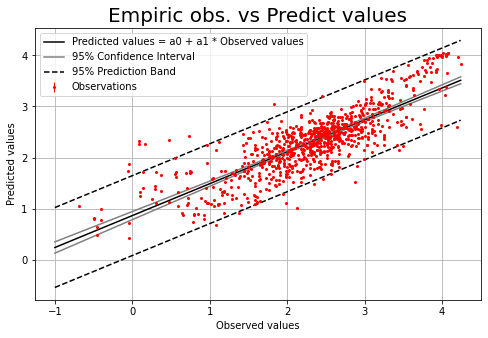

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.262, median - 0.265, CI - [0.243-0.282]

SHAP-values for: DBH_cm: mean - 0.2, median - 0.2, CI - [0.172-0.225]

SHAP-values for: H_m: mean - 0.114, median - 0.115, CI - [0.1-0.129]

SHAP-values for: Origin_ID: mean - 0.028, median - 0.027, CI - [0.022-0.034]

SHAP-values for: Species_ID: mean - 0.226, median - 0.225, CI - [0.212-0.241]



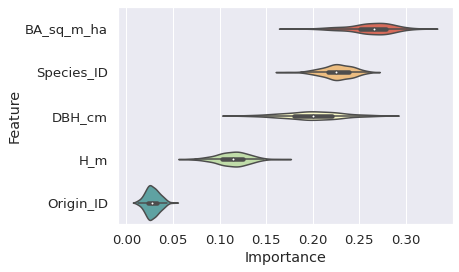

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'Species_ID', 'DBH_cm', 'H_m', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [29]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [30]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 119.555, median: 115.5,
 pred. interval (P(0.025)-P(0.975)): 41.975-195.0, 
 conf. interval (p-value=0.95): 70.278-177.736 
***
Aggregate bias statistic: 
 mean: -0.005, median: -0.008,
 pred. interval (P(0.025)-P(0.975)): -0.08-0.073, 
 conf. interval (p-value=0.95): -0.04-0.033 
***
Aggregate RMSE statistic: 
 mean: 0.504, median: 0.506, pred. interval (P(0.025)-P(0.975)): 0.418-0.602, 
 conf. interval (p-value=0.95): 0.46-0.546 
***
Aggregate MSE statistic: 
 mean: 0.257, median: 0.256, pred. interval (P(0.025)-P(0.975)): 0.175-0.362, 
 conf. interval (p-value=0.95): 0.212-0.298 
***
Aggregate R^2 statistic: 
 mean: 0.627, median: 0.631, pred. interval (P(0.025)-P(0.975)): 0.493-0.74, 
 conf. interval (p-value=0.95): 0.571-0.689 
***
Aggregate bias(%) statistic: 
 mean: -0.188, median: -0.008, pred. interval (P(0.025)-P(0.975)): -3.378-3.244, 
 conf. interval (p-value=0.95): -1.6

# ***Creating final XGBoost model using all obs. for its training***

In [32]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [33]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [34]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.78979
[1]	validation_0-rmse:1.60673
[2]	validation_0-rmse:1.44763
[3]	validation_0-rmse:1.31275


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18941
[5]	validation_0-rmse:1.08477
[6]	validation_0-rmse:0.99157
[7]	validation_0-rmse:0.91190
[8]	validation_0-rmse:0.84496
[9]	validation_0-rmse:0.78804
[10]	validation_0-rmse:0.74184
[11]	validation_0-rmse:0.70123
[12]	validation_0-rmse:0.66461
[13]	validation_0-rmse:0.63342
[14]	validation_0-rmse:0.60735
[15]	validation_0-rmse:0.58783
[16]	validation_0-rmse:0.57140
[17]	validation_0-rmse:0.55635
[18]	validation_0-rmse:0.54401
[19]	validation_0-rmse:0.53220
[20]	validation_0-rmse:0.52181
[21]	validation_0-rmse:0.51484
[22]	validation_0-rmse:0.50798
[23]	validation_0-rmse:0.50270
[24]	validation_0-rmse:0.49855
[25]	validation_0-rmse:0.49376
[26]	validation_0-rmse:0.48932
[27]	validation_0-rmse:0.48596
[28]	validation_0-rmse:0.47919
[29]	validation_0-rmse:0.47772
[30]	validation_0-rmse:0.47505
[31]	validation_0-rmse:0.47022
[32]	validation_0-rmse:0.46824
[33]	validation_0-rmse:0.46504
[34]	validation_0-rmse:0.46232
[35]	validation_0-rmse:0.45718
[36]	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [35]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 195


In [36]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

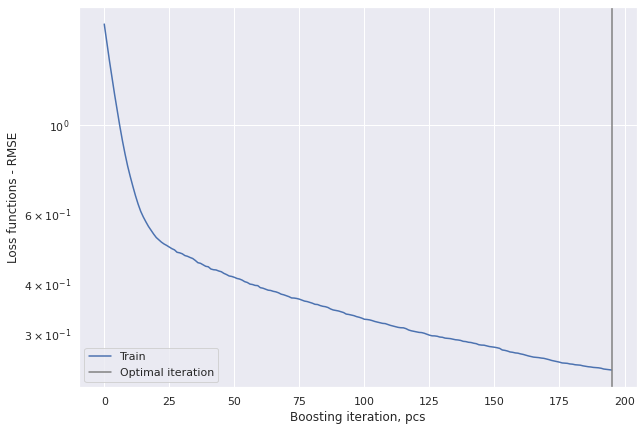

In [37]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [38]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.01
RMSE: 0.2
Relative RMSE(%):  10.476
MSE: 0.1
R square: 91.4%


In [39]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.920
Uncertainty
a0: 0.355+/-0.021
a1: 0.847+/-0.009


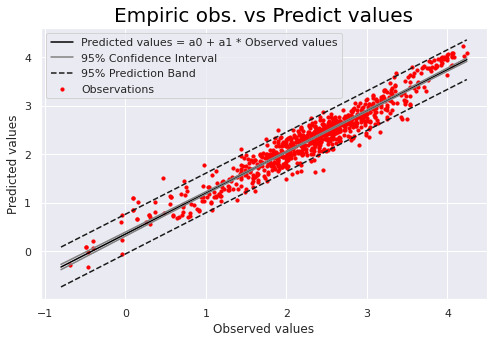

In [40]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-0.8, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

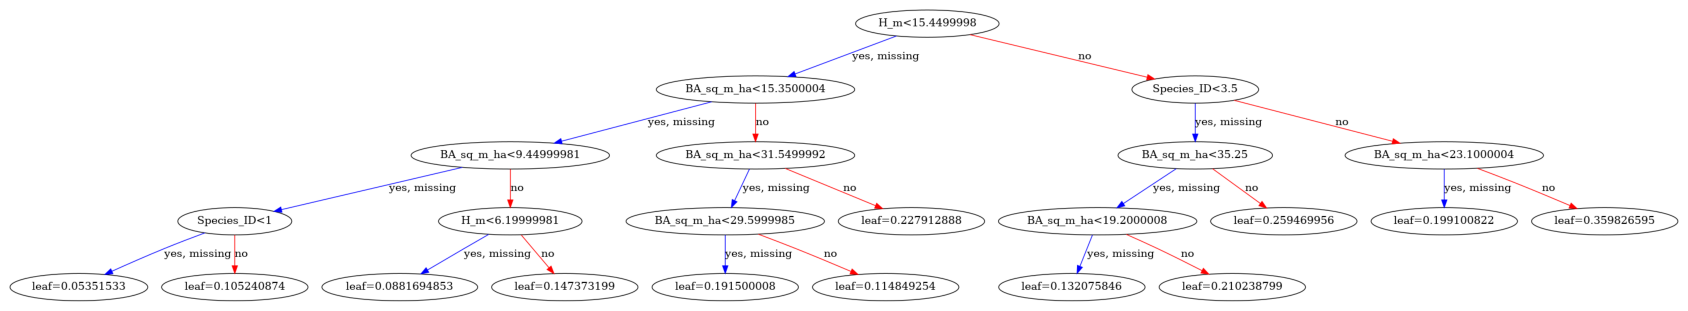

In [42]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 60]
plt.show()

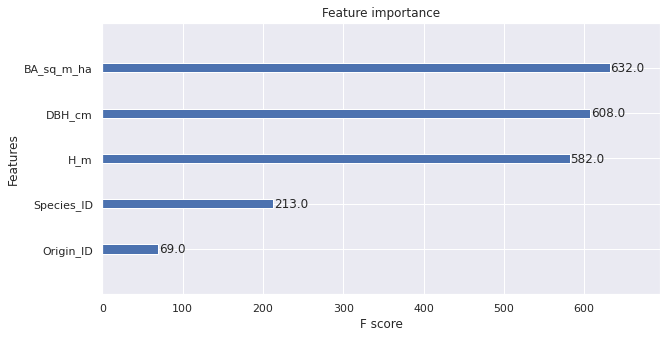

In [44]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

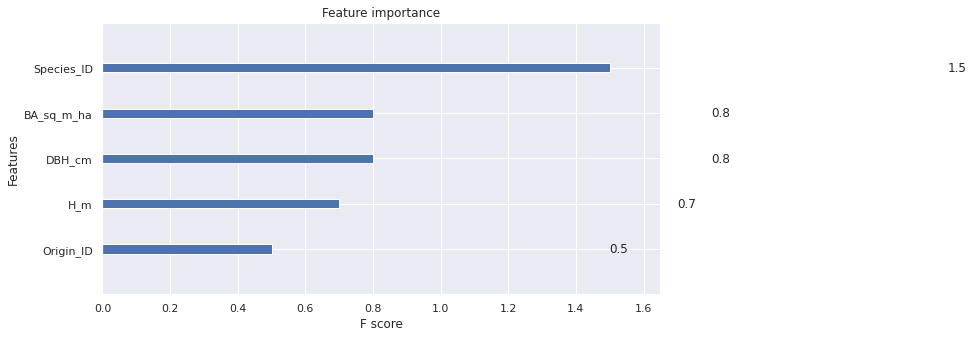

In [45]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

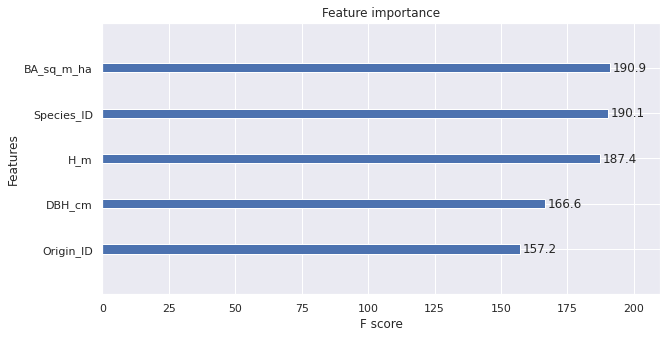

In [46]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [47]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


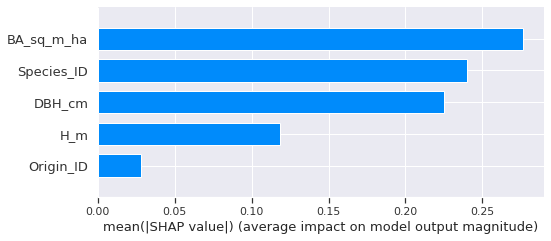

In [49]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

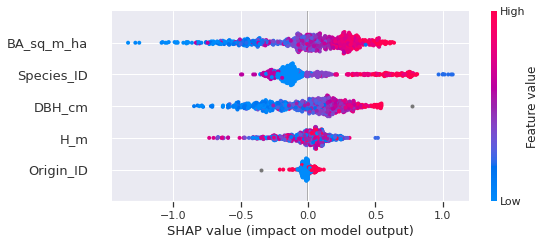

In [51]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

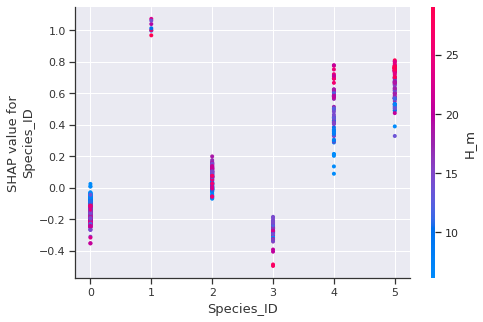

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


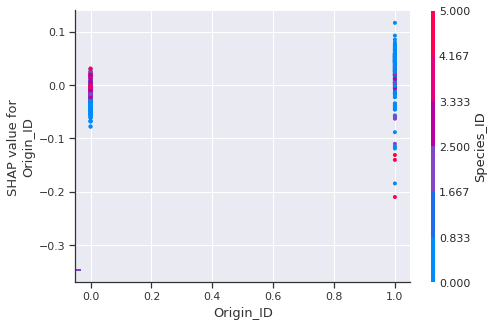

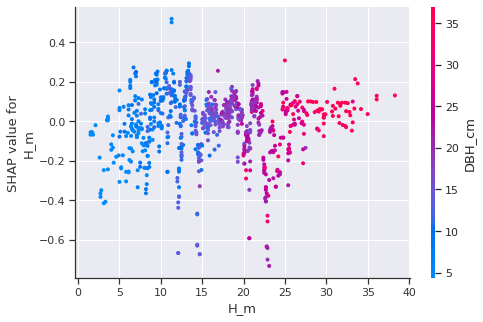

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


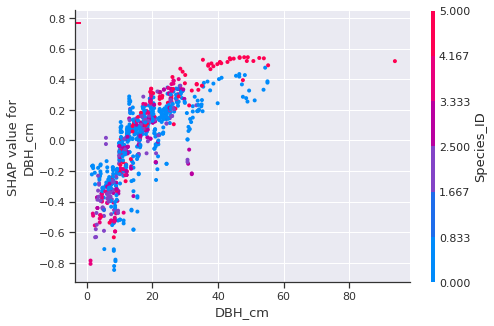

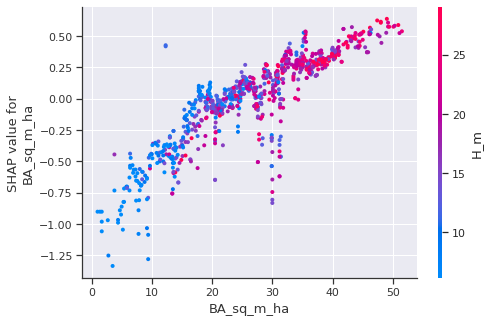

In [52]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [53]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/04_LN_M_branch_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/04_LN_M_branch_other_authors_XGB_model.txt")